# 1. Importing Libraies

In [41]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import dill
from collections import Counter
# from paretochart import pareto as p
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy import stats
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import shapiro, anderson
from scipy.stats import boxcox, yeojohnson
from outliers import smirnov_grubbs as grubbs_test
# from sklearn.linear_model import LinearRegression
# import statsmodels.formula.api as statsmodel
# import statsmodels.api as statsmodel
from prettytable import PrettyTable
import qnorm
from tqdm import tqdm, tqdm_notebook
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

# 2. Common Functions

In [2]:
def dill_dump_session(dump_sess_name, dump_folder_name='dill_db'):
    dill.dump_session('D:/BITS/Semester 4/dev/save/{folder_name}/{sess_name}.db'.format(folder_name=dump_folder_name, sess_name=dump_sess_name))

In [3]:
def dill_load_session(dump_load_name, load_folder_name='dill_db'):
    dill.load_session('D:/BITS/Semester 4/dev/save/{folder_name}/{sess_name}.db'.format(folder_name=load_folder_name, sess_name=dump_load_name))

In [9]:
dill_dump_session('2.Common functions')

In [10]:
dill_load_session('2.Common functions')

# 3. Importing dataset

In [11]:
original_df = pd.read_csv('../data/train.csv')

In [5]:
original_df

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                     3.8                     5.3                   3   
1                     8.0                     8.6                   6   
2                     1.1                     8.8                   8   
3                     3.7                     5.2                   3   
4                     4.1                     5.0                   3   
...                   ...                     ...                 ...   
25486                 4.0                     5.7                   2   
25487                 3.7                     4.8                   2   
25488                 3.7                     5.3                   2   
25489                 1.1                     9.6                   6   
25490                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       167                   3              0   
1                       272                   6              0   
2                       282                   4              0   
3                       169                   3              0   
4                       163                   3              0   
...                     ...                 ...            ...   
25486                   151                   3              0   
25487                   160                   3              0   
25488                   143                   3              0   
25489                   280                   4              0   
25490                   158                   3              0   

       promotion_last_5years Department  salary  Attrition  
0                          0      sales     low          1  
1                          0      sales  medium          1  
2                          0      sales  medium          1  
3                          0      sales     low          1  
4                          0      sales     low          1  
...                      ...        ...     ...        ...  
25486                      0    support     low          1  
25487                      0    support     low          1  
25488                      0    support     low          1  
25489                      0    support     low          1  
25490                      0    support     low          1  

[25491 rows x 10 columns]

In [13]:
dill_dump_session('3.Importing dataset')

# 4. Data Pre-Processing

In [4]:
dill_load_session('3.Importing dataset')

In [14]:
original_dpp_df = original_df
original_dpp_df

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                     3.8                     5.3                   3   
1                     8.0                     8.6                   6   
2                     1.1                     8.8                   8   
3                     3.7                     5.2                   3   
4                     4.1                     5.0                   3   
...                   ...                     ...                 ...   
25486                 4.0                     5.7                   2   
25487                 3.7                     4.8                   2   
25488                 3.7                     5.3                   2   
25489                 1.1                     9.6                   6   
25490                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       167                   3              0   
1                       272                   6              0   
2                       282                   4              0   
3                       169                   3              0   
4                       163                   3              0   
...                     ...                 ...            ...   
25486                   151                   3              0   
25487                   160                   3              0   
25488                   143                   3              0   
25489                   280                   4              0   
25490                   158                   3              0   

       promotion_last_5years Department  salary  Attrition  
0                          0      sales     low          1  
1                          0      sales  medium          1  
2                          0      sales  medium          1  
3                          0      sales     low          1  
4                          0      sales     low          1  
...                      ...        ...     ...        ...  
25486                      0    support     low          1  
25487                      0    support     low          1  
25488                      0    support     low          1  
25489                      0    support     low          1  
25490                      0    support     low          1  

[25491 rows x 10 columns]

## 4.1 Check for missing values

In [15]:
original_dpp_df.isnull()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                   False                   False               False   
1                   False                   False               False   
2                   False                   False               False   
3                   False                   False               False   
4                   False                   False               False   
...                   ...                     ...                 ...   
25486               False                   False               False   
25487               False                   False               False   
25488               False                   False               False   
25489               False                   False               False   
25490               False                   False               False   

       average_montly_hours  time_spend_company  Work_accident  \
0                     False               False          False   
1                     False               False          False   
2                     False               False          False   
3                     False               False          False   
4                     False               False          False   
...                     ...                 ...            ...   
25486                 False               False          False   
25487                 False               False          False   
25488                 False               False          False   
25489                 False               False          False   
25490                 False               False          False   

       promotion_last_5years  Department  salary  Attrition  
0                      False       False   False      False  
1                      False       False   False      False  
2                      False       False   False      False  
3                      False       False   False      False  
4                      False       False   False      False  
...                      ...         ...     ...        ...  
25486                  False       False   False      False  
25487                  False       False   False      False  
25488                  False       False   False      False  
25489                  False       False   False      False  
25490                  False       False   False      False  

[25491 rows x 10 columns]

In [42]:
# being double sure, that no missing values are present..
original_dpp_df.isnull().values.any()

False

In [43]:
# being double sure, that no missing values are present..
original_dpp_df.isnull().sum()

satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
Department                0
salary                    0
Attrition                 0
dtype: int64

## 4.2 Check for outliers

In [20]:
original_dpp_df

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                     3.8                     5.3                   3   
1                     8.0                     8.6                   6   
2                     1.1                     8.8                   8   
3                     3.7                     5.2                   3   
4                     4.1                     5.0                   3   
...                   ...                     ...                 ...   
25486                 4.0                     5.7                   2   
25487                 3.7                     4.8                   2   
25488                 3.7                     5.3                   2   
25489                 1.1                     9.6                   6   
25490                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       167                   3              0   
1                       272                   6              0   
2                       282                   4              0   
3                       169                   3              0   
4                       163                   3              0   
...                     ...                 ...            ...   
25486                   151                   3              0   
25487                   160                   3              0   
25488                   143                   3              0   
25489                   280                   4              0   
25490                   158                   3              0   

       promotion_last_5years Department  salary  Attrition  
0                          0      sales     low          1  
1                          0      sales  medium          1  
2                          0      sales  medium          1  
3                          0      sales     low          1  
4                          0      sales     low          1  
...                      ...        ...     ...        ...  
25486                      0    support     low          1  
25487                      0    support     low          1  
25488                      0    support     low          1  
25489                      0    support     low          1  
25490                      0    support     low          1  

[25491 rows x 10 columns]

### 4.2.1 Outliers present in satisfaction_level

In [21]:
z_score_satisfaction_level = stats.zscore(original_dpp_df['satisfaction_level'])

In [30]:
z_score_satisfaction_level

array([-0.94024626,  0.7490331 , -2.02621156, ..., -0.98046719,
       -2.02621156, -0.98046719])

In [41]:
sum(z_score_satisfaction_level>3)

0

In [42]:
sum(z_score_satisfaction_level<-3)

0

### 4.2.2 Outliers present in last_evaluation_rating

In [49]:
z_score_last_evaluation_rating = stats.zscore(original_dpp_df['last_evaluation_rating'])

In [50]:
z_score_last_evaluation_rating

array([-1.09183923,  0.83717252,  0.95408232, ..., -1.09183923,
        1.42172153, -1.15029413])

In [52]:
z_score_last_evaluation_rating_round = [round(num, 2) for num in z_score_last_evaluation_rating]

In [55]:
count_of_z_score_last_evaluation_rating_round = {i:z_score_last_evaluation_rating_round.count(i) for i in np.unique(z_score_last_evaluation_rating_round)}
count_of_z_score_last_evaluation_rating_round

{-2.09: 39,
 -2.03: 91,
 -1.97: 83,
 -1.91: 89,
 -1.85: 100,
 -1.79: 97,
 -1.73: 97,
 -1.68: 81,
 -1.62: 71,
 -1.56: 194,
 -1.5: 353,
 -1.44: 292,
 -1.38: 508,
 -1.33: 552,
 -1.27: 593,
 -1.21: 596,
 -1.15: 516,
 -1.09: 549,
 -1.03: 575,
 -0.97: 608,
 -0.92: 541,
 -0.86: 558,
 -0.8: 378,
 -0.74: 450,
 -0.68: 377,
 -0.62: 400,
 -0.57: 395,
 -0.51: 407,
 -0.45: 398,
 -0.39: 337,
 -0.33: 384,
 -0.27: 407,
 -0.22: 366,
 -0.16: 327,
 -0.1: 381,
 -0.04: 342,
 0.02: 365,
 0.08: 383,
 0.14: 447,
 0.19: 399,
 0.25: 370,
 0.31: 422,
 0.37: 366,
 0.43: 397,
 0.49: 427,
 0.54: 430,
 0.6: 407,
 0.66: 461,
 0.72: 510,
 0.78: 547,
 0.84: 462,
 0.9: 566,
 0.95: 397,
 1.01: 504,
 1.07: 536,
 1.13: 485,
 1.19: 466,
 1.25: 463,
 1.3: 452,
 1.36: 433,
 1.42: 426,
 1.48: 460,
 1.54: 447,
 1.6: 457,
 1.66: 474}

In [59]:
print(sum(z_score_last_evaluation_rating>3))
print(sum(z_score_last_evaluation_rating<-3))

0
0


### 4.2.3 Outliers present in projects_worked_on

In [60]:
z_score_projects_worked_on = stats.zscore(original_dpp_df['projects_worked_on'])

In [61]:
z_score_projects_worked_on

array([-0.91766488,  1.34784991,  2.8581931 , ..., -1.67283647,
        1.34784991, -1.67283647])

In [62]:
print(sum(z_score_projects_worked_on>3))
print(sum(z_score_projects_worked_on<-3))

0
0


### 4.2.4 Outliers present in avg_monthly_hours

In [65]:
z_score_avg_monthly_hours = stats.zscore(original_dpp_df['average_montly_hours'])

In [66]:
z_score_avg_monthly_hours

array([-0.76296079,  1.32942577,  1.52870068, ..., -1.24122057,
        1.4888457 , -0.94230821])

In [67]:
print(sum(z_score_avg_monthly_hours>3))
print(sum(z_score_avg_monthly_hours<-3))

0
0


### 4.2.5 Outliers present in time_spend_company

In [68]:
z_score_time_spend_company = stats.zscore(original_dpp_df['time_spend_company'])

In [69]:
z_score_time_spend_company

array([-0.34105817,  1.71699764,  0.34496043, ..., -0.34105817,
        0.34496043, -0.34105817])

In [72]:
print(sum(z_score_time_spend_company>3))
print(sum(z_score_time_spend_company<-3))

625
0


In [86]:
original_dpp_df.shape

(25491, 10)

In [6]:
z_score_time_spend_company_index = list(np.where(z_score_time_spend_company > 3)[0])
z_score_time_spend_company_index[0:10]

[7748, 7749, 7750, 7751, 7752, 7798, 7799, 7824, 7825, 7826]

In [108]:
original_dpp_time_spend_company_outliers_removed_df = original_dpp_df.drop(z_score_time_spend_company_index)

In [109]:
original_dpp_time_spend_company_outliers_removed_df.shape

(24866, 10)

### 4.2.6 Outliers present in work_accident

In [110]:
z_score_work_accident = stats.zscore(original_dpp_time_spend_company_outliers_removed_df['Work_accident'])

In [56]:
z_score_work_accident

array([-0.40936816, -0.40936816, -0.40936816, ..., -0.40936816,
       -0.40936816, -0.40936816])

In [57]:
print(sum(z_score_work_accident>3))
print(sum(z_score_work_accident<-3))

0
0


### 4.2.7 Outliers present in promotion_last_5_years

In [143]:
original_dpp_time_spend_company_outliers_removed_df.reset_index(drop=True, inplace=True)
original_dpp_time_spend_company_outliers_removed_df.shape

(24866, 10)

In [144]:
z_score_promotion_last_5_years = stats.zscore(original_dpp_time_spend_company_outliers_removed_df['promotion_last_5years'])

In [145]:
z_score_promotion_last_5_years

array([-0.14310317, -0.14310317, -0.14310317, ..., -0.14310317,
       -0.14310317, -0.14310317])

In [146]:
print(sum(z_score_promotion_last_5_years>3))
print(sum(z_score_promotion_last_5_years<-3))

499
0


In [147]:
original_dpp_time_spend_company_outliers_removed_df.shape

(24866, 10)

In [7]:
z_score_promotion_last_5_years_index = list(np.where(z_score_promotion_last_5_years > 3)[0])
z_score_promotion_last_5_years_index[0:10]

[198, 390, 507, 682, 3173, 3174, 3175, 3176, 3177, 3178]

In [149]:
len(z_score_promotion_last_5_years_index)

499

In [150]:
original_dpp_promotion_last_5_years_outliers_removed_df = original_dpp_time_spend_company_outliers_removed_df.drop(z_score_promotion_last_5_years_index)

In [151]:
original_dpp_promotion_last_5_years_outliers_removed_df.shape

(24367, 10)

In [152]:
original_dpp_all_outliers_removed_df = original_dpp_promotion_last_5_years_outliers_removed_df
original_dpp_all_outliers_removed_df.shape

(24367, 10)

## 4.3 Check for noise

In [153]:
original_dpp_all_outliers_removed_df['satisfaction_level'].dtypes

dtype('float64')

In [154]:
original_dpp_all_outliers_removed_df['last_evaluation_rating'].dtypes

dtype('float64')

In [155]:
original_dpp_all_outliers_removed_df['projects_worked_on'].dtypes

dtype('int64')

In [156]:
original_dpp_all_outliers_removed_df['average_montly_hours'].dtypes

dtype('int64')

In [157]:
original_dpp_all_outliers_removed_df['time_spend_company'].dtypes

dtype('int64')

In [158]:
original_dpp_all_outliers_removed_df['Work_accident'].dtypes

dtype('int64')

In [159]:
original_dpp_all_outliers_removed_df['promotion_last_5years'].dtypes

dtype('int64')

In [55]:
original_dpp_all_outliers_removed_df.to_csv('../save/csv/4.2_4.3_original_dpp_all_outliers_and_noise_removed_df.csv', index=False)

## 4.4 Create dummy variables

In [59]:
print(original_dpp_all_outliers_removed_df.shape)
original_dpp_all_outliers_removed_df.head(10)

(24367, 10)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3          False   
1                   272                   6          False   
2                   282                   4          False   
3                   169                   3          False   
4                   163                   3          False   
5                   257                   4          False   
6                   269                   5          False   
7                   234                   5          False   
8                   152                   3          False   
9                   315                   4          False   

   promotion_last_5years Department  salary  Attrition  
0                  False      sales     low          1  
1                  False      sales  medium          1  
2                  False      sales  medium          1  
3                  False      sales     low          1  
4                  False      sales     low          1  
5                  False      sales     low          1  
6                  False      sales     low          1  
7                  False      sales     low          1  
8                  False      sales     low          1  
9                  False      sales     low          1

In [186]:
# promotion_last_5years = original_dpp_all_outliers_removed_df['promotion_last_5years'].replace({0:False, 1:True})
# original_dpp_all_outliers_removed_df['promotion_last_5years'] = promotion_last_5years
# original_dpp_all_outliers_removed_df.head(10)

In [187]:
# work_accident = original_dpp_all_outliers_removed_df['Work_accident'].replace({0:False, 1:True})
# original_dpp_all_outliers_removed_df['Work_accident'] = work_accident
# original_dpp_all_outliers_removed_df.head(10)

In [44]:
print(original_dpp_all_outliers_removed_df.shape)

(24367, 10)


In [184]:
original_dpp_dummy_variables_df = pd.get_dummies(original_dpp_all_outliers_removed_df, columns=['Work_accident', 'promotion_last_5years', 'Department', 'salary'])

In [45]:
print(original_dpp_dummy_variables_df.shape)
original_dpp_dummy_variables_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [190]:
dill_dump_session('4.4_Create_dummy_variables')

In [54]:
original_dpp_dummy_variables_df.to_csv('../save/csv/4.4_original_dpp_dummy_variables_df.csv', index=False)

## 4.5 Normalizing the dataset

In [28]:
dill_load_session('4.4_Create_dummy_variables')

In [30]:
original_dpp_normalized_df = original_dpp_dummy_variables_df.copy()

In [31]:
original_dpp_normalized_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [32]:
original_dpp_normalized_df.dtypes

satisfaction_level             float64
last_evaluation_rating         float64
projects_worked_on               int64
average_montly_hours             int64
time_spend_company               int64
Attrition                        int64
Work_accident_False              uint8
Work_accident_True               uint8
promotion_last_5years_False      uint8
Department_IT                    uint8
Department_RandD                 uint8
Department_accounting            uint8
Department_hr                    uint8
Department_management            uint8
Department_marketing             uint8
Department_product_mng           uint8
Department_sales                 uint8
Department_support               uint8
Department_technical             uint8
salary_high                      uint8
salary_low                       uint8
salary_medium                    uint8
dtype: object

In [33]:
normalize_these_columns = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [34]:
min_max_scaler = MinMaxScaler()
original_dpp_normalized_df[normalize_these_columns] = min_max_scaler.fit_transform(original_dpp_normalized_df[normalize_these_columns])

In [35]:
# original_dpp_normalized_df[normalize_these_columns] = original_dpp_normalized_df[normalize_these_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [36]:
original_dpp_normalized_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [53]:
original_dpp_normalized_df.to_csv('../save/csv/4.5_original_dpp_normalized_df.csv', index=False)

## 4.6 Standardizing the dataset

In [39]:
original_dpp_standardized_df = original_dpp_dummy_variables_df.copy()

In [40]:
original_dpp_standardized_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [41]:
standardize_these_columns = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [42]:
std_scaler = StandardScaler()

In [43]:
original_dpp_standardized_df[standardize_these_columns] = std_scaler.fit_transform(original_dpp_standardized_df[standardize_these_columns])

In [44]:
original_dpp_standardized_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [52]:
original_dpp_standardized_df.to_csv('../save/csv/4.6_original_dpp_standardized_df.csv', index=False)

In [58]:
dill_dump_session('4.6_all_data_preprocessing_completed')

# 5. EDA & Feature Correlation Plots

In [62]:
# dill_load_session('4.6_all_data_preprocessing_completed')

In [91]:
eda_df = original_dpp_dummy_variables_df.copy()

## 5.1 Statistical Overview

In [68]:
eda_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [69]:
eda_df.describe()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
count         24367.00000            24367.000000        24367.000000   
mean              6.11367                7.168051            4.218944   
std               2.49921                1.713454            1.333112   
min               0.90000                3.600000            2.000000   
25%               4.40000                5.600000            3.000000   
50%               6.40000                7.200000            4.000000   
75%               8.20000                8.700000            5.000000   
max              10.00000               10.000000            8.000000   

       average_montly_hours  time_spend_company     Attrition  \
count          24367.000000        24367.000000  24367.000000   
mean             205.416137            3.347109      0.244757   
std               50.273714            1.142088      0.429952   
min               96.000000            2.000000      0.000000   
25%              160.000000            3.000000      0.000000   
50%              204.000000            3.000000      0.000000   
75%              250.000000            4.000000      0.000000   
max              320.000000            7.000000      1.000000   

       Work_accident_False  Work_accident_True  promotion_last_5years_False  \
count         24367.000000        24367.000000                      24367.0   
mean              0.858579            0.141421                          1.0   
std               0.348462            0.348462                          0.0   
min               0.000000            0.000000                          1.0   
25%               1.000000            0.000000                          1.0   
50%               1.000000            0.000000                          1.0   
75%               1.000000            0.000000                          1.0   
max               1.000000            1.000000                          1.0   

       Department_IT  Department_RandD  Department_accounting  Department_hr  \
count   24367.000000      24367.000000           24367.000000   24367.000000   
mean        0.084582          0.052284               0.051627       0.050642   
std         0.278264          0.222603               0.221278       0.219271   
min         0.000000          0.000000               0.000000       0.000000   
25%         0.000000          0.000000               0.000000       0.000000   
50%         0.000000          0.000000               0.000000       0.000000   
75%         0.000000          0.000000               0.000000       0.000000   
max         1.000000          1.000000               1.000000       1.000000   

       Department_management  Department_marketing  Department_product_mng  \
count           24367.000000          24367.000000            24367.000000   
mean                0.033898              0.054869                0.060984   
std                 0.180971              0.227730                0.239306   
min                 0.000000              0.000000                0.000000   
25%                 0.000000              0.000000                0.000000   
50%                 0.000000              0.000000                0.000000   
75%                 0.000000              0.000000                0.000000   
max                 1.000000              1.000000                1.000000   

       Department_sales  Department_support  Department_technical  \
count      24367.000000        24367.000000          24367.000000   
mean           0.272171            0.152050              0.186892   
std            0.445087            0.359077              0.389833   
min            0.000000            0.000000              0.000000   
25%            0.000000            0.000000              0.000000   
50%            0.000000            0.000000              0.000000   
75%            1.000000            0.000000              0.000000   
max            1.000000            1.000000              1.000000   

     

In [70]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24367 entries, 0 to 24865
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   satisfaction_level           24367 non-null  float64
 1   last_evaluation_rating       24367 non-null  float64
 2   projects_worked_on           24367 non-null  int64  
 3   average_montly_hours         24367 non-null  int64  
 4   time_spend_company           24367 non-null  int64  
 5   Attrition                    24367 non-null  int64  
 6   Work_accident_False          24367 non-null  uint8  
 7   Work_accident_True           24367 non-null  uint8  
 8   promotion_last_5years_False  24367 non-null  uint8  
 9   Department_IT                24367 non-null  uint8  
 10  Department_RandD             24367 non-null  uint8  
 11  Department_accounting        24367 non-null  uint8  
 12  Department_hr                24367 non-null  uint8  
 13  Department_manag

## 5.2 Correlation Analysis - Checking For Multi-Collinearity

<AxesSubplot:>

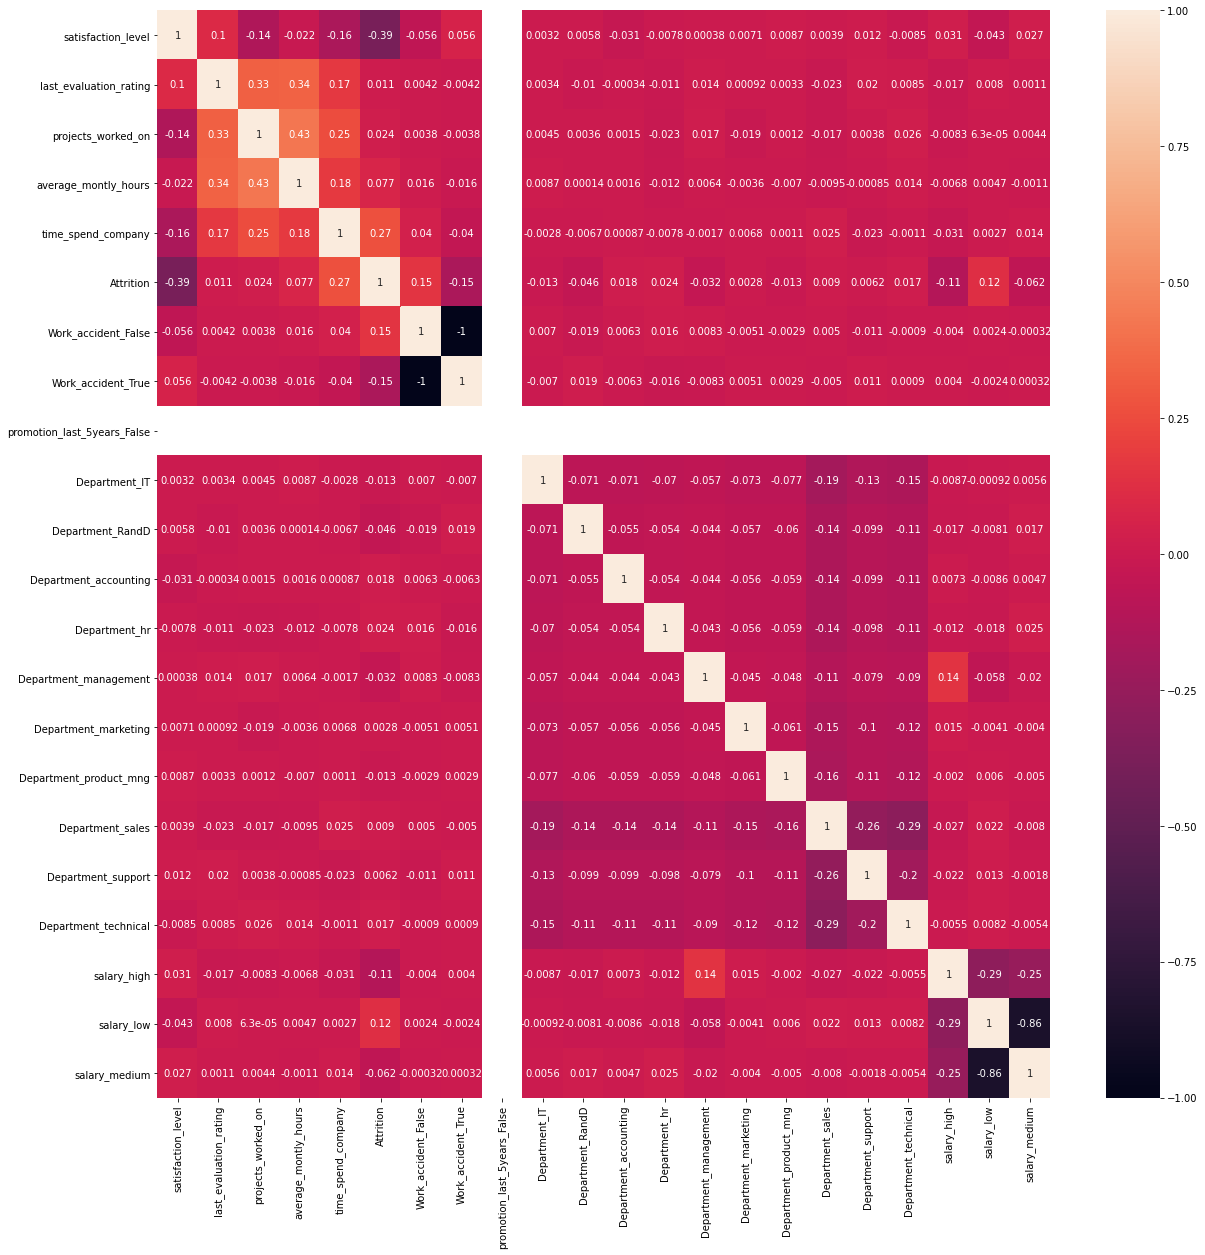

In [94]:
plt.subplots(figsize=(20, 20))
sns.heatmap(eda_df.corr(), annot = True)

In [73]:
eda_df.corr()

satisfaction_level  last_evaluation_rating  \
satisfaction_level                     1.000000                0.101427   
last_evaluation_rating                 0.101427                1.000000   
projects_worked_on                    -0.137219                0.332876   
average_montly_hours                  -0.021733                0.340919   
time_spend_company                    -0.155074                0.168917   
Attrition                             -0.388589                0.010660   
Work_accident_False                   -0.055815                0.004207   
Work_accident_True                     0.055815               -0.004207   
promotion_last_5years_False                 NaN                     NaN   
Department_IT                          0.003230                0.003395   
Department_RandD                       0.005834               -0.010351   
Department_accounting                 -0.030917               -0.000336   
Department_hr                         -0.007801               -0.010888   
Department_management                  0.000382                0.014015   
Department_marketing                   0.007083                0.000917   
Department_product_mng                 0.008735                0.003291   
Department_sales                       0.003861               -0.022694   
Department_support                     0.011582                0.019683   
Department_technical                  -0.008452                0.008522   
salary_high                            0.031023               -0.017002   
salary_low                            -0.042851                0.008002   
salary_medium                          0.026557                0.001102   

                             projects_worked_on  average_montly_hours  \
satisfaction_level                    -0.137219             -0.021733   
last_evaluation_rating                 0.332876              0.340919   
projects_worked_on                     1.000000              0.429424   
average_montly_hours                   0.429424              1.000000   
time_spend_company                     0.253738              0.177453   
Attrition                              0.024074              0.076901   
Work_accident_False                    0.003753              0.015572   
Work_accident_True                    -0.003753             -0.015572   
promotion_last_5years_False                 NaN                   NaN   
Department_IT                          0.004509              0.008749   
Department_RandD                       0.003605              0.000142   
Department_accounting                  0.001470              0.001644   
Department_hr                         -0.023191             -0.011502   
Department_management                  0.016527              0.006407   
Department_marketing                  -0.019430             -0.003618   
Department_product_mng                 0.001241             -0.007001   
Department_sales                      -0.017018             -0.009491   
Department_support                     0.003756             -0.000852   
Department_technical                   0.025818              0.014269   
salary_high                           -0.008333             -0.006829   
salary_low                             0.000063              0.004713   
salary_medium                          0.004442             -0.001073   

                             time_spend_company  Attrition  \
satisfaction_level                    -0.155074  -0.388589   
last_evaluation_rating                 0.168917   0.010660   
projects_worked_on                     0.253738   0.024074   
average_montly_hours                   0.177453   0.076901   
time_spend_company                     1.000000   0.268358   
Attrition                              0.268358   1.000000   
Work_accident_False                    0.039923   0.154342   
Work_accident_True                    -0.039923  -0.154342   
promotion_last_5years_False                 NaN        NaN   
Dep

<AxesSubplot:>

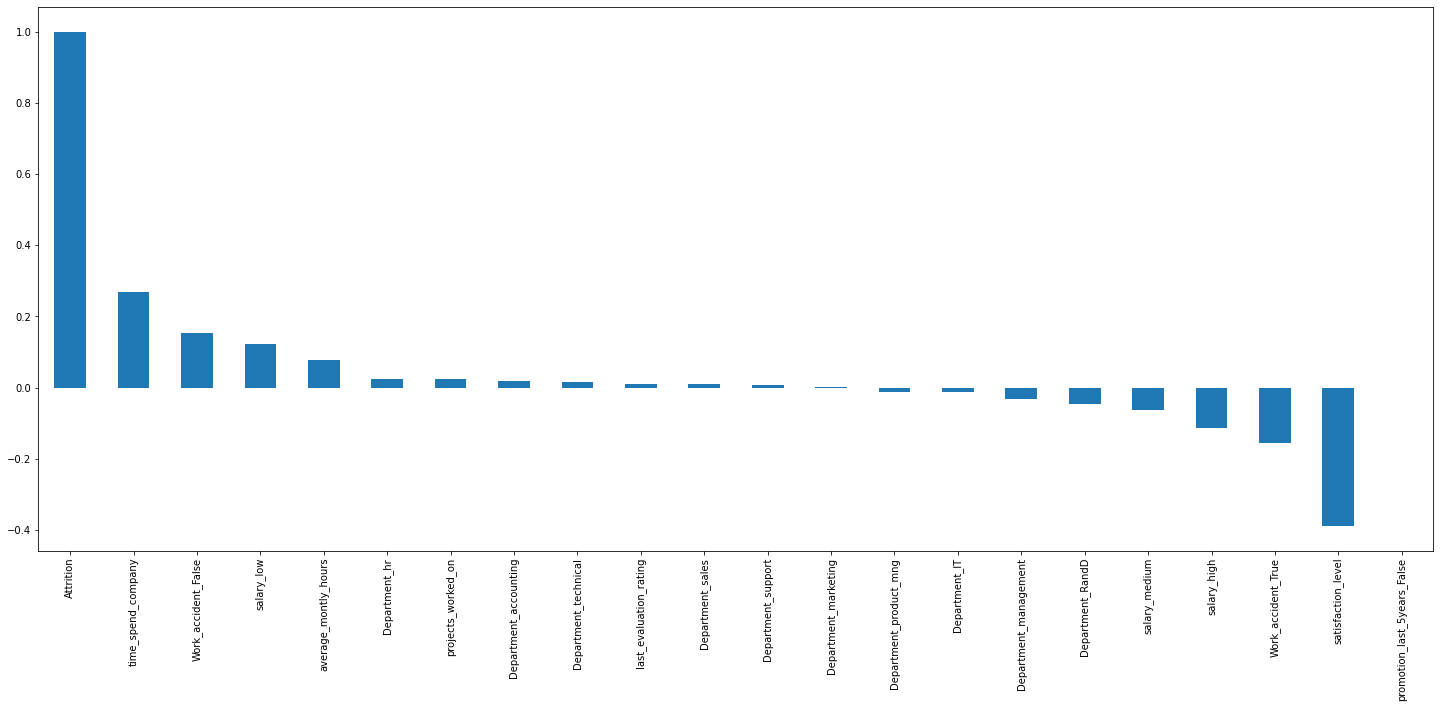

In [26]:
plt.subplots(figsize=(25, 10))
eda_df.corr()['Attrition'].sort_values(ascending=False).plot(kind='bar')

## 5.3 Uni-Variate & Bi-Variate Analysis

### 5.3.1 Histogram + Distribution Plots

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

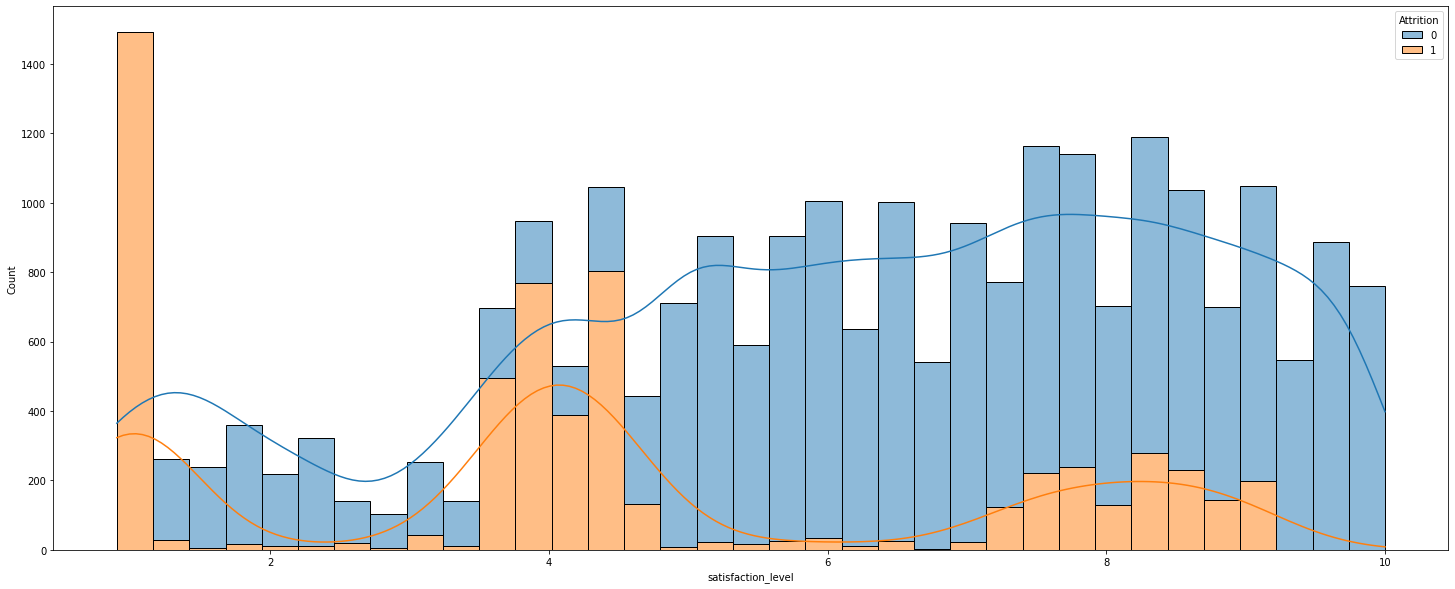

In [21]:
plt.subplots(figsize=(25, 10))

sns.histplot(data=eda_df, x="satisfaction_level", kde=True, hue=eda_df['Attrition'], multiple="stack")
## this is bimodal kde..kernel density estimation..

# eda_df.groupby('Attrition').satisfaction_level.hist(legend=True)

<AxesSubplot:xlabel='last_evaluation_rating', ylabel='Count'>

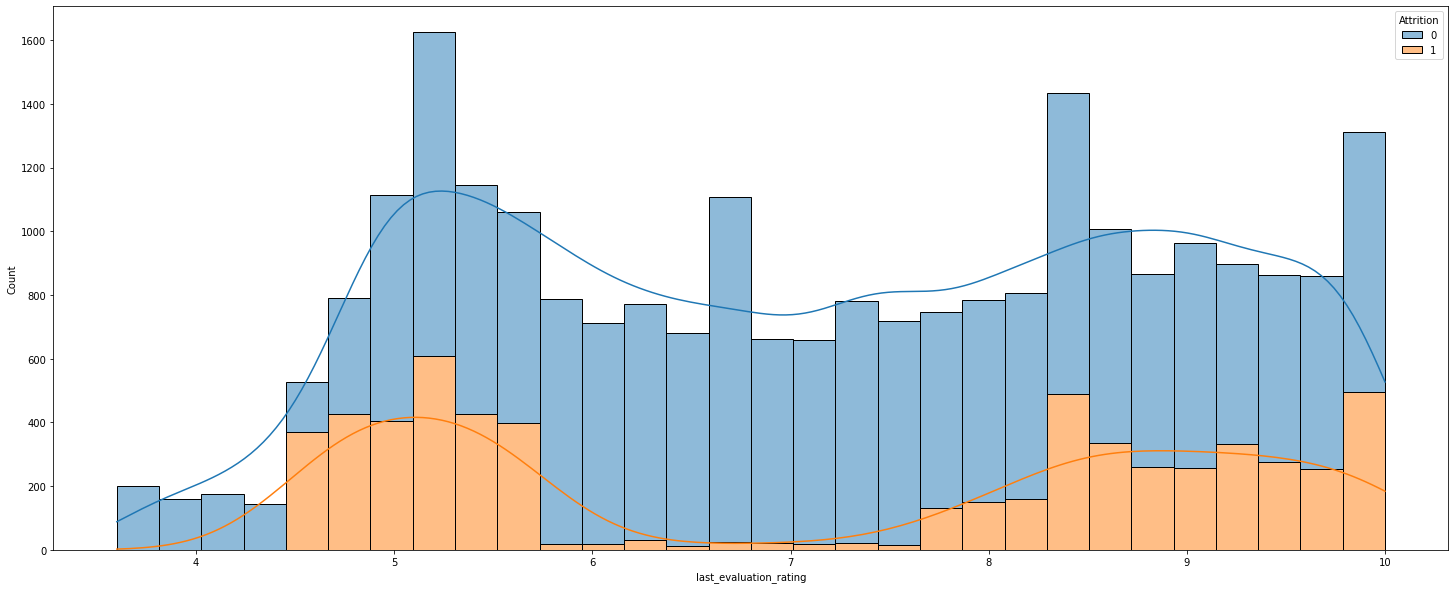

In [161]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="last_evaluation_rating", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='projects_worked_on', ylabel='Count'>

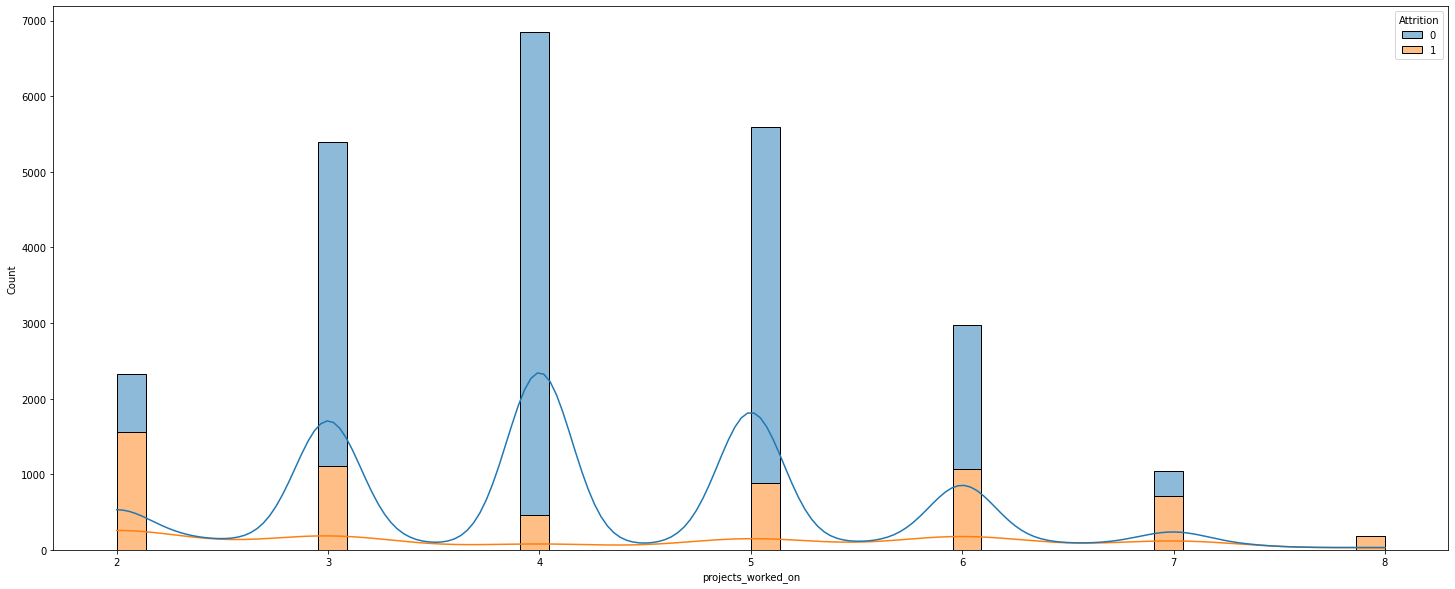

In [159]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="projects_worked_on", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

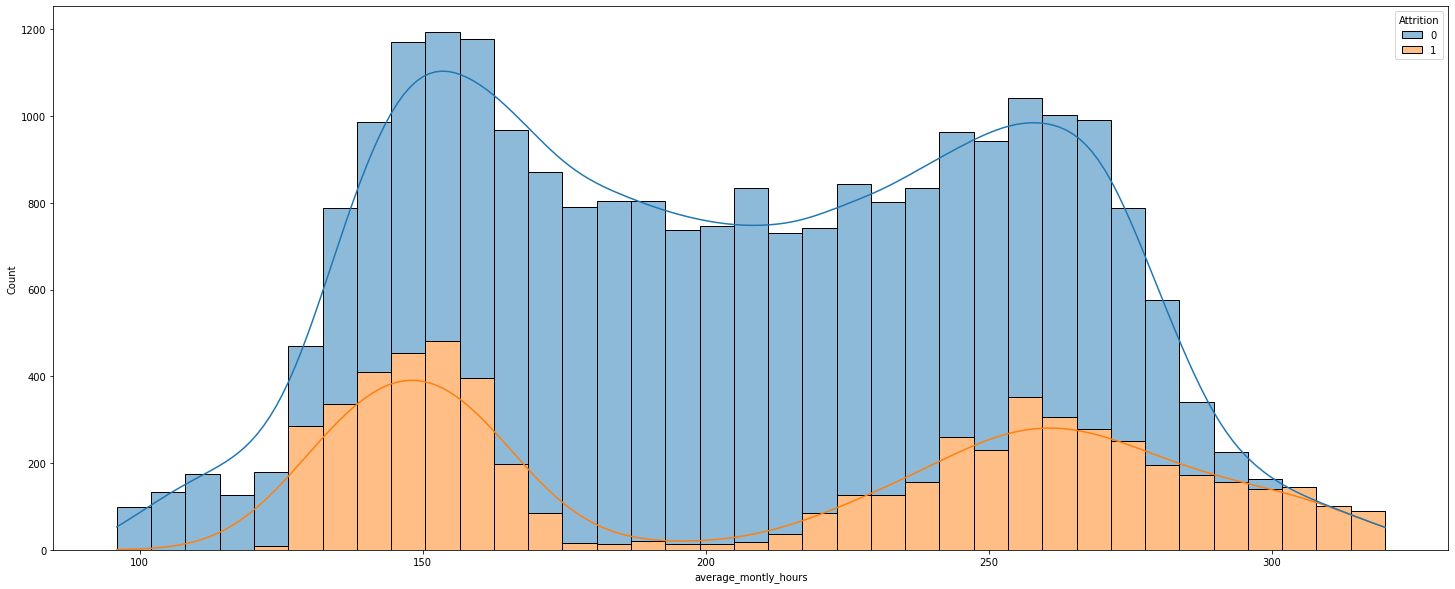

In [162]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="average_montly_hours", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='time_spend_company', ylabel='Count'>

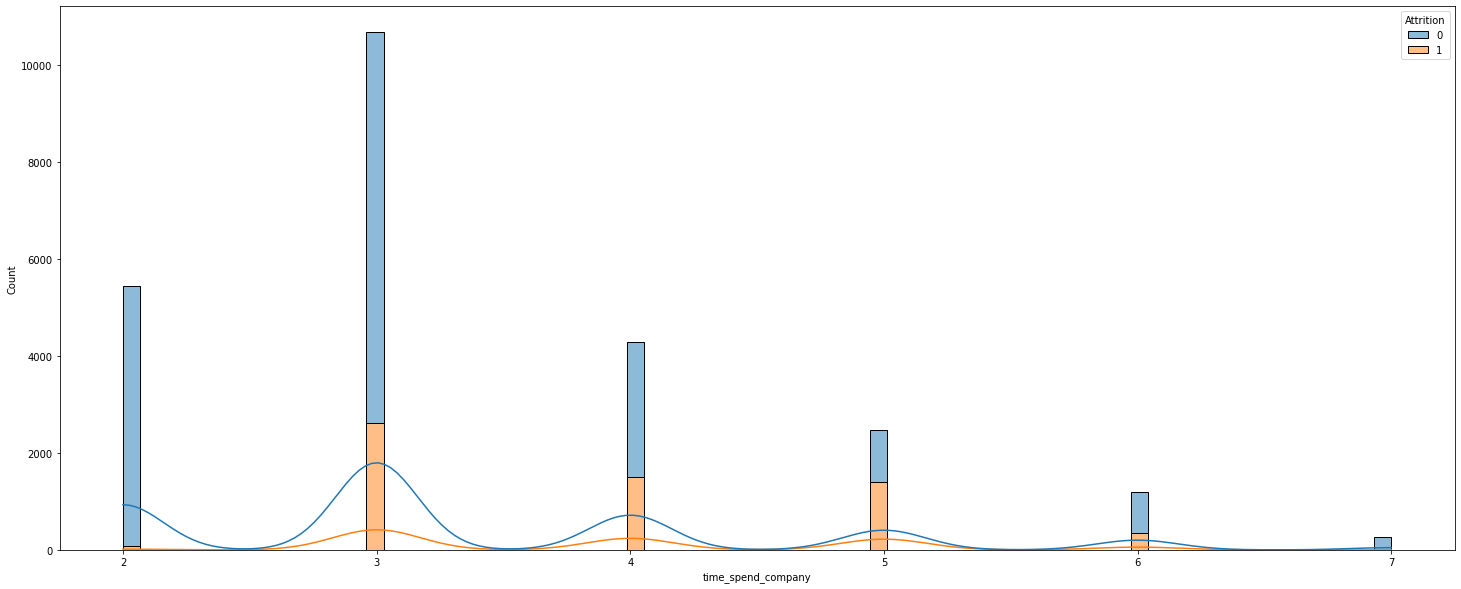

In [163]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="time_spend_company", kde=True, hue=eda_df['Attrition'], multiple="stack")

In [117]:
original_dpp_all_outliers_removed_df.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3          False   
1                   272                   6          False   
2                   282                   4          False   
3                   169                   3          False   
4                   163                   3          False   

   promotion_last_5years Department  salary  Attrition  
0                  False      sales     low          1  
1                  False      sales  medium          1  
2                  False      sales  medium          1  
3                  False      sales     low          1  
4                  False      sales     low          1

In [130]:
eda_df.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0                     0            0   
1                 1                   0                     0            0   
2                 1                   0                     0            0   
3                 1                   0                     0            0   
4                 1                   0                     0            0   

   salary_low  salary_medium  
0           1              0  
1           0              1  
2           0              1  
3           1              0  
4           1              0

### 5.3.2 Count Plots

<AxesSubplot:xlabel='Department', ylabel='count'>

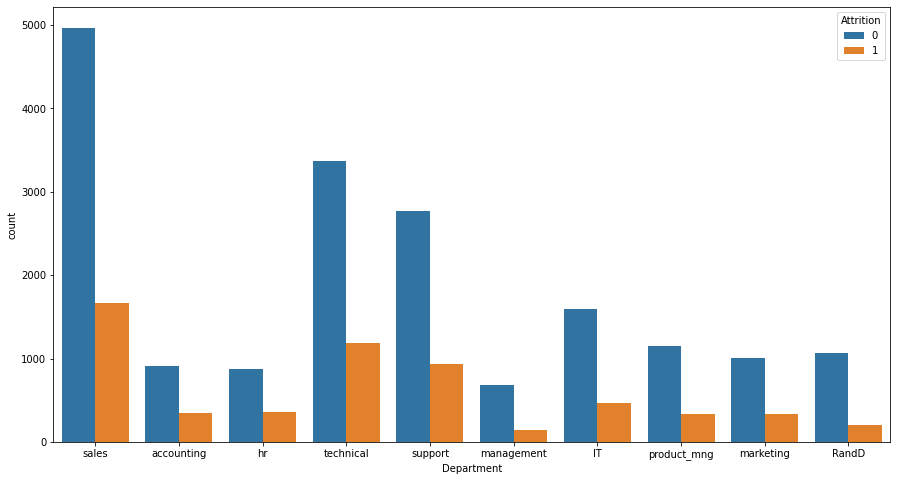

In [168]:
plt.subplots(figsize=(15, 8))
sns.countplot(x="Department", hue="Attrition", data=original_dpp_all_outliers_removed_df)

<AxesSubplot:xlabel='salary', ylabel='count'>

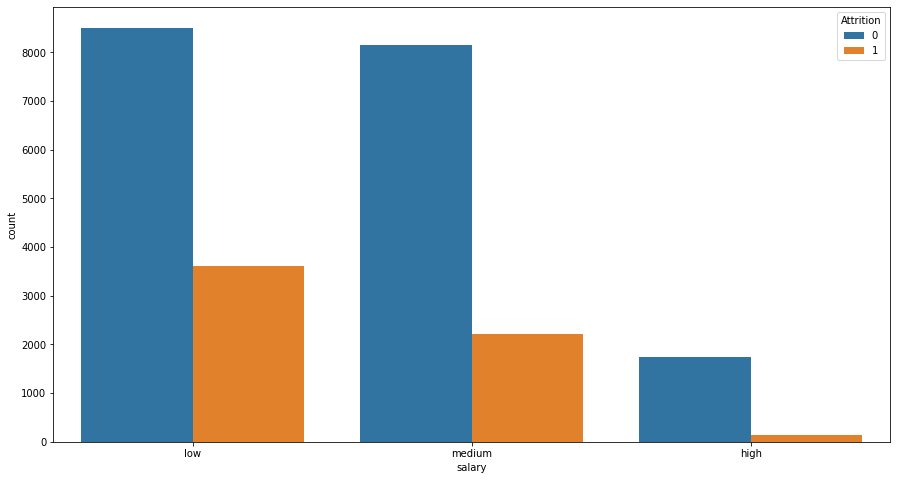

In [169]:
plt.subplots(figsize=(15, 8))
sns.countplot(x="salary", hue="Attrition", data=original_dpp_all_outliers_removed_df)

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

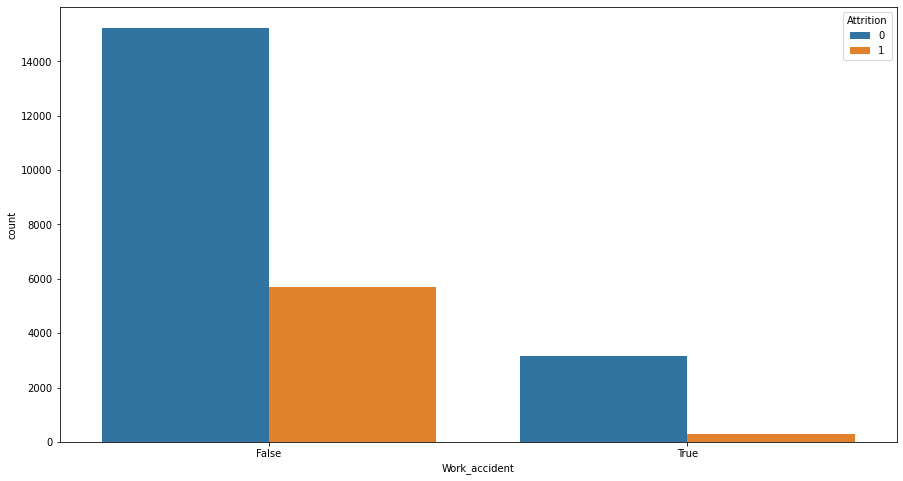

In [170]:
plt.subplots(figsize=(15, 8))
sns.countplot(x="Work_accident", hue="Attrition", data=original_dpp_all_outliers_removed_df)

### 5.3.3 Pair Plots

c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


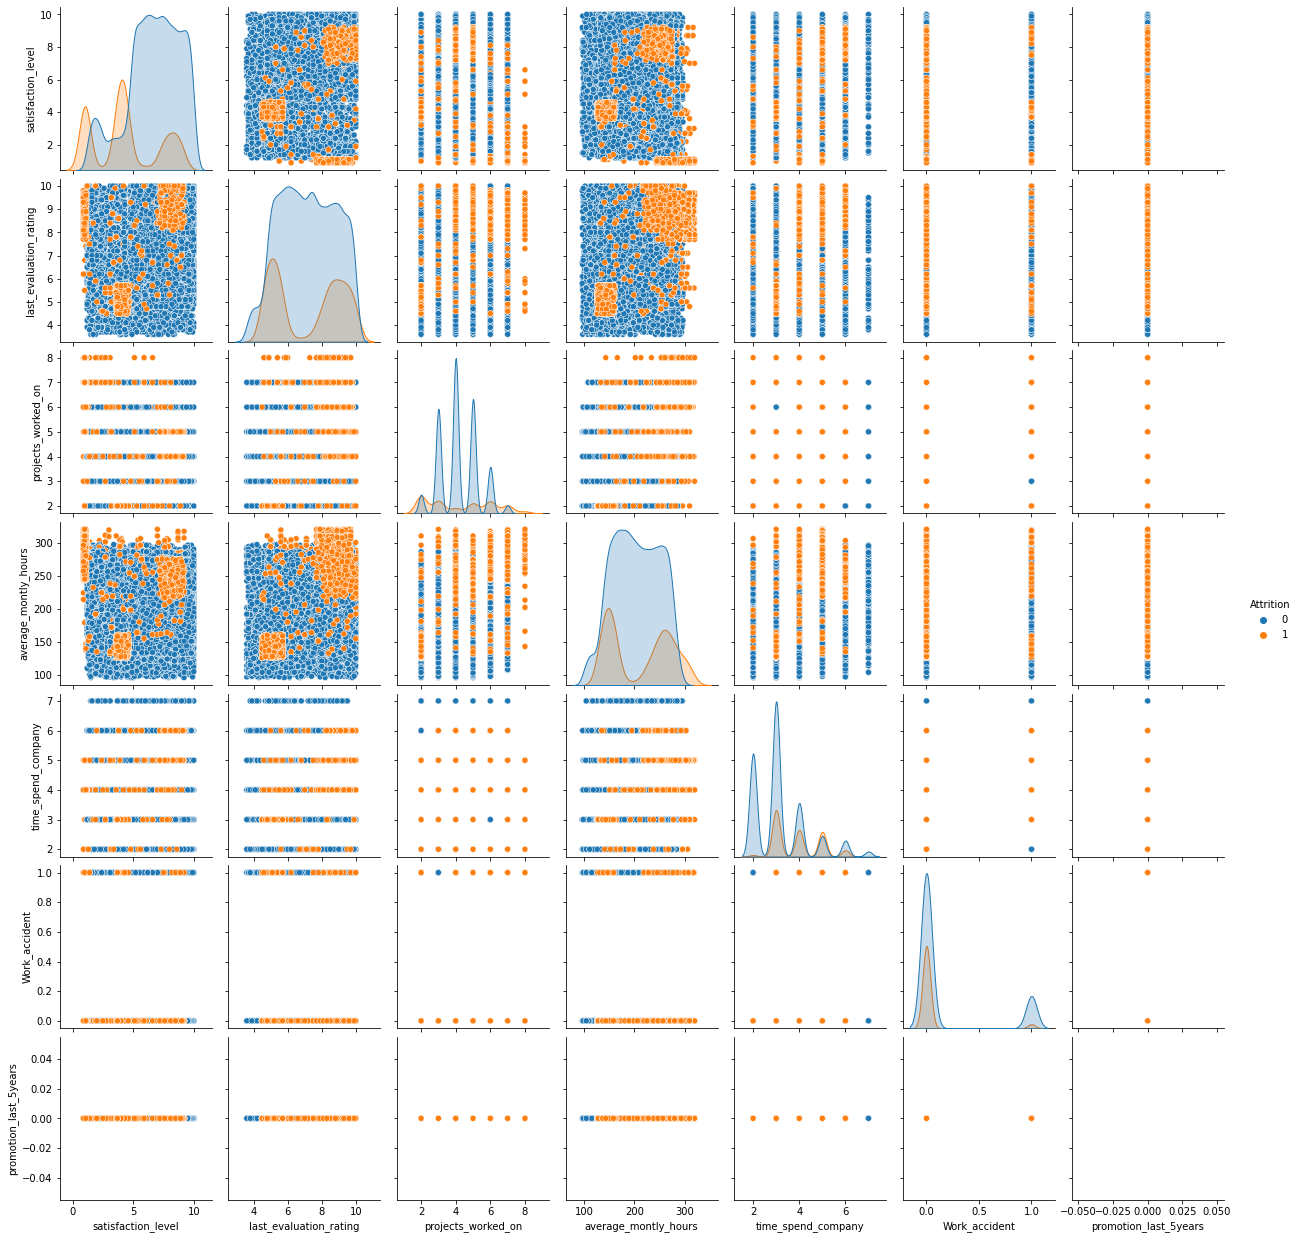

In [33]:
sns.pairplot(original_dpp_all_outliers_removed_df, hue="Attrition")

### 5.3.4 Box Plots

<AxesSubplot:xlabel='Attrition', ylabel='satisfaction_level'>

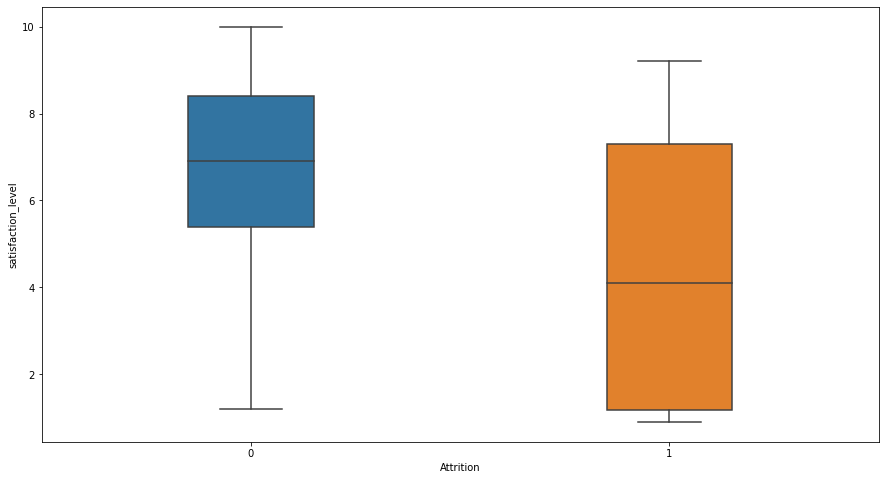

In [17]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='satisfaction_level', data=original_dpp_all_outliers_removed_df, width=0.3)

## this is taking lot of time to run..
# sns.swarmplot(x='Attrition', y='satisfaction_level', data=original_dpp_all_outliers_removed_df, color=".25")

<AxesSubplot:xlabel='Department', ylabel='satisfaction_level'>

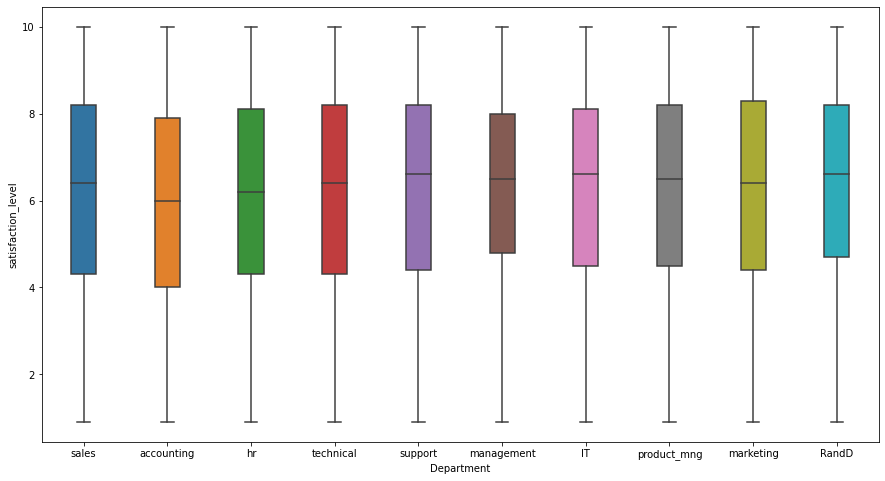

In [8]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='satisfaction_level', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

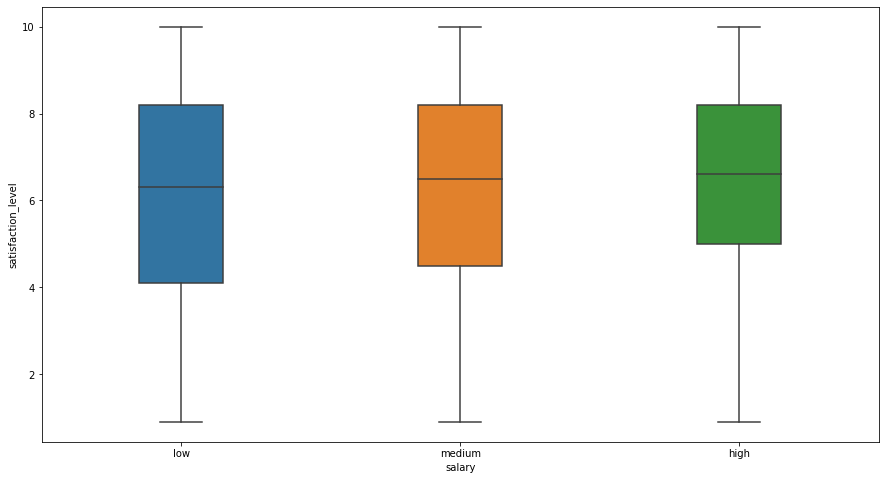

In [42]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='satisfaction_level', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Attrition', ylabel='last_evaluation_rating'>

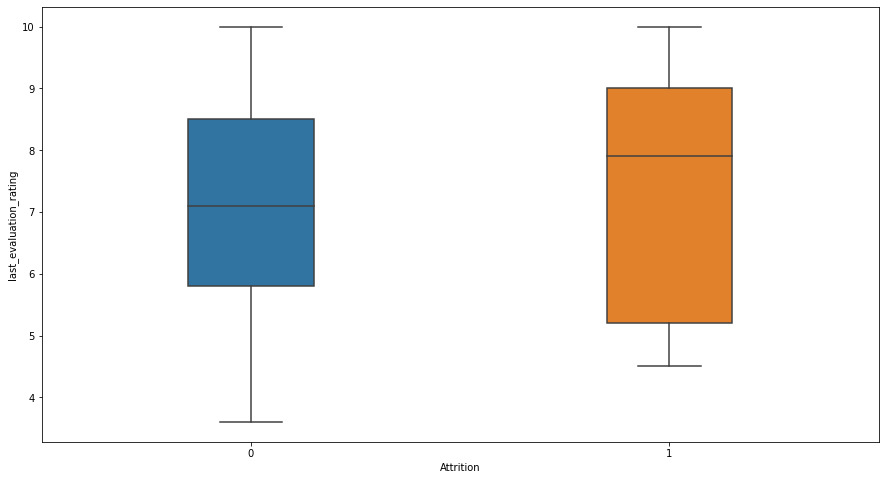

In [43]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='last_evaluation_rating', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Department', ylabel='last_evaluation_rating'>

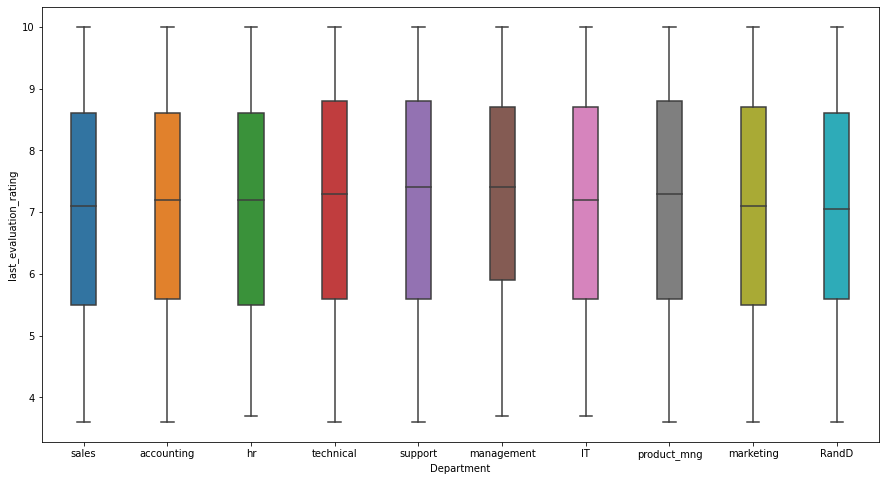

In [44]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='last_evaluation_rating', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='last_evaluation_rating'>

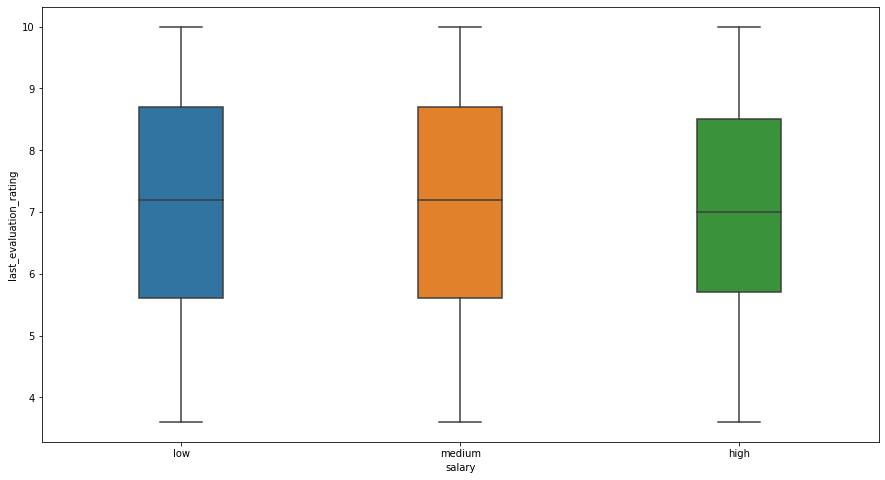

In [45]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='last_evaluation_rating', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Attrition', ylabel='projects_worked_on'>

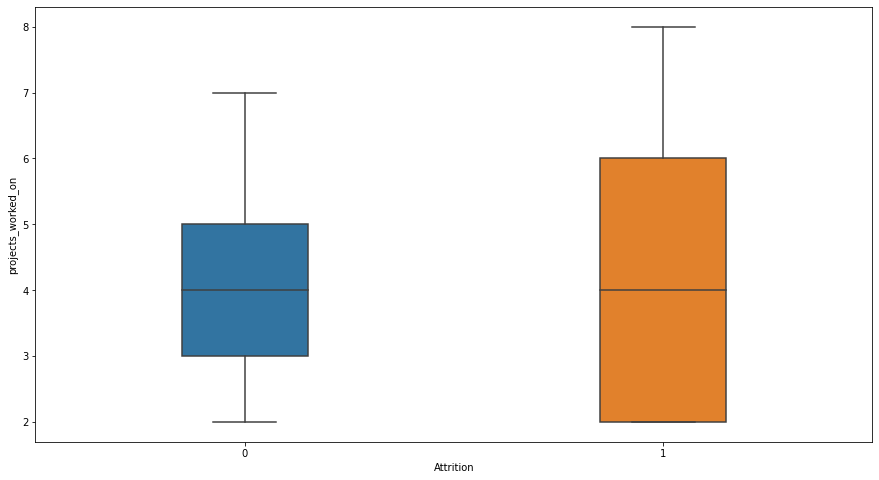

In [46]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='projects_worked_on', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Department', ylabel='projects_worked_on'>

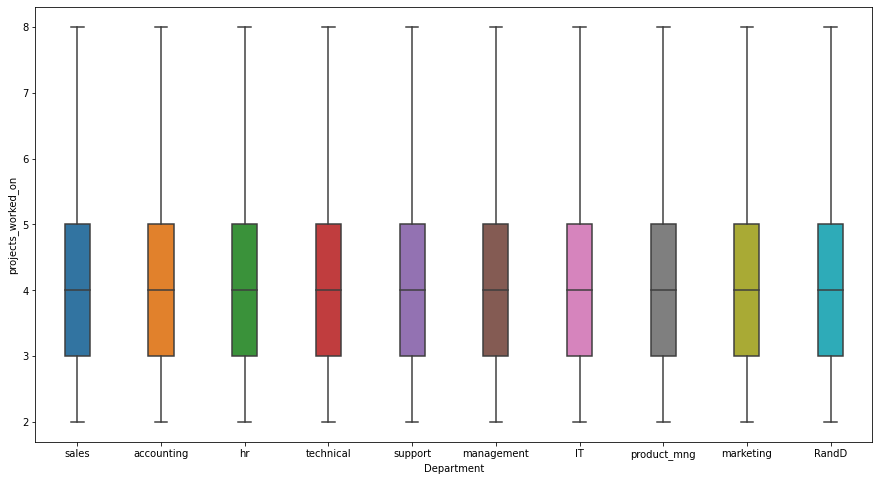

In [47]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='projects_worked_on', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='projects_worked_on'>

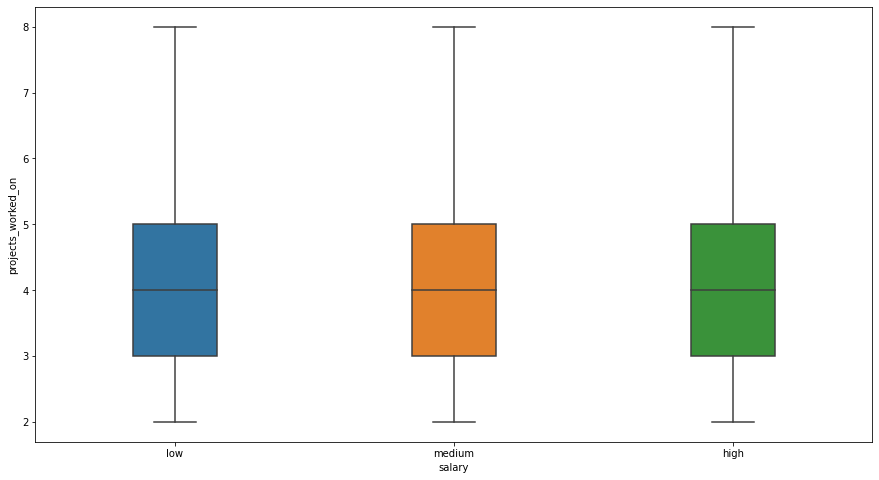

In [48]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='projects_worked_on', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Attrition', ylabel='average_montly_hours'>

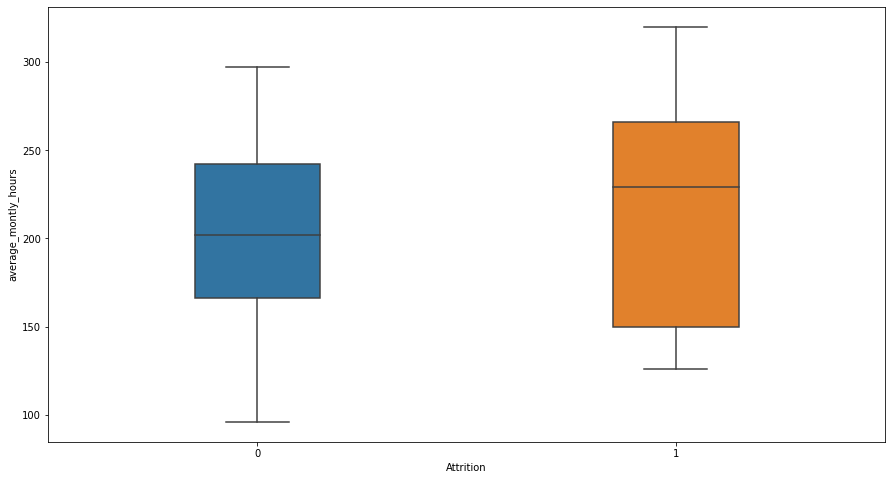

In [49]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='average_montly_hours', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Department', ylabel='average_montly_hours'>

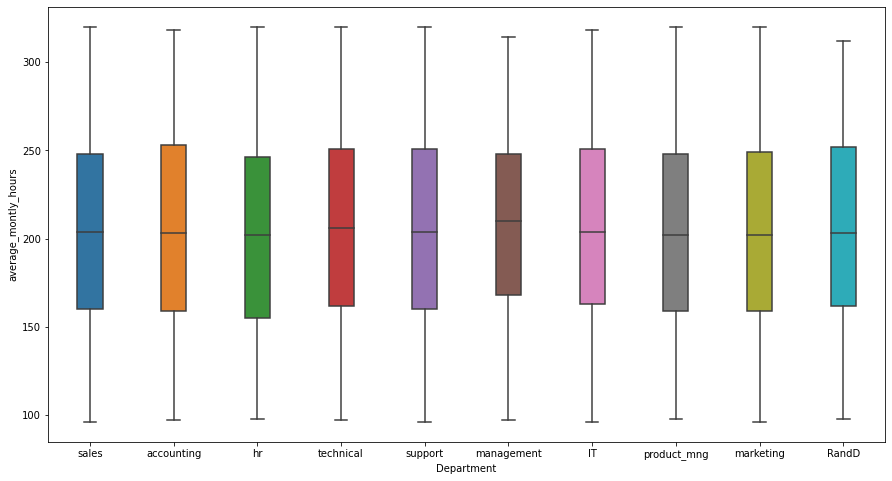

In [50]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='average_montly_hours', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

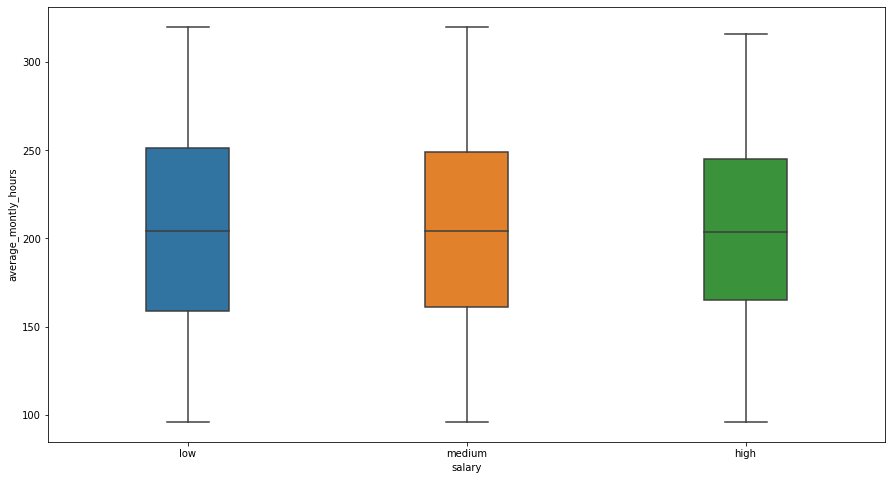

In [51]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='average_montly_hours', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Attrition', ylabel='time_spend_company'>

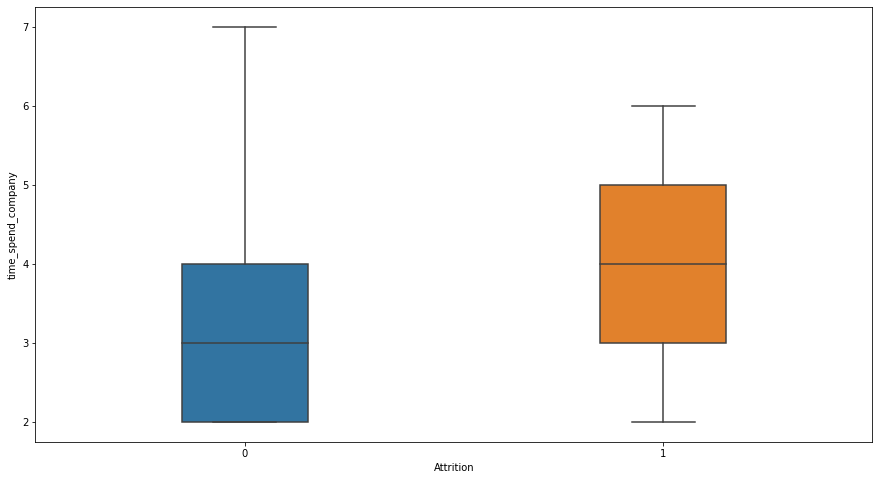

In [56]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Attrition', y='time_spend_company', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='Department', ylabel='time_spend_company'>

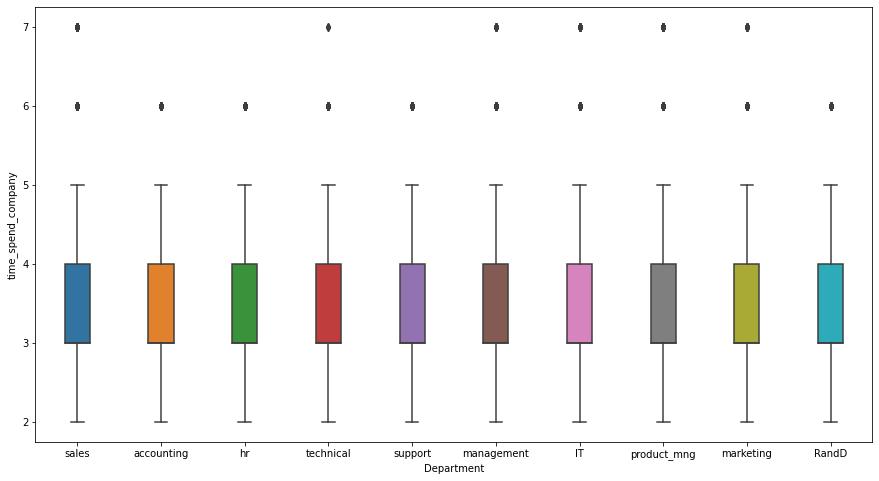

In [53]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='Department', y='time_spend_company', data=original_dpp_all_outliers_removed_df, width=0.3)

<AxesSubplot:xlabel='salary', ylabel='time_spend_company'>

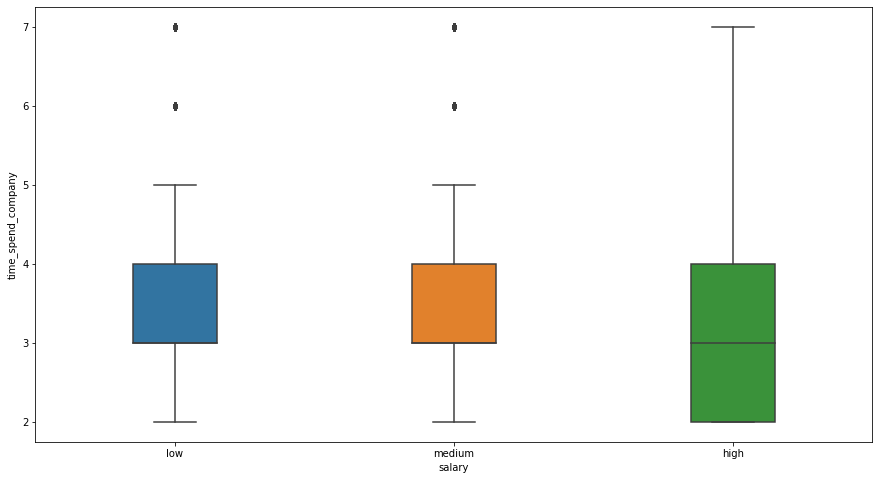

In [54]:
plt.subplots(figsize=(15, 8))
sns.boxplot(x='salary', y='time_spend_company', data=original_dpp_all_outliers_removed_df, width=0.3)

### 5.3.5 Scatter Plots

<AxesSubplot:xlabel='satisfaction_level', ylabel='Attrition'>

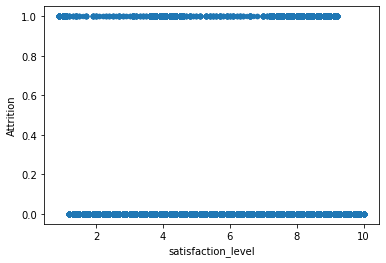

In [62]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='satisfaction_level', y='Attrition')

<AxesSubplot:xlabel='last_evaluation_rating', ylabel='Attrition'>

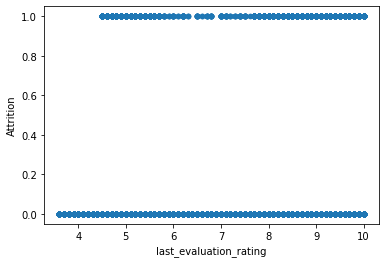

In [63]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='last_evaluation_rating', y='Attrition')

<AxesSubplot:xlabel='projects_worked_on', ylabel='Attrition'>

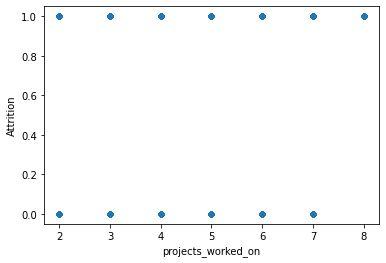

In [64]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='projects_worked_on', y='Attrition')

<AxesSubplot:xlabel='average_montly_hours', ylabel='Attrition'>

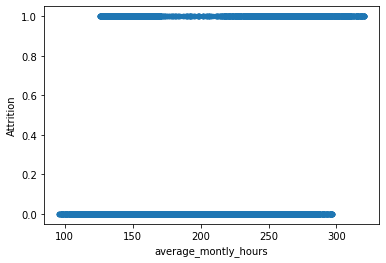

In [65]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='average_montly_hours', y='Attrition')

<AxesSubplot:xlabel='time_spend_company', ylabel='Attrition'>

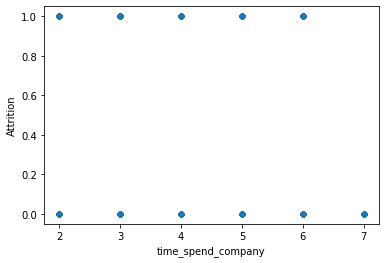

In [66]:
original_dpp_all_outliers_removed_df.plot(kind='scatter', x='time_spend_company', y='Attrition')

## 5.4 PDF & CDF Analysis

### 5.4.1 PDF & CDF Plots

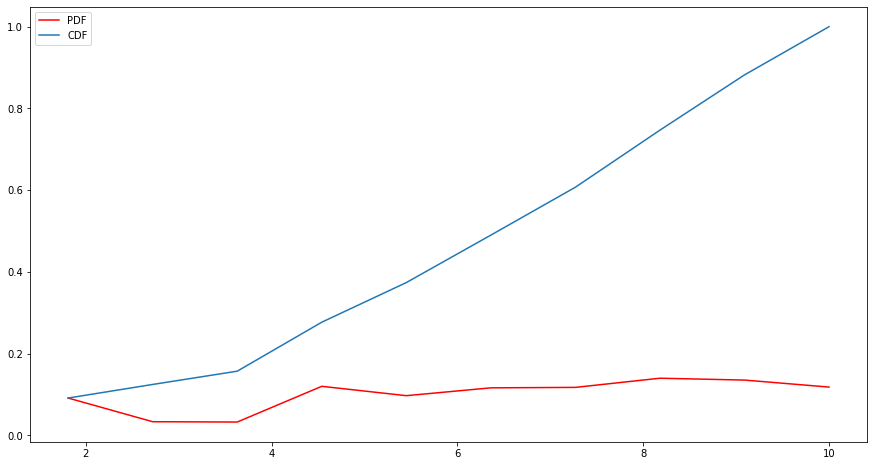

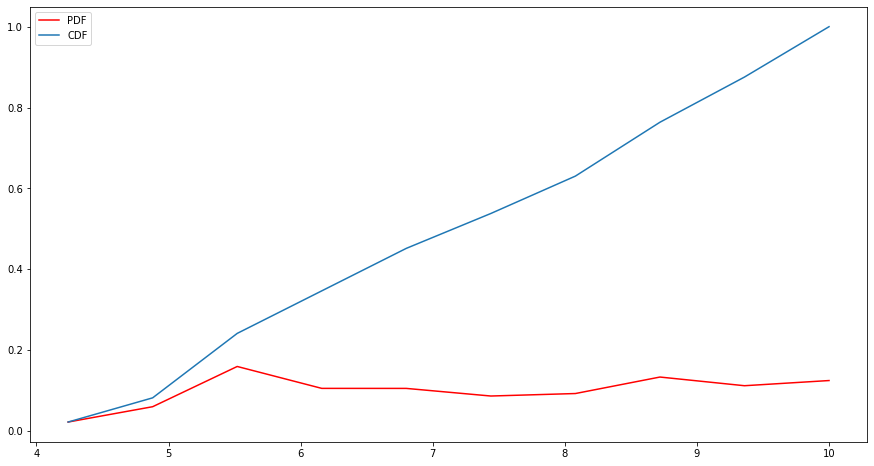

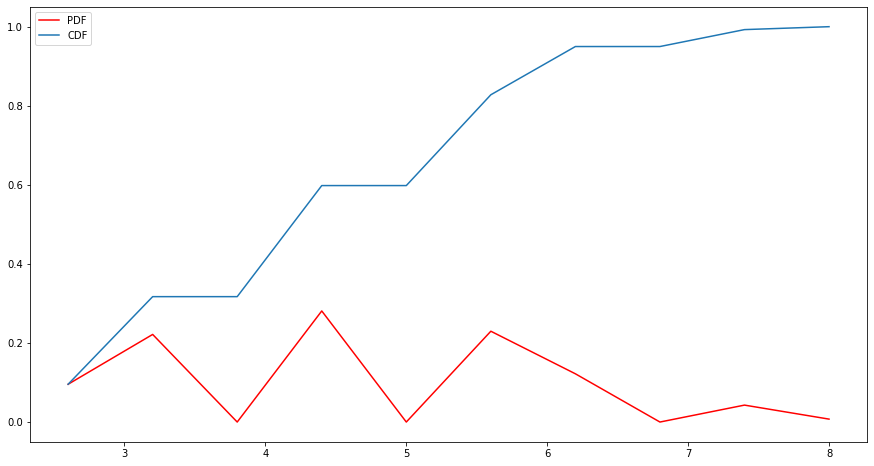

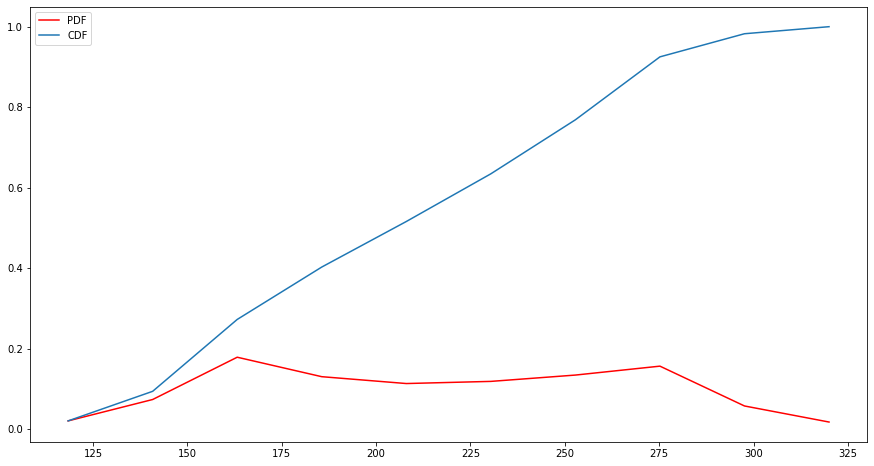

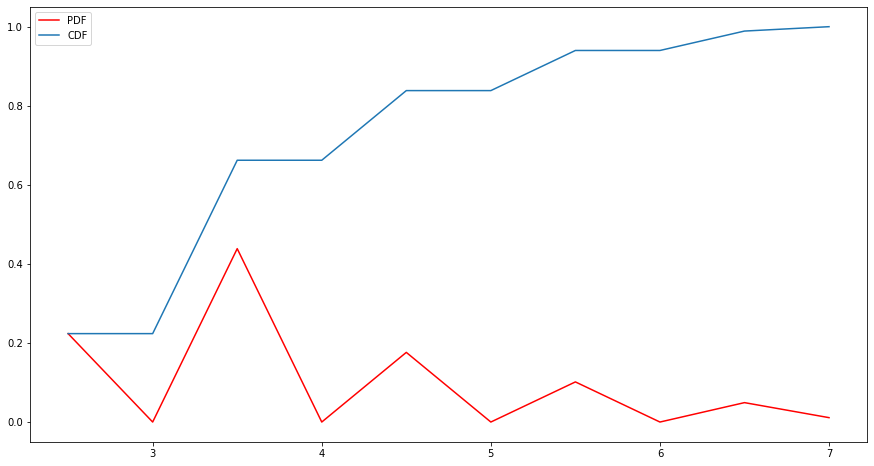

In [10]:
### TODO:
#### set title inside for loop..

for column in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    count, bins_count = np.histogram(original_dpp_all_outliers_removed_df[column], bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.subplots(figsize=(15, 8))
    plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.legend()

### 5.4.2 Pareto Plots

In [51]:
# pareto(original_dpp_all_outliers_removed_df['salary'], ['low', 'medium', 'high'], cumplot=True, data_kw={'width': 0.5, 'color': 'g'})
# plt.title('Data without cum. line, green bar width=0.5', fontsize=10)

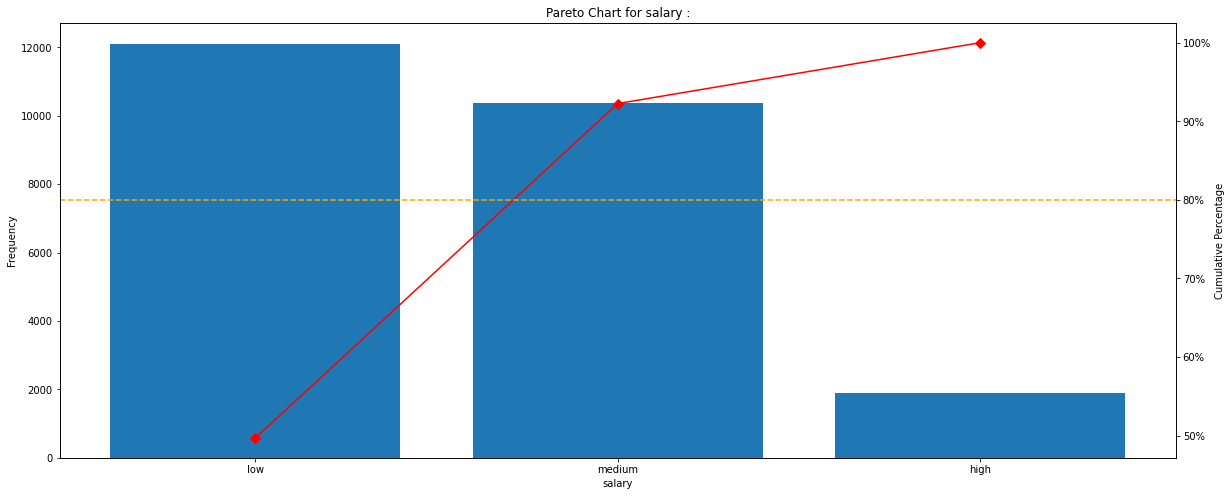

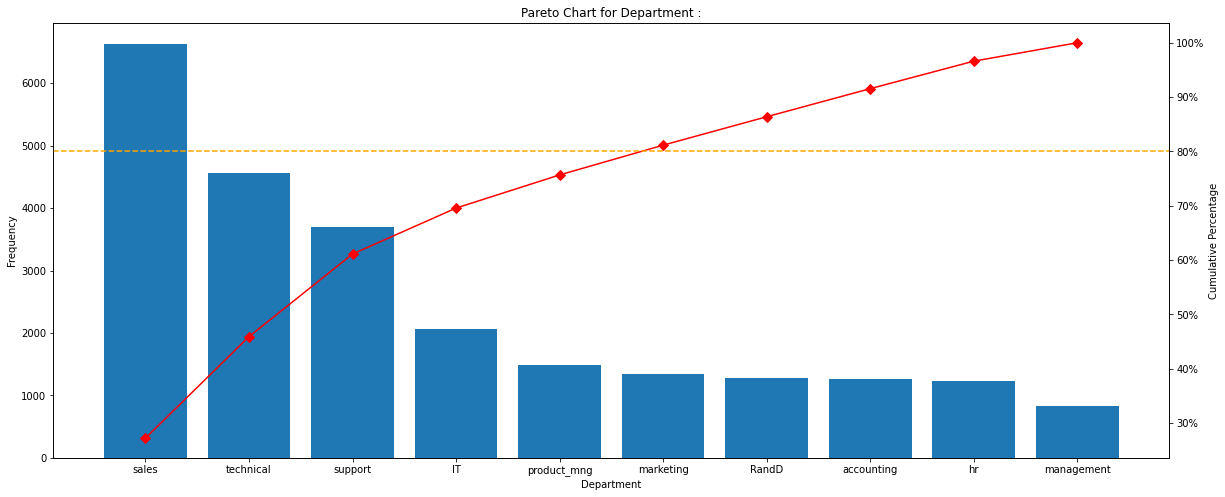

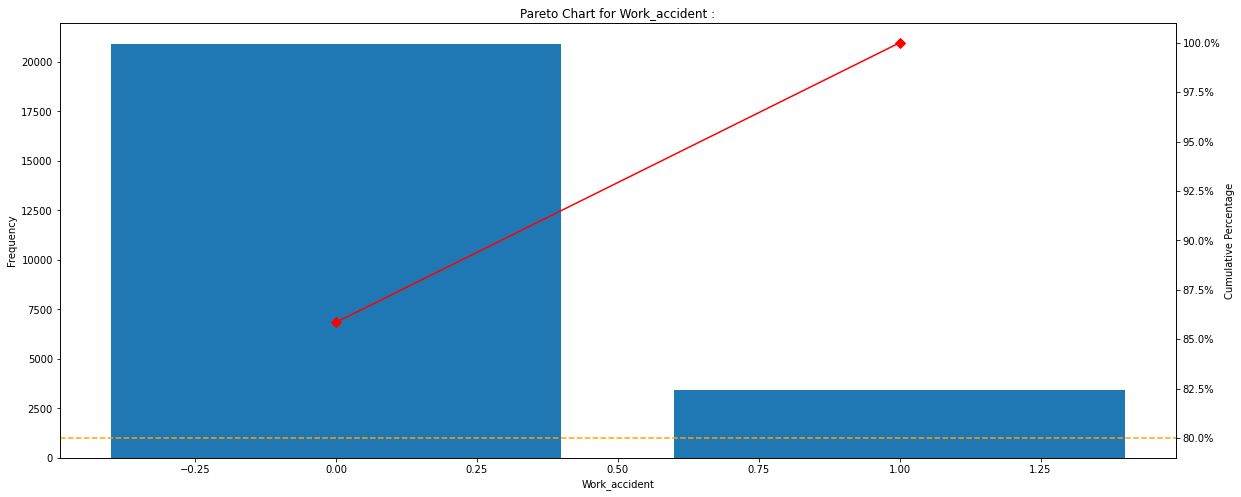

In [52]:
# This code has been taken and modified from :
# https://medium.com/swlh/pareto-chart-with-python-5200459ee65c

# For interpretation, check:
# https://tylermarrs.com/posts/pareto-plot-with-matplotlib/

for column in ['salary', 'Department', 'Work_accident']:
    # Build data frame
    df_column = pd.DataFrame({column: original_dpp_all_outliers_removed_df.groupby([column]).count()['satisfaction_level']})
    df_column.index.name = None

    # Sort values in descending order
    df_column = df_column.sort_values(by=column, ascending=False)

    # Add cumulative percentage column
    df_column["cum_percentage"] = round(df_column[column].cumsum()/df_column[column].sum()*100, 2)

    # Set figure and axis
    fig, ax = plt.subplots(figsize=(20,8))

    # Plot bars (i.e. frequencies)
    ax.bar(df_column.index, df_column[column])
    ax.set_title("Pareto Chart for {column} :".format(column=column))
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency");

    # Second y axis (i.e. cumulative percentage)
    ax2 = ax.twinx()
    ax2.plot(df_column.index, df_column["cum_percentage"], color="red", marker="D", ms=7)
    ax2.axhline(80, color="orange", linestyle="dashed")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel("Cumulative Percentage");

## 5.5 Class Imbalance Plots

<AxesSubplot:xlabel='Attrition', ylabel='count'>

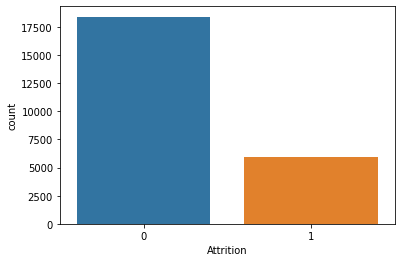

In [53]:
sns.countplot(x='Attrition', data=original_dpp_all_outliers_removed_df)

In [6]:
original_dpp_all_outliers_removed_df['Attrition'].value_counts()

0    18403
1     5964
Name: Attrition, dtype: int64

In [7]:
print("% of people who haven't churned (= 0) = ", (100 * original_dpp_all_outliers_removed_df['Attrition'].value_counts()[0]) / (original_dpp_all_outliers_removed_df['Attrition'].value_counts()[0] + original_dpp_all_outliers_removed_df['Attrition'].value_counts()[1]))
print("% of people who have churned (= 1) = ", (100 * original_dpp_all_outliers_removed_df['Attrition'].value_counts()[1]) / (original_dpp_all_outliers_removed_df['Attrition'].value_counts()[0] + original_dpp_all_outliers_removed_df['Attrition'].value_counts()[1]))

% of people who haven't churned (= 0) =  75.52427463372594
% of people who have churned (= 1) =  24.47572536627406


In [56]:
dill_dump_session('5.5_eda_completed')

# 6 Re-indexing Dataframes

In [5]:
dill_load_session('5.5_eda_completed')

In [56]:
print(original_dpp_all_outliers_removed_df.shape)
original_dpp_all_outliers_removed_df.tail(10)

(24367, 10)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
24856                 4.3                     5.7                   2   
24857                 8.9                     8.8                   5   
24858                 0.9                     8.1                   6   
24859                 4.0                     4.8                   2   
24860                 7.6                     8.3                   6   
24861                 4.0                     5.7                   2   
24862                 3.7                     4.8                   2   
24863                 3.7                     5.3                   2   
24864                 1.1                     9.6                   6   
24865                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
24856                   159                   3           True   
24857                   228                   5           True   
24858                   257                   4          False   
24859                   155                   3          False   
24860                   293                   6          False   
24861                   151                   3          False   
24862                   160                   3          False   
24863                   143                   3          False   
24864                   280                   4          False   
24865                   158                   3          False   

       promotion_last_5years Department salary  Attrition  
24856                  False  technical    low          1  
24857                  False    support    low          1  
24858                  False    support    low          1  
24859                  False    support    low          1  
24860                  False    support    low          1  
24861                  False    support    low          1  
24862                  False    support    low          1  
24863                  False    support    low          1  
24864                  False    support    low          1  
24865                  False    support    low          1

In [57]:
original_dpp_all_outliers_removed_df = original_dpp_all_outliers_removed_df.reset_index(drop=True)

In [60]:
print(original_dpp_all_outliers_removed_df.shape)
original_dpp_all_outliers_removed_df.tail(10)

(24367, 10)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
24357                 4.3                     5.7                   2   
24358                 8.9                     8.8                   5   
24359                 0.9                     8.1                   6   
24360                 4.0                     4.8                   2   
24361                 7.6                     8.3                   6   
24362                 4.0                     5.7                   2   
24363                 3.7                     4.8                   2   
24364                 3.7                     5.3                   2   
24365                 1.1                     9.6                   6   
24366                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
24357                   159                   3           True   
24358                   228                   5           True   
24359                   257                   4          False   
24360                   155                   3          False   
24361                   293                   6          False   
24362                   151                   3          False   
24363                   160                   3          False   
24364                   143                   3          False   
24365                   280                   4          False   
24366                   158                   3          False   

       promotion_last_5years Department salary  Attrition  
24357                  False  technical    low          1  
24358                  False    support    low          1  
24359                  False    support    low          1  
24360                  False    support    low          1  
24361                  False    support    low          1  
24362                  False    support    low          1  
24363                  False    support    low          1  
24364                  False    support    low          1  
24365                  False    support    low          1  
24366                  False    support    low          1

In [61]:
print(eda_df.shape)
eda_df.tail(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
24856                 4.3                     5.7                   2   
24857                 8.9                     8.8                   5   
24858                 0.9                     8.1                   6   
24859                 4.0                     4.8                   2   
24860                 7.6                     8.3                   6   
24861                 4.0                     5.7                   2   
24862                 3.7                     4.8                   2   
24863                 3.7                     5.3                   2   
24864                 1.1                     9.6                   6   
24865                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Attrition  \
24856                   159                   3          1   
24857                   228                   5          1   
24858                   257                   4          1   
24859                   155                   3          1   
24860                   293                   6          1   
24861                   151                   3          1   
24862                   160                   3          1   
24863                   143                   3          1   
24864                   280                   4          1   
24865                   158                   3          1   

       Work_accident_False  Work_accident_True  promotion_last_5years_False  \
24856                    0                   1                            1   
24857                    0                   1                            1   
24858                    1                   0                            1   
24859                    1                   0                            1   
24860                    1                   0                            1   
24861                    1                   0                            1   
24862                    1                   0                            1   
24863                    1                   0                            1   
24864                    1                   0                            1   
24865                    1                   0                            1   

       Department_IT  Department_RandD  Department_accounting  Department_hr  \
24856              0                 0                      0              0   
24857              0                 0                      0              0   
24858              0                 0                      0              0   
24859              0                 0                      0              0   
24860              0                 0                      0              0   
24861              0                 0                      0              0   
24862              0                 0                      0              0   
24863              0                 0                      0              0   
24864              0                 0                      0              0   
24865              0                 0                      0              0   

       Department_management  Department_marketing  Department_product_mng  \
24856                      0                     0                       0   
24857                      0                     0                       0   
24858                      0                     0                       0   
24859                      0                     0                       0   
24860                      0                     0                       0   
24861                      0                     0                       0   
24862                      0                     0                       0   
24863                      0                     0                       0   
24864                      0                     0                 

In [62]:
eda_df = eda_df.reset_index(drop=True)

In [63]:
print(eda_df.shape)
eda_df.tail(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
24357                 4.3                     5.7                   2   
24358                 8.9                     8.8                   5   
24359                 0.9                     8.1                   6   
24360                 4.0                     4.8                   2   
24361                 7.6                     8.3                   6   
24362                 4.0                     5.7                   2   
24363                 3.7                     4.8                   2   
24364                 3.7                     5.3                   2   
24365                 1.1                     9.6                   6   
24366                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Attrition  \
24357                   159                   3          1   
24358                   228                   5          1   
24359                   257                   4          1   
24360                   155                   3          1   
24361                   293                   6          1   
24362                   151                   3          1   
24363                   160                   3          1   
24364                   143                   3          1   
24365                   280                   4          1   
24366                   158                   3          1   

       Work_accident_False  Work_accident_True  promotion_last_5years_False  \
24357                    0                   1                            1   
24358                    0                   1                            1   
24359                    1                   0                            1   
24360                    1                   0                            1   
24361                    1                   0                            1   
24362                    1                   0                            1   
24363                    1                   0                            1   
24364                    1                   0                            1   
24365                    1                   0                            1   
24366                    1                   0                            1   

       Department_IT  Department_RandD  Department_accounting  Department_hr  \
24357              0                 0                      0              0   
24358              0                 0                      0              0   
24359              0                 0                      0              0   
24360              0                 0                      0              0   
24361              0                 0                      0              0   
24362              0                 0                      0              0   
24363              0                 0                      0              0   
24364              0                 0                      0              0   
24365              0                 0                      0              0   
24366              0                 0                      0              0   

       Department_management  Department_marketing  Department_product_mng  \
24357                      0                     0                       0   
24358                      0                     0                       0   
24359                      0                     0                       0   
24360                      0                     0                       0   
24361                      0                     0                       0   
24362                      0                     0                       0   
24363                      0                     0                       0   
24364                      0                     0                       0   
24365                      0                     0                 

In [66]:
lr_eda_df = eda_df.copy()
lr_eda_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [67]:
lr_eda_df.shape[0]

24367

In [69]:
# lr_eda_df.drop(['constant'], axis=1)

In [70]:
constant_column = pd.DataFrame({'constant' : np.ones(lr_eda_df.shape[0], dtype = int)})
lr_eda_df = pd.concat([constant_column, lr_eda_df], axis=1)
lr_eda_df.head(10)

constant  satisfaction_level  last_evaluation_rating  projects_worked_on  \
0         1                 3.8                     5.3                   3   
1         1                 8.0                     8.6                   6   
2         1                 1.1                     8.8                   8   
3         1                 3.7                     5.2                   3   
4         1                 4.1                     5.0                   3   
5         1                 1.0                     7.7                   7   
6         1                 9.2                     8.5                   6   
7         1                 8.9                    10.0                   6   
8         1                 4.2                     5.3                   3   
9         1                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sa

In [71]:
lr_eda_df.shape

(24367, 23)

In [72]:
lr_eda_df.tail(10)

constant  satisfaction_level  last_evaluation_rating  \
24357         1                 4.3                     5.7   
24358         1                 8.9                     8.8   
24359         1                 0.9                     8.1   
24360         1                 4.0                     4.8   
24361         1                 7.6                     8.3   
24362         1                 4.0                     5.7   
24363         1                 3.7                     4.8   
24364         1                 3.7                     5.3   
24365         1                 1.1                     9.6   
24366         1                 3.7                     5.2   

       projects_worked_on  average_montly_hours  time_spend_company  \
24357                   2                   159                   3   
24358                   5                   228                   5   
24359                   6                   257                   4   
24360                   2                   155                   3   
24361                   6                   293                   6   
24362                   2                   151                   3   
24363                   2                   160                   3   
24364                   2                   143                   3   
24365                   6                   280                   4   
24366                   2                   158                   3   

       Attrition  Work_accident_False  Work_accident_True  \
24357          1                    0                   1   
24358          1                    0                   1   
24359          1                    1                   0   
24360          1                    1                   0   
24361          1                    1                   0   
24362          1                    1                   0   
24363          1                    1                   0   
24364          1                    1                   0   
24365          1                    1                   0   
24366          1                    1                   0   

       promotion_last_5years_False  Department_IT  Department_RandD  \
24357                            1              0                 0   
24358                            1              0                 0   
24359                            1              0                 0   
24360                            1              0                 0   
24361                            1              0                 0   
24362                            1              0                 0   
24363                            1              0                 0   
24364                            1              0                 0   
24365                            1              0                 0   
24366                            1              0                 0   

       Department_accounting  Department_hr  Department_management  \
24357                      0              0                      0   
24358                      0              0                      0   
24359                      0              0                      0   
24360                      0              0                      0   
24361                      0              0                      0   
24362                      0              0                      0   
24363                      0              0                      0   
24364                      0              0                      0   
24365                      0              0                      0   
24366                      0              0                      0   

       Department_marketing  Department_product_mng  Department_sales  \
24357                     0                       0                 0   
24358                     0                       0                 0   
24359                     0                       0                 0   
24360         

In [82]:
dill_dump_session('6.till_hypothesis_testing_inaccurate_not_moving_forward')

# 7. Hypothesis Testing

## 7.1  Chi-Square Test For Independence

In [8]:
cst_eda_df = eda_df.copy()
print(cst_eda_df.shape)
cst_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [9]:
cst_eda_x_df = cst_eda_df.loc[:, cst_eda_df.columns != 'Attrition']
cst_eda_y_df = cst_eda_df.loc[:, cst_eda_df.columns == 'Attrition']

In [10]:
print(type(cst_eda_x_df))
print(cst_eda_x_df.shape)
cst_eda_x_df.head(10)

<class 'pandas.core.frame.DataFrame'>
(24367, 21)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0                     0            0   
1                 1                   0                     0            0   
2            

In [11]:
print(type(cst_eda_y_df))
print(cst_eda_y_df.shape)
cst_eda_y_df.head(10)

<class 'pandas.core.frame.DataFrame'>
(24367, 1)


Attrition
0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1

In [31]:
chi_square_select_k_best = SelectKBest(chi2, k=21)
chi_square_select_k_best.fit(cst_eda_x_df, cst_eda_y_df)

SelectKBest(k=21, score_func=<function chi2 at 0x000001267FDDE670>)

In [32]:
# Look at scores returned from the selector for each feature
chi_square_result_df = pd.DataFrame(list(zip(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident_False', 'Work_accident_True', 'promotion_last_5years_False', 'Department_IT', 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical', 'salary_high', 'salary_low', 'salary_medium'], 
                               chi_square_select_k_best.scores_, chi_square_select_k_best.pvalues_)), 
                      columns=['feature', 'Chi-Square Value', 'p-Value']
                     )
chi_square_result_df

feature  Chi-Square Value        p-Value
0            satisfaction_level       3758.964718   0.000000e+00
1        last_evaluation_rating          1.133972   2.869297e-01
2            projects_worked_on          5.948662   1.472846e-02
3          average_montly_hours       1772.954730   0.000000e+00
4            time_spend_company        683.823710  9.849255e-151
5           Work_accident_False         82.088203   1.301471e-19
6            Work_accident_True        498.365439  2.155852e-110
7   promotion_last_5years_False          0.000000   1.000000e+00
8                 Department_IT          3.879474   4.887988e-02
9              Department_RandD         48.452882   3.383208e-12
10        Department_accounting          7.620193   5.771830e-03
11                Department_hr         13.733028   2.107161e-04
12        Department_management         24.505725   7.408936e-07
13         Department_marketing          0.184877   6.672153e-01
14       Department_product_mng          3.894942   4.843171e-02
15             Department_sales          1.423181   2.328806e-01
16           Department_support          0.784162   3.758713e-01
17         Department_technical          5.717375   1.679783e-02
18                  salary_high        293.597142   8.180655e-66
19                   salary_low        182.708294   1.241977e-41
20                salary_medium         53.206636   3.002427e-13

<AxesSubplot:xlabel='feature'>

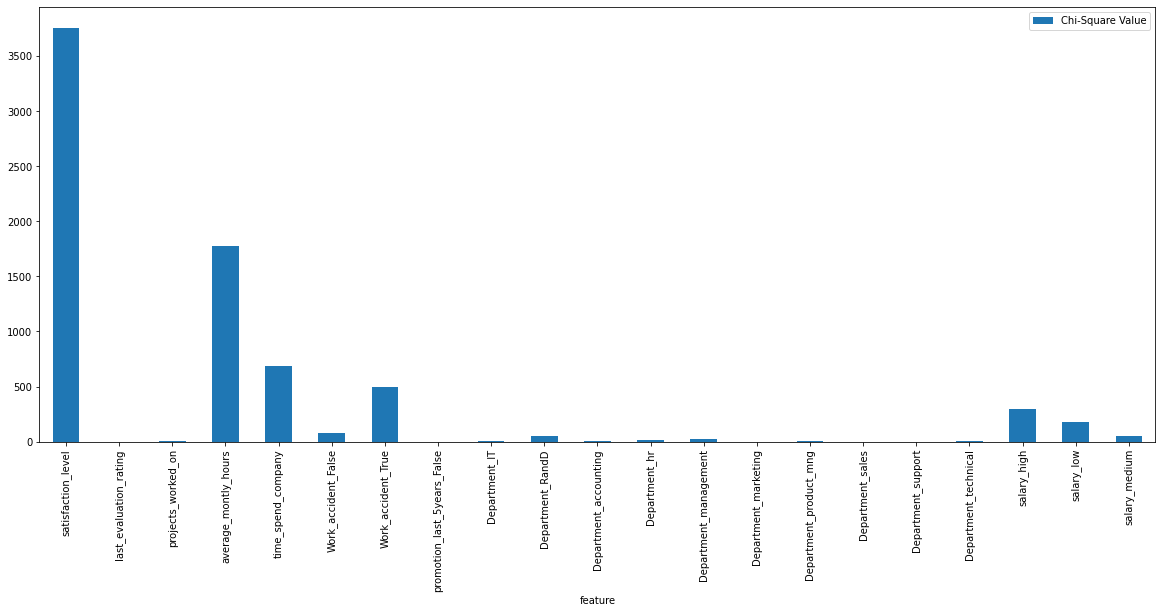

In [33]:
chi_square_result_df.plot(x="feature", y=["Chi-Square Value"], kind="bar", figsize=(20, 8))

<AxesSubplot:xlabel='feature'>

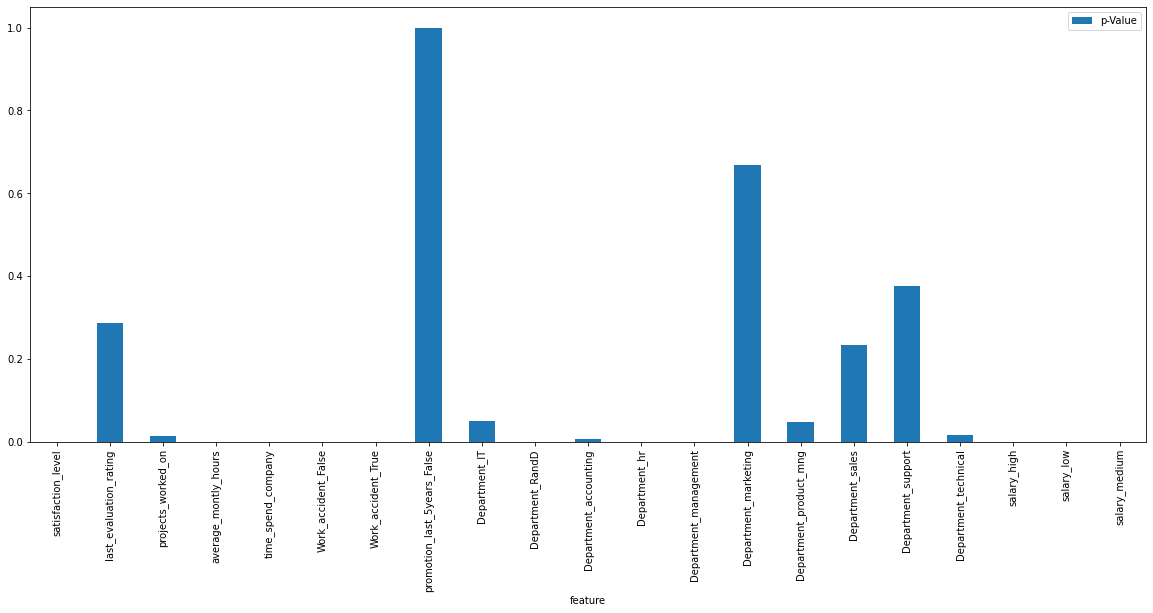

In [34]:
chi_square_result_df.plot(x="feature", y=["p-Value"], kind="bar", figsize=(20, 8))

In [16]:
dill_dump_session('7.1_Hypothesis_testing_chi_square_test_for_independence_completed')

## 7.2 Point-Biserial Correlation Test

In [17]:
eda_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [19]:
pbc_eda_df = eda_df.copy()
print(pbc_eda_df.shape)
pbc_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [24]:
for columns in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    
    print("\n\nRunning Point-Biserial Correlation Test b/w {x} & {y}..".format(x='Attrition', y=columns))
    result = stats.pointbiserialr(pbc_eda_df['Attrition'], pbc_eda_df[columns])
    print(result)



Running Point-Biserial Correlation Test b/w Attrition & satisfaction_level..
PointbiserialrResult(correlation=-0.38858874476872907, pvalue=0.0)


Running Point-Biserial Correlation Test b/w Attrition & last_evaluation_rating..
PointbiserialrResult(correlation=0.010659505018334415, pvalue=0.09613172148888839)


Running Point-Biserial Correlation Test b/w Attrition & projects_worked_on..
PointbiserialrResult(correlation=0.02407425421515164, pvalue=0.0001710534130398026)


Running Point-Biserial Correlation Test b/w Attrition & average_montly_hours..
PointbiserialrResult(correlation=0.07690118177461228, pvalue=2.7424865413327886e-33)


Running Point-Biserial Correlation Test b/w Attrition & time_spend_company..
PointbiserialrResult(correlation=0.2683584836071367, pvalue=0.0)


## 7.3 Grubbs’ Test For Outlier Detection

In [26]:
grbt_eda_df = eda_df.copy()
print(grbt_eda_df.shape)
grbt_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [30]:
for columns in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    
    print("\n\nRunning Grubb's Test for column = {x}..".format(x=columns))
    result = grubbs_test.test(grbt_eda_df[columns], alpha=.05)
    print("# of data points - outliers = ", len(result))



Running Grubb's Test for column = satisfaction_level..
# of data points - outliers =  24367


Running Grubb's Test for column = last_evaluation_rating..
# of data points - outliers =  24367


Running Grubb's Test for column = projects_worked_on..
# of data points - outliers =  24367


Running Grubb's Test for column = average_montly_hours..
# of data points - outliers =  24367


Running Grubb's Test for column = time_spend_company..
# of data points - outliers =  24367


## 7.4 Shapiro Wilk Test For Check Of Normality

In [43]:
swt_eda_df = eda_df.copy()
print(swt_eda_df.shape)
swt_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [38]:
for columns in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    
    print("\n\nRunning Shapiro-Wilk Test for column = {x}..".format(x=columns))
    swt_statistics, p_value = shapiro(swt_eda_df[columns])
    print("Statistics={swt_statistics}, p_value={p_value}..".format(swt_statistics=swt_statistics, p_value=p_value))
    if p_value > 0.05:
        print("Data for this column follows Gaussian distribution..")
    else:
        print("Data for this column does *NOT* follows Gaussian distribution..")



Running Shapiro-Wilk Test for column = satisfaction_level..
Statistics=0.9511915445327759, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


Running Shapiro-Wilk Test for column = last_evaluation_rating..
Statistics=0.9507402181625366, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


Running Shapiro-Wilk Test for column = projects_worked_on..
Statistics=0.9390016198158264, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


Running Shapiro-Wilk Test for column = average_montly_hours..
Statistics=0.9661761522293091, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


Running Shapiro-Wilk Test for column = time_spend_company..
Statistics=0.8579546213150024, p_value=0.0..
Data for this columns does *NOT* follows Gaussian distribution..


c:\users\nalin sharma\my_env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


NOTE - The warning message states that : "c:\users\nalin sharma\my_env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")".. Hence go for another test, one more time..

## 7.5 Anderson-Darling Test For Check Of Normality

In [47]:
adt_eda_df = eda_df.copy()
print(adt_eda_df.shape)
adt_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [5]:
for columns in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    
    print("\n\nRunning Anderson-Darling Test for column = {x}..".format(x=columns))
    ad_result = anderson(adt_eda_df[columns])
    print(ad_result)
    
    ad_test_stastistic_value = ad_result[0]
    ad_critical_value_15_percent = ad_result[1][0]
    ad_critical_value_5_percent = ad_result[1][2]
    
    if ad_test_stastistic_value > ad_critical_value_5_percent:
        print("Data for this column does *NOT* follows Gaussian distribution at 5% significance level..")
    elif ad_test_stastistic_value <= ad_critical_value_5_percent:
        print("Data for this column does follows Gaussian distribution at 5% significance level..")

    if ad_test_stastistic_value > ad_critical_value_15_percent:
        print("Data for this column does *NOT* follows Gaussian distribution at 15% significance level..")
    elif ad_test_stastistic_value <= ad_critical_value_15_percent:
        print("Data for this column does follows Gaussian distribution at 15% significance level..")



Running Anderson-Darling Test for column = satisfaction_level..
AndersonResult(statistic=280.61752656256795, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Data for this column does *NOT* follows Gaussian distribution at 5% significance level..
Data for this column does *NOT* follows Gaussian distribution at 15% significance level..


Running Anderson-Darling Test for column = last_evaluation_rating..
AndersonResult(statistic=374.2689641684119, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Data for this column does *NOT* follows Gaussian distribution at 5% significance level..
Data for this column does *NOT* follows Gaussian distribution at 15% significance level..


Running Anderson-Darling Test for column = projects_worked_on..
AndersonResult(statistic=592.4144929265822, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significanc

In [49]:
dill_dump_session('7.5_hypothesis_testing_completed')

# 8. Data Processing - After Doing EDA & Hypothesis Testing

In [4]:
dill_load_session('7.5_hypothesis_testing_completed')

In [6]:
dp_atfer_eda_and_ht_eda_df = eda_df.copy()
print(dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.head(10)

(24367, 22)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  promotion_last_5years_False  Department_IT  \
0                   0                            1              0   
1                   0                            1              0   
2                   0                            1              0   
3                   0                            1              0   
4                   0                            1              0   
5                   0                            1              0   
6                   0                            1              0   
7                   0                            1              0   
8                   0                            1              0   
9                   0                            1              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   Department_sales  Department_support  Department_technical  salary_high  \
0                 1                   0         

In [7]:
dp_atfer_eda_and_ht_original_dpp_all_outliers_removed_df = original_dpp_all_outliers_removed_df.copy()
print(dp_atfer_eda_and_ht_original_dpp_all_outliers_removed_df.shape)
dp_atfer_eda_and_ht_original_dpp_all_outliers_removed_df.head(10)

(24367, 10)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3          False   
1                   272                   6          False   
2                   282                   4          False   
3                   169                   3          False   
4                   163                   3          False   
5                   257                   4          False   
6                   269                   5          False   
7                   234                   5          False   
8                   152                   3          False   
9                   315                   4          False   

   promotion_last_5years Department  salary  Attrition  
0                  False      sales     low          1  
1                  False      sales  medium          1  
2                  False      sales  medium          1  
3                  False      sales     low          1  
4                  False      sales     low          1  
5                  False      sales     low          1  
6                  False      sales     low          1  
7                  False      sales     low          1  
8                  False      sales     low          1  
9                  False      sales     low          1

## 8.1 Remove Redundant Columns

### 8.1.1 Removing Column - Promotion Last 5 Years

In [13]:
pl5y_pt = PrettyTable()
pl5y_pt.field_names = ["Feature Name", "Pearson Correlation Value", "P-Value (From Chi-Square Test Of Independence)"]
pl5y_pt.add_row(["Promotion Last 5 Years", "NaN", 1.00])
print(pl5y_pt)

+------------------------+---------------------------+------------------------------------------------+
|      Feature Name      | Pearson Correlation Value | P-Value (From Chi-Square Test Of Independence) |
+------------------------+---------------------------+------------------------------------------------+
| Promotion Last 5 Years |            NaN            |                      1.0                       |
+------------------------+---------------------------+------------------------------------------------+


In [17]:
print("Before Removing : ", dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.drop('promotion_last_5years_False', axis=1, inplace=True)
print("After Removing : ", dp_atfer_eda_and_ht_eda_df.shape)

Before Removing :  (24367, 22)
After Removing :  (24367, 21)


### 8.1.2 Removing Column - Department Marketing

In [14]:
dept_mkt_pt = PrettyTable()
dept_mkt_pt.field_names = ["Feature Name", "Pearson Correlation Value", "P-Value (From Chi-Square Test Of Independence)"]
dept_mkt_pt.add_row(["Department Marketing", 0.002833, 0.667])
print(dept_mkt_pt)

+----------------------+---------------------------+------------------------------------------------+
|     Feature Name     | Pearson Correlation Value | P-Value (From Chi-Square Test Of Independence) |
+----------------------+---------------------------+------------------------------------------------+
| Department Marketing |          0.002833         |                     0.667                      |
+----------------------+---------------------------+------------------------------------------------+


In [18]:
print("Before Removing : ", dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.drop('Department_marketing', axis=1, inplace=True)
print("After Removing : ", dp_atfer_eda_and_ht_eda_df.shape)

Before Removing :  (24367, 21)
After Removing :  (24367, 20)


### 8.1.3 Removing Column - Department Sales

In [19]:
dept_sales_pt = PrettyTable()
dept_sales_pt.field_names = ["Feature Name", "Pearson Correlation Value", "P-Value (From Chi-Square Test Of Independence)"]
dept_sales_pt.add_row(["Department Sales", 0.00895, 0.232])
print(dept_sales_pt)

+------------------+---------------------------+------------------------------------------------+
|   Feature Name   | Pearson Correlation Value | P-Value (From Chi-Square Test Of Independence) |
+------------------+---------------------------+------------------------------------------------+
| Department Sales |          0.00895          |                     0.232                      |
+------------------+---------------------------+------------------------------------------------+


In [21]:
print("Before Removing : ", dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.drop('Department_sales', axis=1, inplace=True)
print("After Removing : ", dp_atfer_eda_and_ht_eda_df.shape)

Before Removing :  (24367, 20)
After Removing :  (24367, 19)


### 8.1.4 Removing Column - Department Support

In [20]:
dept_spt_pt = PrettyTable()
dept_spt_pt.field_names = ["Feature Name", "Pearson Correlation Value", "P-Value (From Chi-Square Test Of Independence)"]
dept_spt_pt.add_row(["Department Support", 0.006161, 0.375])
print(dept_spt_pt)

+--------------------+---------------------------+------------------------------------------------+
|    Feature Name    | Pearson Correlation Value | P-Value (From Chi-Square Test Of Independence) |
+--------------------+---------------------------+------------------------------------------------+
| Department Support |          0.006161         |                     0.375                      |
+--------------------+---------------------------+------------------------------------------------+


In [22]:
print("Before Removing : ", dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.drop('Department_support', axis=1, inplace=True)
print("After Removing : ", dp_atfer_eda_and_ht_eda_df.shape)

Before Removing :  (24367, 19)
After Removing :  (24367, 18)


In [23]:
print(dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

## 8.2 Make Columns Follow Normal Distribution

### 8.2.1 satisfaction_level

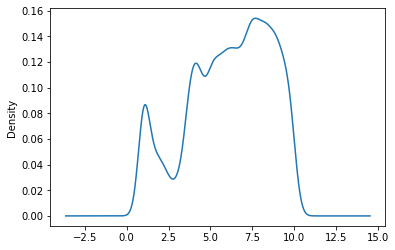

In [25]:
dp_atfer_eda_and_ht_eda_df['satisfaction_level'].plot(kind='kde')

In [27]:
satisfaction_level_df = dp_atfer_eda_and_ht_eda_df['satisfaction_level']
satisfaction_level_df.head(10)

0    3.8
1    8.0
2    1.1
3    3.7
4    4.1
5    1.0
6    9.2
7    8.9
8    4.2
9    1.1
Name: satisfaction_level, dtype: float64

In [54]:
# data = satisfaction_level_df.to_numpy()           # Numpy arrays are easier for 1D data
# mu, std = norm.fit(data)                          # Fit a normal distribution
# print("Mu and Std: ", mu, std)

# CI_95 = norm.interval(0.95, loc=mu, scale=std)    # Find the 95% CI endpoints
# print("Confidence Interval: ", CI_95)

# plt.vlines(CI_95, ymin=0, ymax=0.4)               # plotting stuff
# x = np.linspace(mu - 3*std, mu + 3*std, 100)
# plt.plot(x, norm.pdf(x, mu, std))
# plt.show()

0.09917309986358243


c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

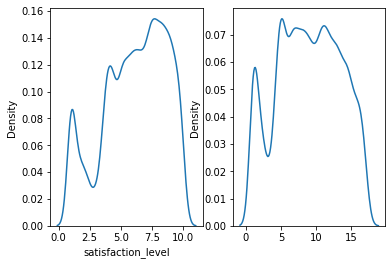

In [78]:
fitted_data_satisfaction_level_df_boxcox, fitted_lambda_satisfaction_level_df_boxcox = boxcox(np.exp(satisfaction_level_df))
print(fitted_lambda_satisfaction_level_df_boxcox)

fig, ax = plt.subplots(1, 2)  
sns.distplot(satisfaction_level_df, hist = False, kde = True, ax = ax[0])
sns.distplot(fitted_data_satisfaction_level_df_boxcox, hist = False, kde = True, ax = ax[1])

1.3649659388671584


c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

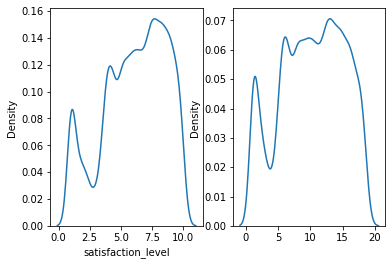

In [79]:
fitted_data_satisfaction_level_df_yeojohnson, fitted_lambda_satisfaction_level_df_yeojohnson = yeojohnson(satisfaction_level_df)
print(fitted_lambda_satisfaction_level_df_yeojohnson)

fig, ax = plt.subplots(1, 2)  
sns.distplot(satisfaction_level_df, hist = False, kde = True, ax = ax[0])
sns.distplot(fitted_data_satisfaction_level_df_yeojohnson, hist = False, kde = True, ax = ax[1])

Text(0.5, 0, '')

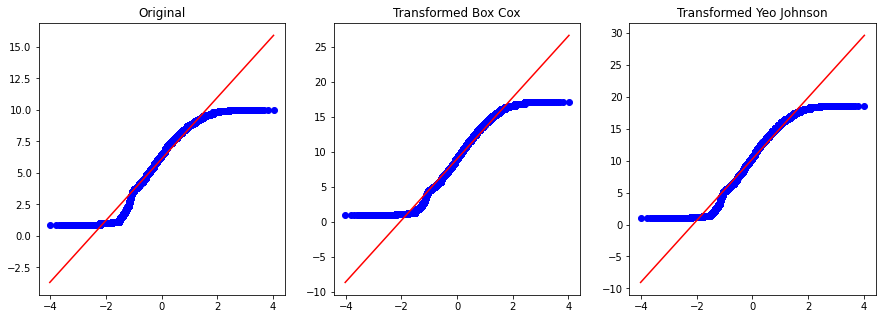

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

prob = stats.probplot(satisfaction_level_df, dist=stats.norm, plot=ax1)
prob = stats.probplot(fitted_data_satisfaction_level_df_boxcox, dist=stats.norm, plot=ax2)
prob = stats.probplot(fitted_data_satisfaction_level_df_yeojohnson, dist=stats.norm, plot=ax3)

ax1.set_title('Original')
ax2.set_title('Transformed Box Cox')
ax3.set_title('Transformed Yeo Johnson')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

In [85]:
chi_value_satisfaction_level, p_value_satisfaction_level = stats.normaltest(fitted_data_satisfaction_level_df_boxcox)
print(chi_value_satisfaction_level, p_value_satisfaction_level)

# fail to reject the null hypothesis..
if p_value_satisfaction_level > 0.05:
    print('Data looks like Gaussian..')
    
# reject the null hypothesis..    
else:
    print('Data does *NOT* looks like Gaussian..')

4863.495522073263 0.0
Data does *NOT* looks like Gaussian..


### 8.2.2 last_evaluation_rating

<AxesSubplot:ylabel='Density'>

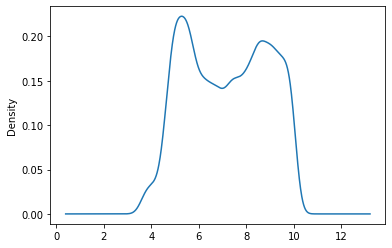

In [53]:
dp_atfer_eda_and_ht_eda_df['last_evaluation_rating'].plot(kind='kde')

In [55]:
last_evaluation_rating_df = dp_atfer_eda_and_ht_eda_df['last_evaluation_rating']
last_evaluation_rating_df.head(10)

0     5.3
1     8.6
2     8.8
3     5.2
4     5.0
5     7.7
6     8.5
7    10.0
8     5.3
9     8.1
Name: last_evaluation_rating, dtype: float64

<AxesSubplot:ylabel='Density'>

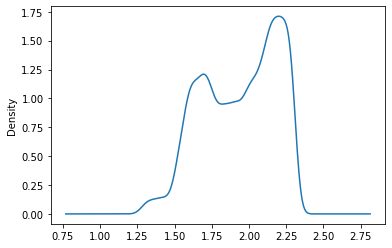

In [56]:
np.log(last_evaluation_rating_df).plot(kind='kde')

0.8055331152889095


c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

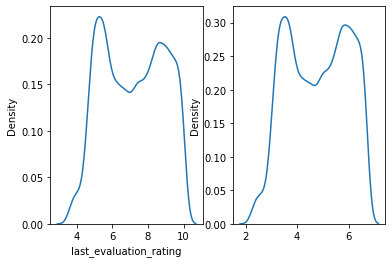

In [86]:
fitted_data_last_evaluation_rating_df_boxcox, fitted_lambda_last_evaluation_rating_df_boxcox = boxcox(last_evaluation_rating_df)
print(fitted_lambda_last_evaluation_rating_df_boxcox)

fig, ax = plt.subplots(1, 2)  
sns.distplot(last_evaluation_rating_df, hist = False, kde = True, ax = ax[0])
sns.distplot(fitted_data_last_evaluation_rating_df_boxcox, hist = False, kde = True, ax = ax[1])

1.3649659388671584


c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\nalin sharma\my_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

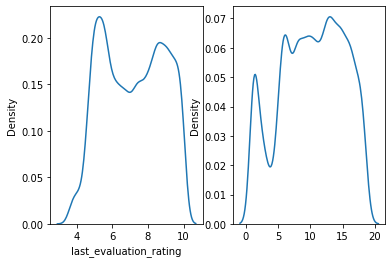

In [87]:
fitted_data_last_evaluation_rating_df_yeojohnson, fitted_lambda_last_evaluation_rating_df_yeojohnson = yeojohnson(satisfaction_level_df)
print(fitted_lambda_last_evaluation_rating_df_yeojohnson)

fig, ax = plt.subplots(1, 2)  
sns.distplot(last_evaluation_rating_df, hist = False, kde = True, ax = ax[0])
sns.distplot(fitted_data_last_evaluation_rating_df_yeojohnson, hist = False, kde = True, ax = ax[1])

Text(0.5, 0, '')

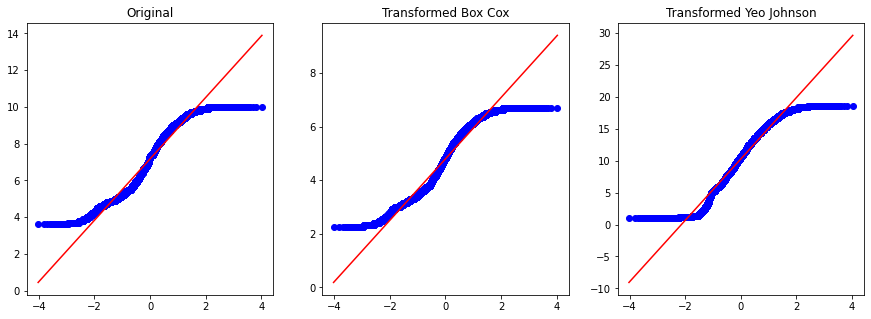

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

prob = stats.probplot(last_evaluation_rating_df, dist=stats.norm, plot=ax1)
prob = stats.probplot(fitted_data_last_evaluation_rating_df_boxcox, dist=stats.norm, plot=ax2)
prob = stats.probplot(fitted_data_last_evaluation_rating_df_yeojohnson, dist=stats.norm, plot=ax3)

ax1.set_title('Original')
ax2.set_title('Transformed Box Cox')
ax3.set_title('Transformed Yeo Johnson')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

In [89]:
chi_value_last_evaluation_rating, p_value_last_evaluation_rating = stats.normaltest(fitted_data_last_evaluation_rating_df_yeojohnson)
print(chi_value_last_evaluation_rating, p_value_last_evaluation_rating)

# fail to reject the null hypothesis..
if p_value_last_evaluation_rating > 0.05:
    print('Data looks like Gaussian..')
    
# reject the null hypothesis..    
else:
    print('Data does *NOT* looks like Gaussian..')

4215.792427692439 0.0
Data does *NOT* looks like Gaussian..


NOTE - Since both are bimodal, it's shown that transforming them into sinlge mode normal distribution doesn't work..

## 8.3 Dealing With Class Imbalance via SMOTE (Synthetic Minority Over-sampling TEchnique)

In [91]:
print(dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [92]:
dp_atfer_eda_and_ht_eda_df['Attrition'].value_counts()

0    18403
1     5964
Name: Attrition, dtype: int64

In [93]:
x_dp_atfer_eda_and_ht_eda_df = dp_atfer_eda_and_ht_eda_df.loc[:, dp_atfer_eda_and_ht_eda_df.columns != 'Attrition']
y_dp_atfer_eda_and_ht_eda_df = dp_atfer_eda_and_ht_eda_df.loc[:, dp_atfer_eda_and_ht_eda_df.columns == 'Attrition']

In [94]:
x_dp_atfer_eda_and_ht_eda_df.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0

In [96]:
y_dp_atfer_eda_and_ht_eda_df.head(10)

Attrition
0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1

In [99]:
sm = SMOTE(random_state=42)

x_dp_atfer_eda_and_ht_eda_smote_df, y_dp_atfer_eda_and_ht_eda_smote_df = sm.fit_resample(x_dp_atfer_eda_and_ht_eda_df, y_dp_atfer_eda_and_ht_eda_df)

print("df.shape before SMOTE = ", x_dp_atfer_eda_and_ht_eda_df.shape)
print("df.shape after SMOTE = ", x_dp_atfer_eda_and_ht_eda_smote_df.shape)

print('\n\nDivision among classes = ')
y_dp_atfer_eda_and_ht_eda_smote_df.value_counts(normalize=True) * 100

df.shape before SMOTE =  (24367, 17)
df.shape after SMOTE =  (36806, 17)


Division among classes = 


Attrition
0            50.0
1            50.0
dtype: float64

In [100]:
smote_df = pd.concat([x_dp_atfer_eda_and_ht_eda_smote_df, y_dp_atfer_eda_and_ht_eda_smote_df], axis=1)
smote_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [101]:
smote_df['Attrition'].value_counts()

0    18403
1    18403
Name: Attrition, dtype: int64

## 8.4 Standardization & Normalization Of SMOTE generated dataset

In [102]:
smote_df.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

### 8.4.1 Standardization Of SMOTE generated dataset

In [105]:
smote_standardized_df = smote_df.copy()
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [104]:
standardize_these_columns_smote = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [106]:
std_scaler_smote = StandardScaler()
smote_standardized_df[standardize_these_columns_smote] = std_scaler_smote.fit_transform(smote_standardized_df[standardize_these_columns_smote])

In [107]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

### 8.4.2 Normalization Of SMOTE generated dataset

In [108]:
smote_normalized_df = smote_df.copy()
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Work_accident_False  \
0                   167                   3                    1   
1                   272                   6                    1   
2                   282                   4                    1   
3                   169                   3                    1   
4                   163                   3                    1   
5                   257                   4                    1   
6                   269                   5                    1   
7                   234                   5                    1   
8                   152                   3                    1   
9                   315                   4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [109]:
normalize_these_columns_smote = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [110]:
min_max_scaler_smote = MinMaxScaler()
smote_normalized_df[normalize_these_columns_smote] = min_max_scaler_smote.fit_transform(smote_normalized_df[normalize_these_columns_smote])

In [112]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

## 8.5 Standardization & Normalization Of NON-SMOTE generated dataset

In [113]:
print(dp_atfer_eda_and_ht_eda_df.shape)
dp_atfer_eda_and_ht_eda_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

### 8.5.1 Standardization Of NON-SMOTE generated dataset

In [114]:
non_smote_standardized_df = dp_atfer_eda_and_ht_eda_df.copy()
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [117]:
standardize_these_columns_non_smote = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [118]:
std_scaler_non_smote = StandardScaler()
non_smote_standardized_df[standardize_these_columns_non_smote] = std_scaler_non_smote.fit_transform(non_smote_standardized_df[standardize_these_columns_non_smote])

In [119]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

### 8.5.2 Normalization Of NON-SMOTE generated dataset

In [120]:
non_smote_normalized_df = dp_atfer_eda_and_ht_eda_df.copy()
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   
5                 1.0                     7.7                   7   
6                 9.2                     8.5                   6   
7                 8.9                    10.0                   6   
8                 4.2                     5.3                   3   
9                 1.1                     8.1                   7   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0                   167                   3          1                    1   
1                   272                   6          1                    1   
2                   282                   4          1                    1   
3                   169                   3          1                    1   
4                   163                   3          1                    1   
5                   257                   4          1                    1   
6                   269                   5          1                    1   
7                   234                   5          1                    1   
8                   152                   3          1                    1   
9                   315                   4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [121]:
normalize_these_columns_non_smote = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [122]:
min_max_scaler_non_smote = MinMaxScaler()
non_smote_normalized_df[normalize_these_columns_non_smote] = min_max_scaler_non_smote.fit_transform(non_smote_normalized_df[normalize_these_columns_non_smote])

In [123]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

## 8.6 Export To CSV's

In [169]:
smote_standardized_df.to_csv('../save/csv/8.4.1_smote_standardized_df.csv', index=False)

In [170]:
smote_normalized_df.to_csv('../save/csv/8.4.2_smote_normalized_df.csv', index=False)

In [171]:
non_smote_standardized_df.to_csv('../save/csv/8.5.1_non_smote_standardized_df.csv', index=False)

In [172]:
non_smote_normalized_df.to_csv('../save/csv/8.5.2_non_smote_normalized_df.csv', index=False)

In [173]:
dill_dump_session('8.6_data_processing_after_doing_eda_and_hypothesis_testing_and_exporting_csv_completed')

# 9 ML Algorithms 1 - kNN (k-Nearest Neighbours)

In [4]:
dill_load_session('8.6_data_processing_after_doing_eda_and_hypothesis_testing_and_exporting_csv_completed')

## 9.1 k-NN On SMOTE Standardized Data

In [92]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [93]:
x_smote_standardized = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [94]:
# splitting into train & test set..
x_train_smote_standardized, x_test_smote_standardized, y_train_smote_standardized, y_test_smote_standardized = train_test_split(x_smote_standardized, y_smote_standardized, test_size = 0.20, stratify=y_smote_standardized)

# splitting train set into train and cv sets..
x_train_smote_standardized, x_cv_smote_standardized, y_train_smote_standardized, y_cv_smote_standardized = train_test_split(x_train_smote_standardized, y_train_smote_standardized, test_size = 0.20, stratify=y_train_smote_standardized)

print("len(x_train_smote_standardized) = ", len(x_train_smote_standardized))
print("len(y_train_smote_standardized) = ", len(y_train_smote_standardized))

print("\nlen(x_x_cv_smote_standardizedcv) = ", len(x_cv_smote_standardized))
print("len(y_cv_smote_standardized) = ", len(y_cv_smote_standardized))

print("\nlen(x_test_smote_standardized) = ", len(x_test_smote_standardized))
print("len(y_test_smote_standardized) = ", len(y_test_smote_standardized))

len(x_train_smote_standardized) =  23555
len(y_train_smote_standardized) =  23555

len(x_x_cv_smote_standardizedcv) =  5889
len(y_cv_smote_standardized) =  5889

len(x_test_smote_standardized) =  7362
len(y_test_smote_standardized) =  7362


In [95]:
def kNN_smote(x_train, y_train, x_cv, y_cv):
    
    k_values_smote = []
    auc_train_smote = []
    auc_cv_smote = []
    
    for k in tqdm_notebook(range(1, 32, 2)):
        
        # getting only odd 'k' values..double check..
        if k % 2 != 0 :
            k_values_smote.append(k)

            knn_smote = KNeighborsClassifier(n_neighbors=k, algorithm='brute', weights='uniform', n_jobs=12)
            knn_smote.fit(x_train, y_train)

            y_train_pred = knn_smote.predict_proba(x_train)[:, 1]
            y_cv_pred = knn_smote.predict_proba(x_cv)[:, 1]

            train_accuracy_score_smote = accuracy_score(y_train, y_train_pred.round(), normalize=True) * 100
            cv_accuracy_score_smote = accuracy_score(y_cv, y_cv_pred.round(), normalize=True) * 100
            
            auc_train_smote.append(train_accuracy_score_smote)
            auc_cv_smote.append(cv_accuracy_score_smote)

            print("\nTrain_Accuracy for k={0} is {1}..".format(k, train_accuracy_score_smote))
            print("CV_Accuracy for k={0} is {1}..".format(k, cv_accuracy_score_smote))
        
    return k_values_smote, auc_train_smote, auc_cv_smote

In [96]:
k_values_smote_standardized, auc_train_smote_standardized, auc_cv_smote_standardized = kNN_smote(x_train_smote_standardized, y_train_smote_standardized, x_cv_smote_standardized, y_cv_smote_standardized)

  0%|          | 0/16 [00:00<?, ?it/s]


Train_Accuracy for k=1 is 100.0..
CV_Accuracy for k=1 is 97.38495500084903..

Train_Accuracy for k=3 is 98.24665676077265..
CV_Accuracy for k=3 is 96.8076074036339..

Train_Accuracy for k=5 is 97.32116323498195..
CV_Accuracy for k=5 is 96.19629818305316..

Train_Accuracy for k=7 is 96.6673742305243..
CV_Accuracy for k=7 is 95.82272032603159..

Train_Accuracy for k=9 is 96.23434514964976..
CV_Accuracy for k=9 is 95.60196977415521..

Train_Accuracy for k=11 is 95.80980683506687..
CV_Accuracy for k=11 is 95.39820003396161..

Train_Accuracy for k=13 is 95.56781999575462..
CV_Accuracy for k=13 is 95.12650704703685..

Train_Accuracy for k=15 is 95.23668011037995..
CV_Accuracy for k=15 is 94.83783324842928..

Train_Accuracy for k=17 is 94.9352579070261..
CV_Accuracy for k=17 is 94.36237052131092..

Train_Accuracy for k=19 is 94.63383570367225..
CV_Accuracy for k=19 is 94.17558159280014..

Train_Accuracy for k=21 is 94.48524729356824..
CV_Accuracy for k=21 is 93.95483104092376..

Train_Accura

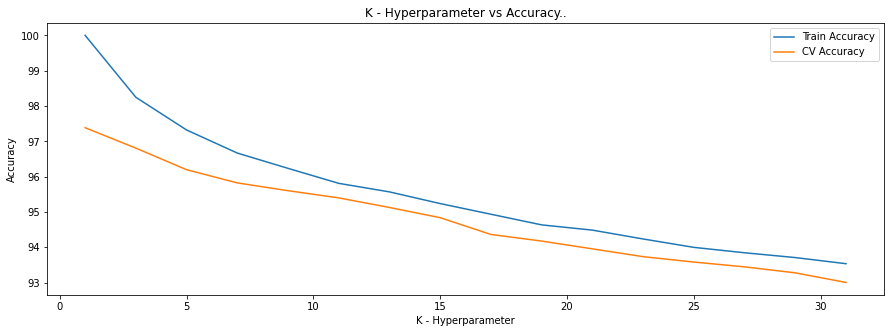

In [97]:
plt.subplots(figsize=(15, 5))
plt.plot(k_values_smote_standardized, auc_train_smote_standardized, label='Train Accuracy')
plt.plot(k_values_smote_standardized, auc_cv_smote_standardized, label='CV Accuracy')
plt.legend()
plt.xlabel('K - Hyperparameter')
plt.ylabel('Accuracy')
plt.title('K - Hyperparameter vs Accuracy..')
plt.show()

In [98]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less..
best_k_smote_standardized = 3
print("From the above graph, we take best 'k' to be {0}..".format(best_k_smote_standardized))

knn_smote_standardized = KNeighborsClassifier(n_neighbors=best_k_smote_standardized, algorithm='brute', weights='uniform', n_jobs=12)
knn_smote_standardized.fit(x_train_smote_standardized, y_train_smote_standardized)

y_train_pred_smote_standardized = knn_smote_standardized.predict_proba(x_train_smote_standardized)[:,1]
y_test_pred_smote_standardized = knn_smote_standardized.predict_proba(x_test_smote_standardized)[:,1]

From the above graph, we take best 'k' to be 3..


In [99]:
test_accuracy_score_smote = accuracy_score(y_test_smote_standardized, y_test_pred_smote_standardized.round(), normalize=True) * 100
print("Test Accuracy = ", test_accuracy_score_smote)

Test Accuracy =  96.88943221950557


Train -> True Positive Rate =  0.7922560923834593
Train -> False Positive Rate =  0.21867889285107828
Test -> True Positive Rate =  0.786960065199674
Test -> False Positive Rate =  0.23031784841075792

Train AUC =  0.9993012447178637
Test AUC =  0.9875549465411235


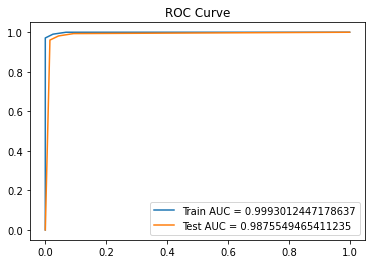

In [100]:
# Plotting ROC Curve..
train_fpr_smote_standardized, train_tpr_smote_standardized, _ = roc_curve(y_train_smote_standardized, y_train_pred_smote_standardized)
test_fpr_smote_standardized, test_tpr_smote_standardized, _ = roc_curve(y_test_smote_standardized, y_test_pred_smote_standardized)

print("Train -> True Positive Rate = ", train_tpr_smote_standardized.mean())
print("Train -> False Positive Rate = ", train_fpr_smote_standardized.mean())
print("Test -> True Positive Rate = ", test_tpr_smote_standardized.mean())
print("Test -> False Positive Rate = ", test_fpr_smote_standardized.mean())

train_auc_smote_standardized = auc(train_fpr_smote_standardized, train_tpr_smote_standardized)
test_auc_smote_standardized = auc(test_fpr_smote_standardized, test_tpr_smote_standardized)

print("\nTrain AUC = ", train_auc_smote_standardized)
print("Test AUC = ", test_auc_smote_standardized)

plt.plot(train_fpr_smote_standardized, train_tpr_smote_standardized, label="Train AUC = {0}".format(str(train_auc_smote_standardized)))
plt.plot(test_fpr_smote_standardized, test_tpr_smote_standardized, label="Test AUC = {0}".format(str(test_auc_smote_standardized)))
plt.legend()
plt.title("ROC Curve")
plt.show()

Train confusion matrix :


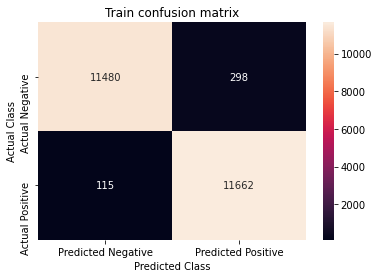

[[11480   298]
 [  115 11662]]


In [101]:
# Plotting & Printing Confusion Matirx..
print("Train confusion matrix :")
cm_train_smote_standardized = confusion_matrix(y_train_smote_standardized, knn_smote_standardized.predict(x_train_smote_standardized))
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_train_smote_standardized_df = pd.DataFrame(cm_train_smote_standardized, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_train_smote_standardized_df, annot=True, fmt="d")
plt.title("Train confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_train_smote_standardized)

Test confusion matrix :


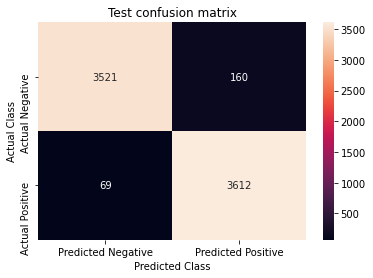

[[3521  160]
 [  69 3612]]


In [102]:
print("Test confusion matrix :")
cm_test_smote_standardized = confusion_matrix(y_test_smote_standardized, knn_smote_standardized.predict(x_test_smote_standardized))
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_df = pd.DataFrame(cm_test_smote_standardized, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_df, annot=True, fmt="d")
plt.title("Test confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized)

In [103]:
_, _, false_negative_smote_standardized, true_positive_smote_standardized = cm_test_smote_standardized.ravel()

# false_negative_smote_standardized = cm_test_smote_standardized[1][0]
# true_positive_smote_standardized = cm_test_smote_standardized[1][1]

# print(false_negative_smote_standardized)
# print(true_positive_smote_standardized)

print("False Negative Rate = ", (false_negative_smote_standardized/(false_negative_smote_standardized+true_positive_smote_standardized)) * 100, "%")

False Negative Rate =  1.8744906275468622 %


## 9.2 k-NN On SMOTE Normalized Data

In [104]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [105]:
x_smote_normalized = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [106]:
# splitting into train & test set..
x_train_smote_normalized, x_test_smote_normalized, y_train_smote_normalized, y_test_smote_normalized = train_test_split(x_smote_normalized, y_smote_normalized, test_size = 0.20, stratify=y_smote_normalized)

# splitting train set into train and cv sets..
x_train_smote_normalized, x_cv_smote_normalized, y_train_smote_normalized, y_cv_smote_normalized = train_test_split(x_train_smote_normalized, y_train_smote_normalized, test_size = 0.20, stratify=y_train_smote_normalized)

print("len(x_train_smote_normalized) = ", len(x_train_smote_normalized))
print("len(y_train_smote_normalized) = ", len(y_train_smote_normalized))

print("\nlen(x_cv_smote_normalized) = ", len(x_cv_smote_normalized))
print("len(y_cv_smote_normalized) = ", len(y_cv_smote_normalized))

print("\nlen(x_test_smote_normalized) = ", len(x_test_smote_normalized))
print("len(y_test_smote_normalized) = ", len(y_test_smote_normalized))

len(x_train_smote_normalized) =  23555
len(y_train_smote_normalized) =  23555

len(x_cv_smote_normalized) =  5889
len(y_cv_smote_normalized) =  5889

len(x_test_smote_normalized) =  7362
len(y_test_smote_normalized) =  7362


In [107]:
k_values_smote_normalized, auc_train_smote_normalized, auc_cv_smote_normalized = kNN_smote(x_train_smote_normalized, y_train_smote_normalized, x_cv_smote_normalized, y_cv_smote_normalized)

  0%|          | 0/16 [00:00<?, ?it/s]


Train_Accuracy for k=1 is 100.0..
CV_Accuracy for k=1 is 97.62268636440822..

Train_Accuracy for k=3 is 98.29335597537677..
CV_Accuracy for k=3 is 97.02835795551027..

Train_Accuracy for k=5 is 97.2405009552112..
CV_Accuracy for k=5 is 96.23025980641874..

Train_Accuracy for k=7 is 96.60369348333687..
CV_Accuracy for k=7 is 95.92460519612838..

Train_Accuracy for k=9 is 96.06877520696243..
CV_Accuracy for k=9 is 95.60196977415521..

Train_Accuracy for k=11 is 95.57206537890045..
CV_Accuracy for k=11 is 95.12650704703685..

Train_Accuracy for k=13 is 95.25366164296327..
CV_Accuracy for k=13 is 94.73594837833248..

Train_Accuracy for k=15 is 94.84610486096369..
CV_Accuracy for k=15 is 94.49821701477332..

Train_Accuracy for k=17 is 94.41732116323497..
CV_Accuracy for k=17 is 94.36237052131092..

Train_Accuracy for k=19 is 94.17957970706856..
CV_Accuracy for k=19 is 94.07369672270335..

Train_Accuracy for k=21 is 93.98429208236043..
CV_Accuracy for k=21 is 93.90388860587537..

Train_Accu

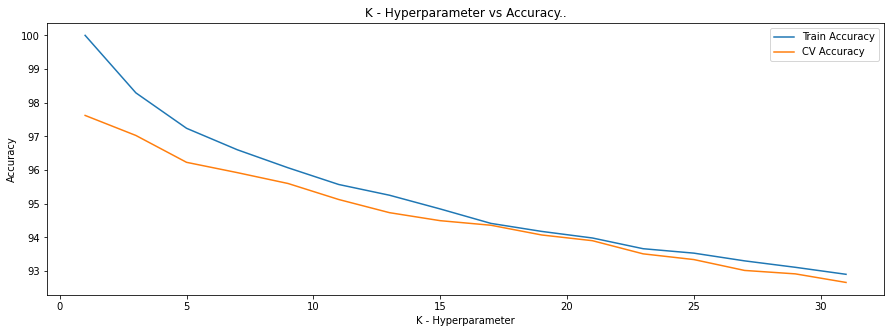

In [108]:
plt.subplots(figsize=(15, 5))
plt.plot(k_values_smote_normalized, auc_train_smote_normalized, label='Train Accuracy')
plt.plot(k_values_smote_normalized, auc_cv_smote_normalized, label='CV Accuracy')
plt.legend()
plt.xlabel('K - Hyperparameter')
plt.ylabel('Accuracy')
plt.title('K - Hyperparameter vs Accuracy..')
plt.show()

In [109]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less..
best_k_smote_normalized = 3
print("From the above graph, we take best 'k' to be {0}..".format(best_k_smote_normalized))

knn_smote_normalized = KNeighborsClassifier(n_neighbors=best_k_smote_normalized, algorithm='brute', weights='uniform', n_jobs=12)
knn_smote_normalized.fit(x_train_smote_normalized, y_train_smote_normalized)

y_train_pred_smote_normalized = knn_smote_normalized.predict_proba(x_train_smote_normalized)[:,1]
y_test_pred_smote_normalized = knn_smote_normalized.predict_proba(x_test_smote_normalized)[:,1]

From the above graph, we take best 'k' to be 3..


In [110]:
test_accuracy_score_smote_normalized = accuracy_score(y_test_smote_normalized, y_test_pred_smote_normalized.round(), normalize=True) * 100
print("Test Accuracy = ", test_accuracy_score_smote_normalized)

Test Accuracy =  96.78076609616953


Train -> True Positive Rate =  0.7923756155544235
Train -> False Positive Rate =  0.21874840791373015
Test -> True Positive Rate =  0.7867970660146699
Test -> False Positive Rate =  0.23140450964411846

Train AUC =  0.9993025856497535
Test AUC =  0.9847661888648811


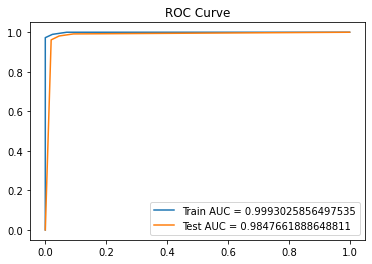

In [111]:
# Plotting ROC Curve..
train_fpr_smote_normalized, train_tpr_smote_normalized, _ = roc_curve(y_train_smote_normalized, y_train_pred_smote_normalized)
test_fpr_smote_normalized, test_tpr_smote_normalized, _ = roc_curve(y_test_smote_normalized, y_test_pred_smote_normalized)

print("Train -> True Positive Rate = ", train_tpr_smote_normalized.mean())
print("Train -> False Positive Rate = ", train_fpr_smote_normalized.mean())
print("Test -> True Positive Rate = ", test_tpr_smote_normalized.mean())
print("Test -> False Positive Rate = ", test_fpr_smote_normalized.mean())

train_auc_smote_normalized = auc(train_fpr_smote_normalized, train_tpr_smote_normalized)
test_auc_smote_normalized = auc(test_fpr_smote_normalized, test_tpr_smote_normalized)

print("\nTrain AUC = ", train_auc_smote_normalized)
print("Test AUC = ", test_auc_smote_normalized)

plt.plot(train_fpr_smote_normalized, train_tpr_smote_normalized, label="Train AUC = {0}".format(str(train_auc_smote_normalized)))
plt.plot(test_fpr_smote_normalized, test_tpr_smote_normalized, label="Test AUC = {0}".format(str(test_auc_smote_normalized)))
plt.legend()
plt.title("ROC Curve")
plt.show()

Train confusion matrix :


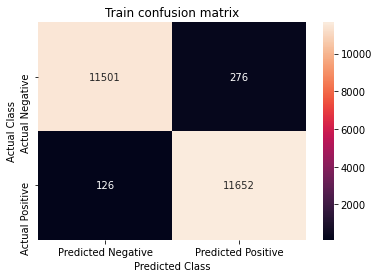

[[11501   276]
 [  126 11652]]


In [112]:
# Plotting & Printing Confusion Matirx..
print("Train confusion matrix :")
cm_train_smote_normalized = confusion_matrix(y_train_smote_normalized, knn_smote_normalized.predict(x_train_smote_normalized))
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_train_smote_normalized_df = pd.DataFrame(cm_train_smote_normalized, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_train_smote_normalized_df, annot=True, fmt="d")
plt.title("Train confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_train_smote_normalized)

Test confusion matrix :


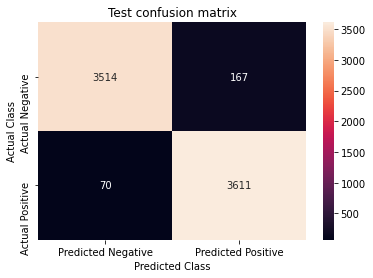

[[3514  167]
 [  70 3611]]


In [113]:
print("Test confusion matrix :")
cm_test_smote_normalized = confusion_matrix(y_test_smote_normalized, knn_smote_normalized.predict(x_test_smote_normalized))
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_df = pd.DataFrame(cm_test_smote_normalized, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_df, annot=True, fmt="d")
plt.title("Test confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized)

In [114]:
_, _, false_negative_smote_normalized, true_positive_smote_normalized = cm_test_smote_normalized.ravel()

# false_negative_smote_normalized = cm_test_smote_normalized[1][0]
# true_positive_smote_normalized = cm_test_smote_normalized[1][1]

# print(false_negative_smote_normalized)
# print(true_positive_smote_normalized)

print("False Negative Rate = ", (false_negative_smote_normalized/(false_negative_smote_normalized+true_positive_smote_normalized)) * 100, "%")

False Negative Rate =  1.9016571583808748 %


## 9.3 k-NN On NON-SMOTE Standardized Data

In [115]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [116]:
x_non_smote_standardized = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [117]:
# splitting into train & test set..
x_train_non_smote_standardized, x_test_non_smote_standardized, y_train_non_smote_standardized, y_test_non_smote_standardized = train_test_split(x_non_smote_standardized, y_non_smote_standardized, test_size = 0.20, stratify=y_non_smote_standardized)

# splitting train set into train and cv sets..
x_train_non_smote_standardized, x_cv_non_smote_standardized, y_train_non_smote_standardized, y_cv_non_smote_standardized = train_test_split(x_train_non_smote_standardized, y_train_non_smote_standardized, test_size = 0.20, stratify=y_train_non_smote_standardized)

print("len(x_train_non_smote_standardized) = ", len(x_train_non_smote_standardized))
print("len(y_train_non_smote_standardized) = ", len(y_train_non_smote_standardized))

print("\nlen(x_cv_non_smote_standardized) = ", len(x_cv_non_smote_standardized))
print("len(y_cv_non_smote_standardized) = ", len(y_cv_non_smote_standardized))

print("\nlen(x_test_non_smote_standardized) = ", len(x_test_non_smote_standardized))
print("len(y_test_non_smote_standardized) = ", len(y_test_non_smote_standardized))

len(x_train_non_smote_standardized) =  15594
len(y_train_non_smote_standardized) =  15594

len(x_cv_non_smote_standardized) =  3899
len(y_cv_non_smote_standardized) =  3899

len(x_test_non_smote_standardized) =  4874
len(y_test_non_smote_standardized) =  4874


In [118]:
def kNN_non_smote(x_train, y_train, x_cv, y_cv):
    
    k_values_non_smote = []
    auc_train_non_smote = []
    auc_cv_non_smote = []
    
    for k in tqdm_notebook(range(1, 32, 2)):
        
        # getting only odd 'k' values..double check..
        if k % 2 != 0 :
            k_values_non_smote.append(k)

            knn_non_smote = KNeighborsClassifier(n_neighbors=k, algorithm='brute', weights='uniform', n_jobs=12)
            knn_non_smote.fit(x_train, y_train)

            y_train_pred = knn_non_smote.predict_proba(x_train)[:, 1]
            y_cv_pred = knn_non_smote.predict_proba(x_cv)[:, 1]

            train_accuracy_score_non_smote = accuracy_score(y_train, y_train_pred.round(), normalize=True) * 100
            cv_accuracy_score_non_smote = accuracy_score(y_cv, y_cv_pred.round(), normalize=True) * 100
            
            auc_train_non_smote.append(train_accuracy_score_non_smote)
            auc_cv_non_smote.append(cv_accuracy_score_non_smote)

            print("\nTrain_Accuracy for k={0} is {1}..".format(k, train_accuracy_score_non_smote))
            print("CV_Accuracy for k={0} is {1}..".format(k, cv_accuracy_score_non_smote))
        
    return k_values_non_smote, auc_train_non_smote, auc_cv_non_smote

In [119]:
k_values_non_smote_standardized, auc_train_non_smote_standardized, auc_cv_non_smote_standardized = kNN_non_smote(x_train_non_smote_standardized, y_train_non_smote_standardized, x_cv_non_smote_standardized, y_cv_non_smote_standardized)

  0%|          | 0/16 [00:00<?, ?it/s]


Train_Accuracy for k=1 is 100.0..
CV_Accuracy for k=1 is 96.84534496024622..

Train_Accuracy for k=3 is 98.12748493010132..
CV_Accuracy for k=3 is 95.94767889202359..

Train_Accuracy for k=5 is 97.27459279209953..
CV_Accuracy for k=5 is 95.87073608617594..

Train_Accuracy for k=7 is 96.7166859048352..
CV_Accuracy for k=7 is 95.51166965888689..

Train_Accuracy for k=9 is 96.15236629472874..
CV_Accuracy for k=9 is 95.02436522185175..

Train_Accuracy for k=11 is 95.72912658714891..
CV_Accuracy for k=11 is 94.5114131828674..

Train_Accuracy for k=13 is 95.35718866230602..
CV_Accuracy for k=13 is 94.33187996922288..

Train_Accuracy for k=15 is 95.28023598820059..
CV_Accuracy for k=15 is 94.25493716337523..

Train_Accuracy for k=17 is 95.10067974862126..
CV_Accuracy for k=17 is 94.15234675557835..

Train_Accuracy for k=19 is 94.88905989483133..
CV_Accuracy for k=19 is 94.10105155167992..

Train_Accuracy for k=21 is 94.78004360651533..
CV_Accuracy for k=21 is 94.30623236727365..

Train_Accur

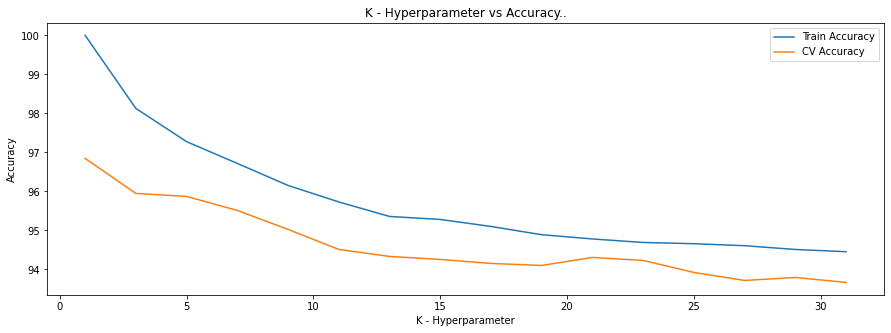

In [120]:
plt.subplots(figsize=(15, 5))
plt.plot(k_values_non_smote_standardized, auc_train_non_smote_standardized, label='Train Accuracy')
plt.plot(k_values_non_smote_standardized, auc_cv_non_smote_standardized, label='CV Accuracy')
plt.legend()
plt.xlabel('K - Hyperparameter')
plt.ylabel('Accuracy')
plt.title('K - Hyperparameter vs Accuracy..')
plt.show()

In [121]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less..
best_k_non_smote_standardized = 3
print("From the above graph, we take best 'k' to be {0}..".format(best_k_non_smote_standardized))

knn_non_smote_standardized = KNeighborsClassifier(n_neighbors=best_k_non_smote_standardized, algorithm='brute', weights='uniform', n_jobs=12)
knn_non_smote_standardized.fit(x_train_non_smote_standardized, y_train_non_smote_standardized)

y_train_pred_non_smote_standardized = knn_non_smote_standardized.predict_proba(x_train_non_smote_standardized)[:,1]
y_test_pred_non_smote_standardized = knn_non_smote_standardized.predict_proba(x_test_non_smote_standardized)[:,1]

From the above graph, we take best 'k' to be 3..


In [122]:
test_accuracy_score_non_smote = accuracy_score(y_test_non_smote_standardized, y_test_pred_non_smote_standardized.round(), normalize=True) * 100
print("Test Accuracy = ", test_accuracy_score_non_smote)

Test Accuracy =  96.57365613459172


Train -> True Positive Rate =  0.7818181818181819
Train -> False Positive Rate =  0.21361976734312643
Test -> True Positive Rate =  0.7673093042749372
Test -> False Positive Rate =  0.22189622385221405

Train AUC =  0.9988495713360204
Test AUC =  0.9817600541782148


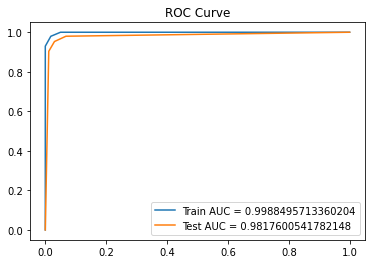

In [123]:
# Plotting ROC Curve..
train_fpr_non_smote_standardized, train_tpr_non_smote_standardized, _ = roc_curve(y_train_non_smote_standardized, y_train_pred_non_smote_standardized)
test_fpr_non_smote_standardized, test_tpr_non_smote_standardized, _ = roc_curve(y_test_non_smote_standardized, y_test_pred_non_smote_standardized)

print("Train -> True Positive Rate = ", train_tpr_non_smote_standardized.mean())
print("Train -> False Positive Rate = ", train_fpr_non_smote_standardized.mean())
print("Test -> True Positive Rate = ", test_tpr_non_smote_standardized.mean())
print("Test -> False Positive Rate = ", test_fpr_non_smote_standardized.mean())

train_auc_non_smote_standardized = auc(train_fpr_non_smote_standardized, train_tpr_non_smote_standardized)
test_auc_non_smote_standardized = auc(test_fpr_non_smote_standardized, test_tpr_non_smote_standardized)

print("\nTrain AUC = ", train_auc_non_smote_standardized)
print("Test AUC = ", test_auc_non_smote_standardized)

plt.plot(train_fpr_non_smote_standardized, train_tpr_non_smote_standardized, label="Train AUC = {0}".format(str(train_auc_non_smote_standardized)))
plt.plot(test_fpr_non_smote_standardized, test_tpr_non_smote_standardized, label="Test AUC = {0}".format(str(test_auc_non_smote_standardized)))
plt.legend()
plt.title("ROC Curve")
plt.show()

Train confusion matrix :


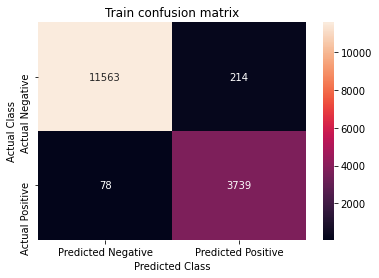

[[11563   214]
 [   78  3739]]


In [124]:
# Plotting & Printing Confusion Matirx..
print("Train confusion matrix :")
cm_train_non_smote_standardized = confusion_matrix(y_train_non_smote_standardized, knn_non_smote_standardized.predict(x_train_non_smote_standardized))
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_train_non_smote_standardized_df = pd.DataFrame(cm_train_non_smote_standardized, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_train_non_smote_standardized_df, annot=True, fmt="d")
plt.title("Train confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_train_non_smote_standardized)

Test confusion matrix :


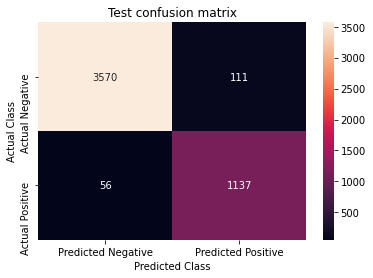

[[3570  111]
 [  56 1137]]


In [125]:
print("Test confusion matrix :")
cm_test_non_smote_standardized = confusion_matrix(y_test_non_smote_standardized, knn_non_smote_standardized.predict(x_test_non_smote_standardized))
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_df = pd.DataFrame(cm_test_non_smote_standardized, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_df, annot=True, fmt="d")
plt.title("Test confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized)

In [126]:
_, _, false_negative_non_smote_standardized, true_positive_non_smote_standardized = cm_test_non_smote_standardized.ravel()

# false_negative_non_smote_standardized = cm_test_non_smote_standardized[1][0]
# true_positive_non_smote_standardized = cm_test_non_smote_standardized[1][1]

# print(false_negative_non_smote_standardized)
# print(true_positive_non_smote_standardized)

print("False Negative Rate = ", (false_negative_non_smote_standardized/(false_negative_non_smote_standardized+true_positive_non_smote_standardized)) * 100, "%")

False Negative Rate =  4.694048616932104 %


## 9.4 k-NN On NON-SMOTE Normalized Data

In [127]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [128]:
x_non_smote_normalized = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [129]:
# splitting into train & test set..
x_train_non_smote_normalized, x_test_non_smote_normalized, y_train_non_smote_normalized, y_test_non_smote_normalized = train_test_split(x_non_smote_normalized, y_non_smote_normalized, test_size = 0.20, stratify=y_non_smote_normalized)

# splitting train set into train and cv sets..
x_train_non_smote_normalized, x_cv_non_smote_normalized, y_train_non_smote_normalized, y_cv_non_smote_normalized = train_test_split(x_train_non_smote_normalized, y_train_non_smote_normalized, test_size = 0.20, stratify=y_train_non_smote_normalized)

print("len(x_train_non_smote_normalized) = ", len(x_train_non_smote_normalized))
print("len(y_train_non_smote_normalized) = ", len(y_train_non_smote_normalized))

print("\nlen(x_cv_non_smote_normalized) = ", len(x_cv_non_smote_normalized))
print("len(y_cv_non_smote_normalized) = ", len(y_cv_non_smote_normalized))

print("\nlen(x_test_non_smote_normalized) = ", len(x_test_non_smote_normalized))
print("len(y_test_non_smote_normalized) = ", len(y_test_non_smote_normalized))

len(x_train_non_smote_normalized) =  15594
len(y_train_non_smote_normalized) =  15594

len(x_cv_non_smote_normalized) =  3899
len(y_cv_non_smote_normalized) =  3899

len(x_test_non_smote_normalized) =  4874
len(y_test_non_smote_normalized) =  4874


In [130]:
k_values_non_smote_normalized, auc_train_non_smote_normalized, auc_cv_non_smote_normalized = kNN_non_smote(x_train_non_smote_normalized, y_train_non_smote_normalized, x_cv_non_smote_normalized, y_cv_non_smote_normalized)

  0%|          | 0/16 [00:00<?, ?it/s]


Train_Accuracy for k=1 is 100.0..
CV_Accuracy for k=1 is 96.94793536804309..

Train_Accuracy for k=3 is 98.28780300115429..
CV_Accuracy for k=3 is 95.48602205693768..

Train_Accuracy for k=5 is 97.1976401179941..
CV_Accuracy for k=5 is 94.92177481405488..

Train_Accuracy for k=7 is 96.23573169167628..
CV_Accuracy for k=7 is 94.6396511926135..

Train_Accuracy for k=9 is 95.47903039630627..
CV_Accuracy for k=9 is 94.33187996922288..

Train_Accuracy for k=11 is 95.04937796588432..
CV_Accuracy for k=11 is 94.46011797896897..

Train_Accuracy for k=13 is 94.60048736693601..
CV_Accuracy for k=13 is 94.30623236727365..

Train_Accuracy for k=15 is 94.33115300756701..
CV_Accuracy for k=15 is 93.94716593998461..

Train_Accuracy for k=17 is 94.01051686546108..
CV_Accuracy for k=17 is 93.9215183380354..

Train_Accuracy for k=19 is 93.79889701167116..
CV_Accuracy for k=19 is 93.9215183380354..

Train_Accuracy for k=21 is 93.74118250609209..
CV_Accuracy for k=21 is 93.89587073608617..

Train_Accurac

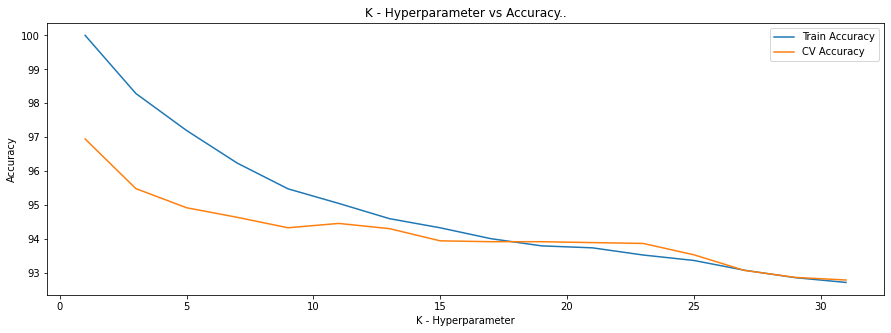

In [131]:
plt.subplots(figsize=(15, 5))
plt.plot(k_values_non_smote_normalized, auc_train_non_smote_normalized, label='Train Accuracy')
plt.plot(k_values_non_smote_normalized, auc_cv_non_smote_normalized, label='CV Accuracy')
plt.legend()
plt.xlabel('K - Hyperparameter')
plt.ylabel('Accuracy')
plt.title('K - Hyperparameter vs Accuracy..')
plt.show()

In [132]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less..
best_k_non_smote_normalized = 3
print("From the above graph, we take best 'k' to be {0}..".format(best_k_non_smote_normalized))

knn_non_smote_normalized = KNeighborsClassifier(n_neighbors=best_k_non_smote_normalized, algorithm='brute', weights='uniform', n_jobs=12)
knn_non_smote_normalized.fit(x_train_non_smote_normalized, y_train_non_smote_normalized)

y_train_pred_non_smote_normalized = knn_non_smote_normalized.predict_proba(x_train_non_smote_normalized)[:,1]
y_test_pred_non_smote_normalized = knn_non_smote_normalized.predict_proba(x_test_non_smote_normalized)[:,1]

From the above graph, we take best 'k' to be 3..


In [133]:
test_accuracy_score_non_smote = accuracy_score(y_test_non_smote_normalized, y_test_pred_non_smote_normalized.round(), normalize=True) * 100
print("Test Accuracy = ", test_accuracy_score_non_smote)

Test Accuracy =  96.01969634796882


Train -> True Positive Rate =  0.7819753733298402
Train -> False Positive Rate =  0.2124479918485183
Test -> True Positive Rate =  0.763788767812238
Test -> False Positive Rate =  0.22374354794892692

Train AUC =  0.9989547594233766
Test AUC =  0.9788796732182866


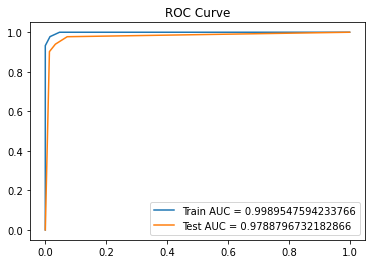

In [134]:
# Plotting ROC Curve..
train_fpr_non_smote_normalized, train_tpr_non_smote_normalized, _ = roc_curve(y_train_non_smote_normalized, y_train_pred_non_smote_normalized)
test_fpr_non_smote_normalized, test_tpr_non_smote_normalized, _ = roc_curve(y_test_non_smote_normalized, y_test_pred_non_smote_normalized)

print("Train -> True Positive Rate = ", train_tpr_non_smote_normalized.mean())
print("Train -> False Positive Rate = ", train_fpr_non_smote_normalized.mean())
print("Test -> True Positive Rate = ", test_tpr_non_smote_normalized.mean())
print("Test -> False Positive Rate = ", test_fpr_non_smote_normalized.mean())

train_auc_non_smote_normalized = auc(train_fpr_non_smote_normalized, train_tpr_non_smote_normalized)
test_auc_non_smote_normalized = auc(test_fpr_non_smote_normalized, test_tpr_non_smote_normalized)

print("\nTrain AUC = ", train_auc_non_smote_normalized)
print("Test AUC = ", test_auc_non_smote_normalized)

plt.plot(train_fpr_non_smote_normalized, train_tpr_non_smote_normalized, label="Train AUC = {0}".format(str(train_auc_non_smote_normalized)))
plt.plot(test_fpr_non_smote_normalized, test_tpr_non_smote_normalized, label="Test AUC = {0}".format(str(test_auc_non_smote_normalized)))
plt.legend()
plt.title("ROC Curve")
plt.show()

Train confusion matrix :


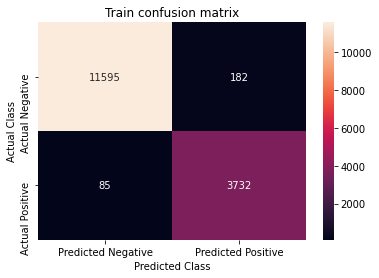

[[11595   182]
 [   85  3732]]


In [135]:
# Plotting & Printing Confusion Matirx..
print("Train confusion matrix :")
cm_train_non_smote_normalized = confusion_matrix(y_train_non_smote_normalized, knn_non_smote_normalized.predict(x_train_non_smote_normalized))
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_train_non_smote_normalized_df = pd.DataFrame(cm_train_non_smote_normalized, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_train_non_smote_normalized_df, annot=True, fmt="d")
plt.title("Train confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_train_non_smote_normalized)

Test confusion matrix :


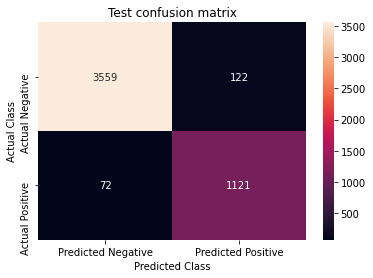

[[3559  122]
 [  72 1121]]


In [136]:
print("Test confusion matrix :")
cm_test_non_smote_normalized = confusion_matrix(y_test_non_smote_normalized, knn_non_smote_normalized.predict(x_test_non_smote_normalized))
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_df = pd.DataFrame(cm_test_non_smote_normalized, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_df, annot=True, fmt="d")
plt.title("Test confusion matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized)

In [137]:
_, _, false_negative_non_smote_normalized, true_positive_non_smote_normalized = cm_test_non_smote_normalized.ravel()

# false_negative_non_smote_normalized = cm_test_non_smote_normalized[1][0]
# true_positive_non_smote_normalized = cm_test_non_smote_normalized[1][1]

# print(false_negative_non_smote_normalized)
# print(true_positive_non_smote_normalized)

print("False Negative Rate = ", (false_negative_non_smote_normalized/(false_negative_non_smote_normalized+true_positive_non_smote_normalized)) * 100, "%")

False Negative Rate =  6.035205364626991 %


In [96]:
dill_dump_session('9.4_all_knn_models_completed')

# 10 ML Algorithms 2 - Naïve Bayes

## 10.1 Transforming data for Naïve Bayes

### 10.1.1 Transforming data for Naïve Bayes - SMOTE Standardized Data

In [188]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [189]:
transform_nb_smote_standardized = smote_standardized_df.copy()
transform_nb_smote_standardized.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1

In [153]:
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], 0))
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], .25))
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], .50))
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], .75))
print(np.quantile(transform_nb_smote_standardized['satisfaction_level'], 1))

-1.7362453570722547
-0.6419337983433854
0.023575874409228287
0.8847649876874012
1.6710680911152977


In [154]:
transform_nb_smote_standardized['satisfaction_level'].describe()

count    3.680600e+04
mean    -3.706575e-17
std      1.000014e+00
min     -1.736245e+00
25%     -6.419338e-01
50%      2.357587e-02
75%      8.847650e-01
max      1.671068e+00
Name: satisfaction_level, dtype: float64

In [155]:
transform_nb_smote_standardized['quantile_satisfaction_level'] = pd.qcut(transform_nb_smote_standardized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1])
# transform_nb_smote_standardized_cols = list(transform_nb_smote_standardized.columns)
# transform_nb_smote_standardized_cols = [transform_nb_smote_standardized_cols[-1]] + transform_nb_smote_standardized_cols[:-1]
# transform_nb_smote_standardized = transform_nb_smote_standardized[transform_nb_smote_standardized_cols]
transform_nb_smote_standardized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  \
0                     0            0           1              0          1   
1                     0            0           0              1          1   
2                     0            0           0              1          1   
3                     0            0           1              0          1   
4                     0            0           1              0          1   
5                     0            0           1              0          1   
6                     0            0           1              0          1   
7                     0            0           1              0          1   
8                     0            0           1              0          1   
9                     0            0           1              0          1   

     

In [156]:
transform_nb_smote_standardized['quantile_satisfaction_level'].describe()

count                36806
unique                   4
top       (-0.642, 0.0236]
freq                  9447
Name: quantile_satisfaction_level, dtype: object

In [190]:
transform_nb_smote_standardized['quantile_satisfaction_level'] = pd.qcut(transform_nb_smote_standardized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_standardized['quantile_last_evaluation_rating'] = pd.qcut(transform_nb_smote_standardized['last_evaluation_rating'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_standardized['quantile_projects_worked_on'] = pd.qcut(transform_nb_smote_standardized['projects_worked_on'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_standardized['quantile_average_montly_hours'] = pd.qcut(transform_nb_smote_standardized['average_montly_hours'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_standardized['quantile_time_spend_company'] = pd.qcut(transform_nb_smote_standardized['time_spend_company'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','mid','high'], duplicates='drop')
transform_nb_smote_standardized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  \
0                     0            0           1              0          1   
1                     0            0           0              1          1   
2                     0            0           0              1          1   
3                     0            0           1              0          1   
4                     0            0           1              0          1   
5                     0            0           1              0          1   
6                     0            0           1              0          1   
7                     0            0           1              0          1   
8                     0            0           1              0          1   
9                     0            0           1              0          1   

  qua

In [160]:
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], 0))
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], .25))
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], .50))
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], .75))
print(np.quantile(transform_nb_smote_standardized['time_spend_company'], 1))

-1.3731174353956161
-0.46342342705860395
-0.46342342705860395
0.44627058127840824
3.1753526062894446


In [191]:
transform_nb_smote_standardized.drop(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company'], axis='columns', inplace=True)
transform_nb_smote_standardized.head()

Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   

   salary_medium  Attrition quantile_satisfaction_level  \
0              0          1                         low   
1              1          1                        high   
2              1          1                         low   
3              0          1                         low   
4              0          1                     low_mid   

  quantile_last_evaluation_rating quantile_projects_worked_on  \
0                             low                         low   
1                        high_mid                        high   
2                        high_mid                        high   
3                             low                         low   
4                             low                         low   

  quantile_average_montly_hours quantile_time_spend_company  
0                       low_mid                         low  
1                          high                        high  
2                          high                         mid  
3                       low_mid                         low  
4                       low_mid                         low

In [187]:
transform_nb_smote_standardized_cols = list(transform_nb_smote_standardized.columns)
transform_nb_smote_standardized_cols

['quantile_satisfaction_level',
 'quantile_last_evaluation_rating',
 'quantile_projects_worked_on',
 'quantile_average_montly_hours',
 'quantile_time_spend_company',
 'Work_accident_False',
 'Work_accident_True',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_product_mng',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium',
 'Attrition']

In [182]:
transform_nb_smote_standardized_cols[-5:]

['quantile_satisfaction_level',
 'quantile_last_evaluation_rating',
 'quantile_projects_worked_on',
 'quantile_average_montly_hours',
 'quantile_time_spend_company']

In [183]:
transform_nb_smote_standardized_cols[:-5]

['Work_accident_False',
 'Work_accident_True',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_product_mng',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium',
 'Attrition']

In [192]:
transform_nb_smote_standardized_cols = list(transform_nb_smote_standardized.columns)
transform_nb_smote_standardized_cols = transform_nb_smote_standardized_cols[-5:] + transform_nb_smote_standardized_cols[:-5]
transform_nb_smote_standardized = transform_nb_smote_standardized[transform_nb_smote_standardized_cols]
transform_nb_smote_standardized.head()

quantile_satisfaction_level quantile_last_evaluation_rating  \
0                         low                             low   
1                        high                        high_mid   
2                         low                        high_mid   
3                         low                             low   
4                     low_mid                             low   

  quantile_projects_worked_on quantile_average_montly_hours  \
0                         low                       low_mid   
1                        high                          high   
2                        high                          high   
3                         low                       low_mid   
4                         low                       low_mid   

  quantile_time_spend_company  Work_accident_False  Work_accident_True  \
0                         low                    1                   0   
1                        high                    1                   0   
2                         mid                    1                   0   
3                         low                    1                   0   
4                         low                    1                   0   

   Department_IT  Department_RandD  Department_accounting  Department_hr  \
0              0                 0                      0              0   
1              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium  Attrition  
0            0           1              0          1  
1            0           0              1          1  
2            0           0              1          1  
3            0           1              0          1  
4            0           1              0          1

In [193]:
transform_nb_smote_standardized_dummy_df = pd.get_dummies(transform_nb_smote_standardized, columns=['quantile_satisfaction_level', 'quantile_last_evaluation_rating', 'quantile_projects_worked_on', 'quantile_average_montly_hours', 'quantile_time_spend_company'])

In [195]:
print(transform_nb_smote_standardized_dummy_df.shape)
transform_nb_smote_standardized_dummy_df.head()

(36806, 32)


Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   

   salary_medium  Attrition  quantile_satisfaction_level_low  \
0              0          1                                1   
1              1          1                                0   
2              1          1                                1   
3              0          1                                1   
4              0          1                                0   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    1                                     0   

   quantile_satisfaction_level_high  quantile_last_evaluation_rating_low  \
0                                 0                                    1   
1                                 1                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    1   

   quantile_last_evaluation_rating_low_mid  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   quantile_last_evaluation_rating_high_mid  \
0                                         0   
1                                         1   
2                                         1   
3                                         0   
4                                         0   

   quantile_last_evaluation_rating_high  quantile_projects_worked_on_low  \
0                                     0                                1   
1                                     0                                0   
2                                     0                                0   
3                                     0                                1   
4                                     0                                1   

   quantile_projects_worked_on_low_mid  quantile_projects_worked_on_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3             

In [197]:
transform_nb_smote_standardized_dummy_df.to_csv('../save/csv/10.1.1_transform_nb_smote_standardized_dummy_df.csv', index=False)

### 10.1.2 Transforming data for Naïve Bayes - SMOTE Normalized Data

In [210]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [211]:
transform_nb_smote_normalized = smote_normalized_df.copy()
transform_nb_smote_normalized.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1

In [212]:
transform_nb_smote_normalized['quantile_satisfaction_level'] = pd.qcut(transform_nb_smote_normalized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_normalized['quantile_last_evaluation_rating'] = pd.qcut(transform_nb_smote_normalized['last_evaluation_rating'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_normalized['quantile_projects_worked_on'] = pd.qcut(transform_nb_smote_normalized['projects_worked_on'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_normalized['quantile_average_montly_hours'] = pd.qcut(transform_nb_smote_normalized['average_montly_hours'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_smote_normalized['quantile_time_spend_company'] = pd.qcut(transform_nb_smote_normalized['time_spend_company'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','mid','high'], duplicates='drop')
transform_nb_smote_normalized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  \
0                     0            0           1              0          1   
1                     0            0           0              1          1   
2                     0            0           0              1          1   
3                     0            0           1              0          1   
4                     0            0           1              0          1   
5                     0            0           1              0          1   
6                     0            0           1              0          1   
7                     0            0           1              0          1   
8                     0            0           1              0          1   
9                     0            0           1              0          1   

  qua

In [213]:
transform_nb_smote_normalized.drop(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company'], axis='columns', inplace=True)
transform_nb_smote_normalized.head()

Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   

   salary_medium  Attrition quantile_satisfaction_level  \
0              0          1                         low   
1              1          1                        high   
2              1          1                         low   
3              0          1                         low   
4              0          1                     low_mid   

  quantile_last_evaluation_rating quantile_projects_worked_on  \
0                             low                         low   
1                        high_mid                        high   
2                        high_mid                        high   
3                             low                         low   
4                             low                         low   

  quantile_average_montly_hours quantile_time_spend_company  
0                       low_mid                         low  
1                          high                        high  
2                          high                         mid  
3                       low_mid                         low  
4                       low_mid                         low

In [214]:
transform_nb_smote_normalized_dummy_df = pd.get_dummies(transform_nb_smote_normalized, columns=['quantile_satisfaction_level', 'quantile_last_evaluation_rating', 'quantile_projects_worked_on', 'quantile_average_montly_hours', 'quantile_time_spend_company'])

In [215]:
print(transform_nb_smote_normalized_df.shape)
transform_nb_smote_normalized_df.head()

(36806, 32)


Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   

   salary_medium  Attrition  quantile_satisfaction_level_low  \
0              0          1                                1   
1              1          1                                0   
2              1          1                                1   
3              0          1                                1   
4              0          1                                0   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    1                                     0   

   quantile_satisfaction_level_high  quantile_last_evaluation_rating_low  \
0                                 0                                    1   
1                                 1                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    1   

   quantile_last_evaluation_rating_low_mid  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   quantile_last_evaluation_rating_high_mid  \
0                                         0   
1                                         1   
2                                         1   
3                                         0   
4                                         0   

   quantile_last_evaluation_rating_high  quantile_projects_worked_on_low  \
0                                     0                                1   
1                                     0                                0   
2                                     0                                0   
3                                     0                                1   
4                                     0                                1   

   quantile_projects_worked_on_low_mid  quantile_projects_worked_on_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3             

In [223]:
transform_nb_smote_normalized_dummy_df.to_csv('../save/csv/10.1.2_transform_nb_smote_normalized_dummy_df.csv', index=False)

### 10.1.3 Transforming data for Naïve Bayes - NON-SMOTE Standardized Data

In [217]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [218]:
transform_nb_non_smote_standardized = non_smote_standardized_df.copy()
transform_nb_non_smote_standardized.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0

In [219]:
transform_nb_non_smote_standardized['quantile_satisfaction_level'] = pd.qcut(transform_nb_non_smote_standardized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_standardized['quantile_last_evaluation_rating'] = pd.qcut(transform_nb_non_smote_standardized['last_evaluation_rating'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_standardized['quantile_projects_worked_on'] = pd.qcut(transform_nb_non_smote_standardized['projects_worked_on'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_standardized['quantile_average_montly_hours'] = pd.qcut(transform_nb_non_smote_standardized['average_montly_hours'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_standardized['quantile_time_spend_company'] = pd.qcut(transform_nb_non_smote_standardized['time_spend_company'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','mid','high'], duplicates='drop')
transform_nb_non_smote_standardized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  \
0                     0            0           1              0   
1                     0            0           0              1   
2                     0            0           0              1   
3                     0            0           1              0   
4                     0            0           1              0   
5                     0            0           1              0   
6                     0            0           1              0   
7                     0            0           1              0   
8                     0            0           1              0   
9                     0            0           1              0   

  qua

In [220]:
transform_nb_non_smote_standardized.drop(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company'], axis='columns', inplace=True)
transform_nb_non_smote_standardized.head()

Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium quantile_satisfaction_level  \
0            0           1              0                         low   
1            0           0              1                    high_mid   
2            0           0              1                         low   
3            0           1              0                         low   
4            0           1              0                         low   

  quantile_last_evaluation_rating quantile_projects_worked_on  \
0                             low                         low   
1                        high_mid                        high   
2                            high                        high   
3                             low                         low   
4                             low                         low   

  quantile_average_montly_hours quantile_time_spend_company  
0                       low_mid                         low  
1                          high                        high  
2                          high                         mid  
3                       low_mid                         low  
4                       low_mid                         low

In [221]:
transform_nb_non_smote_standardized_dummy_df = pd.get_dummies(transform_nb_non_smote_standardized, columns=['quantile_satisfaction_level', 'quantile_last_evaluation_rating', 'quantile_projects_worked_on', 'quantile_average_montly_hours', 'quantile_time_spend_company'])

In [222]:
print(transform_nb_non_smote_standardized_dummy_df.shape)
transform_nb_non_smote_standardized_dummy_df.head()

(24367, 32)


Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium  quantile_satisfaction_level_low  \
0            0           1              0                                1   
1            0           0              1                                0   
2            0           0              1                                1   
3            0           1              0                                1   
4            0           1              0                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     1   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   

   quantile_satisfaction_level_high  quantile_last_evaluation_rating_low  \
0                                 0                                    1   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    1   

   quantile_last_evaluation_rating_low_mid  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   quantile_last_evaluation_rating_high_mid  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   quantile_last_evaluation_rating_high  quantile_projects_worked_on_low  \
0                                     0                                1   
1                                     0                                0   
2                                     1                                0   
3                                     0                                1   
4                                     0                                1   

   quantile_projects_worked_on_low_mid  quantile_projects_worked_on_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3             

In [224]:
transform_nb_non_smote_standardized_dummy_df.to_csv('../save/csv/10.1.3_transform_nb_non_smote_standardized_dummy_df.csv', index=False)

### 10.1.4 Transforming data for Naïve Bayes - NON-SMOTE Normalized Data

In [225]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [226]:
transform_nb_non_smote_normalized = non_smote_normalized_df.copy()
transform_nb_non_smote_normalized.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0

In [227]:
transform_nb_non_smote_normalized['quantile_satisfaction_level'] = pd.qcut(transform_nb_non_smote_normalized['satisfaction_level'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_normalized['quantile_last_evaluation_rating'] = pd.qcut(transform_nb_non_smote_normalized['last_evaluation_rating'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_normalized['quantile_projects_worked_on'] = pd.qcut(transform_nb_non_smote_normalized['projects_worked_on'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_normalized['quantile_average_montly_hours'] = pd.qcut(transform_nb_non_smote_normalized['average_montly_hours'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','low_mid','high_mid','high'])
transform_nb_non_smote_normalized['quantile_time_spend_company'] = pd.qcut(transform_nb_non_smote_normalized['time_spend_company'], q=[0, 0.25, 0.50, 0.75, 1], labels=['low','mid','high'], duplicates='drop')
transform_nb_non_smote_normalized.head(10)

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  \
0                     0            0           1              0   
1                     0            0           0              1   
2                     0            0           0              1   
3                     0            0           1              0   
4                     0            0           1              0   
5                     0            0           1              0   
6                     0            0           1              0   
7                     0            0           1              0   
8                     0            0           1              0   
9                     0            0           1              0   

  qua

In [228]:
transform_nb_non_smote_normalized.drop(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company'], axis='columns', inplace=True)
transform_nb_non_smote_normalized.head()

Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium quantile_satisfaction_level  \
0            0           1              0                         low   
1            0           0              1                    high_mid   
2            0           0              1                         low   
3            0           1              0                         low   
4            0           1              0                         low   

  quantile_last_evaluation_rating quantile_projects_worked_on  \
0                             low                         low   
1                        high_mid                        high   
2                            high                        high   
3                             low                         low   
4                             low                         low   

  quantile_average_montly_hours quantile_time_spend_company  
0                       low_mid                         low  
1                          high                        high  
2                          high                         mid  
3                       low_mid                         low  
4                       low_mid                         low

In [229]:
transform_nb_non_smote_normalized_dummy_df = pd.get_dummies(transform_nb_non_smote_normalized, columns=['quantile_satisfaction_level', 'quantile_last_evaluation_rating', 'quantile_projects_worked_on', 'quantile_average_montly_hours', 'quantile_time_spend_company'])

In [230]:
print(transform_nb_non_smote_normalized_dummy_df.shape)
transform_nb_non_smote_normalized_dummy_df.head()

(24367, 32)


Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   

   salary_high  salary_low  salary_medium  quantile_satisfaction_level_low  \
0            0           1              0                                1   
1            0           0              1                                0   
2            0           0              1                                1   
3            0           1              0                                1   
4            0           1              0                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     1   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   

   quantile_satisfaction_level_high  quantile_last_evaluation_rating_low  \
0                                 0                                    1   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    1   
4                                 0                                    1   

   quantile_last_evaluation_rating_low_mid  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   quantile_last_evaluation_rating_high_mid  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   quantile_last_evaluation_rating_high  quantile_projects_worked_on_low  \
0                                     0                                1   
1                                     0                                0   
2                                     1                                0   
3                                     0                                1   
4                                     0                                1   

   quantile_projects_worked_on_low_mid  quantile_projects_worked_on_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3             

In [231]:
transform_nb_non_smote_normalized_dummy_df.to_csv('../save/csv/10.1.4_transform_nb_non_smote_normalized_dummy_df.csv', index=False)

## 10.2 Naïve Bayes On SMOTE Standardized Data

In [42]:
print(transform_nb_smote_standardized_dummy_df.shape)
transform_nb_smote_standardized_dummy_df.head(10)

(36806, 32)


Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   
5                    1                   0              0                 0   
6                    1                   0              0                 0   
7                    1                   0              0                 0   
8                    1                   0              0                 0   
9                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   
6                      0              0                      0   
7                      0              0                      0   
8                      0              0                      0   
9                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   
5                       0                     0            0           1   
6                       0                     0            0           1   
7                       0                     0            0           1   
8                       0                     0            0           1   
9                       0                     0            0           1   

   salary_medium  Attrition  quantile_satisfaction_level_low  \
0              0          1                                1   
1              1          1                                0   
2              1          1                                1   
3              0          1                                1   
4              0          1                                0   
5              0          1                                1   
6              0          1                                0   
7              0          1                                0   
8              0          1                                0   
9              0          1                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    1                                     0   
5                                    0                                     0   
6                                    0                                     0   
7                                    0                                     0   
8                                    1                                     0   
9                                    0                          

In [43]:
x_smote_standardized_nb = transform_nb_smote_standardized_dummy_df.loc[:, transform_nb_smote_standardized_dummy_df.columns != 'Attrition']
y_smote_standardized_nb = transform_nb_smote_standardized_dummy_df.loc[:, transform_nb_smote_standardized_dummy_df.columns == 'Attrition']

In [44]:
# splitting into train & test set..
x_train_smote_standardized_nb, x_test_smote_standardized_nb, y_train_smote_standardized_nb, y_test_smote_standardized_nb = train_test_split(x_smote_standardized_nb, y_smote_standardized_nb, test_size = 0.20, random_state=21, stratify=y_smote_standardized_nb)

# splitting train set into train and cv sets..
x_train_smote_standardized_nb, x_cv_smote_standardized_nb, y_train_smote_standardized_nb, y_cv_smote_standardized_nb = train_test_split(x_train_smote_standardized_nb, y_train_smote_standardized_nb, test_size = 0.20, random_state=21, stratify=y_train_smote_standardized_nb)

print("len(x_train_smote_standardized_nb) = ", len(x_train_smote_standardized_nb))
print("len(y_train_smote_standardized_nb) = ", len(y_train_smote_standardized_nb))

print("\nlen(x_cv_smote_standardized_nb) = ", len(x_cv_smote_standardized_nb))
print("len(y_cv_smote_standardized_nb) = ", len(y_cv_smote_standardized_nb))

print("\nlen(x_test_smote_standardized_nb) = ", len(x_test_smote_standardized_nb))
print("len(y_test_smote_standardized_nb) = ", len(y_test_smote_standardized_nb))

len(x_train_smote_standardized_nb) =  23555
len(y_train_smote_standardized_nb) =  23555

len(x_cv_smote_standardized_nb) =  5889
len(y_cv_smote_standardized_nb) =  5889

len(x_test_smote_standardized_nb) =  7362
len(y_test_smote_standardized_nb) =  7362


In [45]:
hyper_parameter_values_dict_nb = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [46]:
nb_smote_standardized = BernoulliNB()
gcv_nb_smote_standardized = GridSearchCV(nb_smote_standardized, hyper_parameter_values_dict_nb, cv=5, scoring="accuracy", n_jobs=12)
gcv_nb_smote_standardized.fit(x_train_smote_standardized_nb, y_train_smote_standardized_nb)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=12,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [47]:
gcv_nb_smote_standardized.best_estimator_

BernoulliNB(alpha=1)

In [48]:
gcv_nb_smote_standardized.best_params_

{'alpha': 1}

In [49]:
# gcv_nb_smote_standardized.best_estimator_.coef_

In [50]:
gcv_nb_smote_standardized.best_score_

0.8048821906177033

In [73]:
nb_smote_standardized = BernoulliNB(alpha=gcv_nb_smote_standardized.best_params_['alpha'])
nb_smote_standardized.fit(x_train_smote_standardized_nb, y_train_smote_standardized_nb)

BernoulliNB(alpha=1)

In [52]:
y_train_pred_smote_standardized_nb = nb_smote_standardized.predict_proba(x_train_smote_standardized_nb)[:,1]
y_test_pred_smote_standardized_nb = nb_smote_standardized.predict_proba(x_test_smote_standardized_nb)[:,1]


AUC_train =  0.8825185312101105
AUC_test =  0.8836738153536435


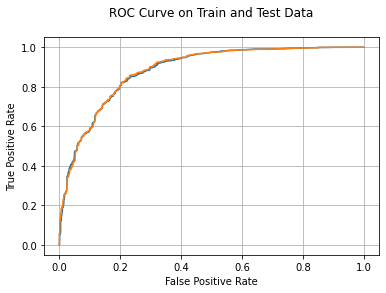

In [53]:
train_fpr_smote_standardized_nb, train_tpr_smote_standardized_nb, _ = roc_curve(y_train_smote_standardized_nb, y_train_pred_smote_standardized_nb)
test_fpr_smote_standardized_nb, test_tpr_smote_standardized_nb, _ = roc_curve(y_test_smote_standardized_nb, y_test_pred_smote_standardized_nb)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_nb, y_train_pred_smote_standardized_nb))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_nb, y_test_pred_smote_standardized_nb))

plt.plot(train_fpr_smote_standardized_nb, train_tpr_smote_standardized_nb, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_nb, test_tpr_smote_standardized_nb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


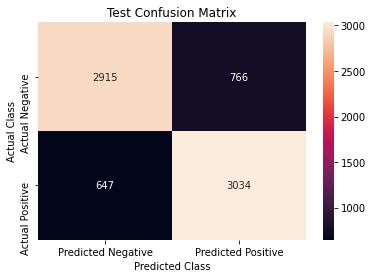

                 Predicted Negative  Predicted Positive
Actual Negative                2915                 766
Actual Positive                 647                3034


In [54]:
print("Test confusion matrix :")
cm_test_smote_standardized_nb = confusion_matrix(y_test_smote_standardized_nb, nb_smote_standardized.predict(x_test_smote_standardized_nb).round())
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_nb_df = pd.DataFrame(cm_test_smote_standardized_nb, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_nb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_nb_df)

In [55]:
_, _, false_negative_smote_standardized_nb, true_positive_smote_standardized_nb = cm_test_smote_standardized_nb.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_nb/(false_negative_smote_standardized_nb+true_positive_smote_standardized_nb)) * 100, "%")

False Negative Rate =  17.576745449606086 %


In [56]:
print(classification_report(y_test_smote_standardized_nb, nb_smote_standardized.predict(x_test_smote_standardized_nb)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3681
           1       0.80      0.82      0.81      3681

    accuracy                           0.81      7362
   macro avg       0.81      0.81      0.81      7362
weighted avg       0.81      0.81      0.81      7362



In [57]:
features_names_smote_standardized_nb = x_smote_standardized_nb.columns
features_names_smote_standardized_nb

Index(['Work_accident_False', 'Work_accident_True', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_product_mng',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium',
       'quantile_satisfaction_level_low',
       'quantile_satisfaction_level_low_mid',
       'quantile_satisfaction_level_high_mid',
       'quantile_satisfaction_level_high',
       'quantile_last_evaluation_rating_low',
       'quantile_last_evaluation_rating_low_mid',
       'quantile_last_evaluation_rating_high_mid',
       'quantile_last_evaluation_rating_high',
       'quantile_projects_worked_on_low',
       'quantile_projects_worked_on_low_mid',
       'quantile_projects_worked_on_high_mid',
       'quantile_projects_worked_on_high', 'quantile_average_montly_hours_low',
       'quantile_average_montly_hours_low_mid',
       'quantile_average_montly_hours_high_mid',
       'quantile_average_montly_hours_high'

In [63]:
nb_smote_standardized.feature_log_prob_

array([[-0.18626821, -1.7722565 , -2.43200175, -2.84036962, -3.02501947,
        -3.02327274, -3.23212105, -2.78523198, -1.70000554, -2.35844604,
        -0.77133818, -0.81390578, -2.15451642, -1.72732707, -0.94754664,
        -1.14331489, -1.73547863, -1.01502357, -1.31773169, -1.64135093,
        -1.29950938, -1.05322349, -1.35586232, -2.11223136, -1.70559735,
        -1.03203319, -1.19355751, -1.83832799, -0.31405975, -1.8853055 ,
        -2.13853932],
       [-0.0497797 , -3.46057056, -2.97714391, -4.05595357, -3.30102903,
        -3.23850867, -4.48372444, -3.32906825, -1.88578005, -4.11138338,
        -0.53523175, -1.01376813, -0.95559635, -1.08152505, -2.19324236,
        -1.80208511, -1.0698261 , -2.05686116, -1.48199514, -1.1971197 ,
        -0.78493187, -2.48958691, -1.85059225, -1.19095548, -1.1030367 ,
        -2.03194183, -1.56129075, -1.11668791, -0.7677712 , -1.33266065,
        -1.30098236]])

In [67]:
nb_class_0_prob_smote_standardized = nb_smote_standardized.feature_log_prob_[0, :]
nb_class_1_prob_smote_standardized = nb_smote_standardized.feature_log_prob_[1, :]

In [68]:
nb_class_0_prob_smote_standardized

array([-0.18626821, -1.7722565 , -2.43200175, -2.84036962, -3.02501947,
       -3.02327274, -3.23212105, -2.78523198, -1.70000554, -2.35844604,
       -0.77133818, -0.81390578, -2.15451642, -1.72732707, -0.94754664,
       -1.14331489, -1.73547863, -1.01502357, -1.31773169, -1.64135093,
       -1.29950938, -1.05322349, -1.35586232, -2.11223136, -1.70559735,
       -1.03203319, -1.19355751, -1.83832799, -0.31405975, -1.8853055 ,
       -2.13853932])

In [69]:
nb_class_1_prob_smote_standardized

array([-0.0497797 , -3.46057056, -2.97714391, -4.05595357, -3.30102903,
       -3.23850867, -4.48372444, -3.32906825, -1.88578005, -4.11138338,
       -0.53523175, -1.01376813, -0.95559635, -1.08152505, -2.19324236,
       -1.80208511, -1.0698261 , -2.05686116, -1.48199514, -1.1971197 ,
       -0.78493187, -2.48958691, -1.85059225, -1.19095548, -1.1030367 ,
       -2.03194183, -1.56129075, -1.11668791, -0.7677712 , -1.33266065,
       -1.30098236])

In [70]:
feature_names_weights_dict_class_0_smote_standardized_nb = dict(zip(features_names_smote_standardized_nb, nb_class_0_prob_smote_standardized))
feature_names_weights_dict_class_1_smote_standardized_nb = dict(zip(features_names_smote_standardized_nb, nb_class_1_prob_smote_standardized))

In [71]:
feature_names_weights_dict_class_0_smote_standardized_nb

{'Work_accident_False': -0.18626821406698646,
 'Work_accident_True': -1.772256497330412,
 'Department_IT': -2.4320017515061085,
 'Department_RandD': -2.8403696192722343,
 'Department_accounting': -3.02501946582578,
 'Department_hr': -3.023272740490838,
 'Department_management': -3.232121051618222,
 'Department_product_mng': -2.7852319796720586,
 'Department_technical': -1.7000055359239026,
 'salary_high': -2.358446036718348,
 'salary_low': -0.7713381798219032,
 'salary_medium': -0.8139057763288928,
 'quantile_satisfaction_level_low': -2.1545164170748423,
 'quantile_satisfaction_level_low_mid': -1.7273270657750954,
 'quantile_satisfaction_level_high_mid': -0.9475466440205782,
 'quantile_satisfaction_level_high': -1.143314893007343,
 'quantile_last_evaluation_rating_low': -1.7354786333294658,
 'quantile_last_evaluation_rating_low_mid': -1.0150235704476156,
 'quantile_last_evaluation_rating_high_mid': -1.317731689682594,
 'quantile_last_evaluation_rating_high': -1.6413509267835567,
 'quan

In [72]:
feature_names_weights_dict_class_1_smote_standardized_nb

{'Work_accident_False': -0.04977970190675585,
 'Work_accident_True': -3.460570558320515,
 'Department_IT': -2.9771439087426383,
 'Department_RandD': -4.055953570114569,
 'Department_accounting': -3.3010290298583795,
 'Department_hr': -3.238508672877046,
 'Department_management': -4.483724435737031,
 'Department_product_mng': -3.3290682499227726,
 'Department_technical': -1.885780048799357,
 'salary_high': -4.111383375053899,
 'salary_low': -0.5352317505274939,
 'salary_medium': -1.0137681280796915,
 'quantile_satisfaction_level_low': -0.9555963454817054,
 'quantile_satisfaction_level_low_mid': -1.081525049983025,
 'quantile_satisfaction_level_high_mid': -2.193242364914229,
 'quantile_satisfaction_level_high': -1.8020851145813443,
 'quantile_last_evaluation_rating_low': -1.069826098880311,
 'quantile_last_evaluation_rating_low_mid': -2.056861155598946,
 'quantile_last_evaluation_rating_high_mid': -1.481995142710666,
 'quantile_last_evaluation_rating_high': -1.1971196957330044,
 'quantil

## 10.3 Naïve Bayes On SMOTE Normalized Data

In [234]:
print(transform_nb_smote_normalized_dummy_df.shape)
transform_nb_smote_normalized_dummy_df.head(10)

(36806, 32)


Work_accident_False  Work_accident_True  Department_IT  Department_RandD  \
0                    1                   0              0                 0   
1                    1                   0              0                 0   
2                    1                   0              0                 0   
3                    1                   0              0                 0   
4                    1                   0              0                 0   
5                    1                   0              0                 0   
6                    1                   0              0                 0   
7                    1                   0              0                 0   
8                    1                   0              0                 0   
9                    1                   0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   
6                      0              0                      0   
7                      0              0                      0   
8                      0              0                      0   
9                      0              0                      0   

   Department_product_mng  Department_technical  salary_high  salary_low  \
0                       0                     0            0           1   
1                       0                     0            0           0   
2                       0                     0            0           0   
3                       0                     0            0           1   
4                       0                     0            0           1   
5                       0                     0            0           1   
6                       0                     0            0           1   
7                       0                     0            0           1   
8                       0                     0            0           1   
9                       0                     0            0           1   

   salary_medium  Attrition  quantile_satisfaction_level_low  \
0              0          1                                1   
1              1          1                                0   
2              1          1                                1   
3              0          1                                1   
4              0          1                                0   
5              0          1                                1   
6              0          1                                0   
7              0          1                                0   
8              0          1                                0   
9              0          1                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    1                                     0   
5                                    0                                     0   
6                                    0                                     0   
7                                    0                                     0   
8                                    1                                     0   
9                                    0                          

In [235]:
x_smote_normalized_nb = transform_nb_smote_normalized_dummy_df.loc[:, transform_nb_smote_normalized_dummy_df.columns != 'Attrition']
y_smote_normalized_nb = transform_nb_smote_normalized_dummy_df.loc[:, transform_nb_smote_normalized_dummy_df.columns == 'Attrition']

In [74]:
# splitting into train & test set..
x_train_smote_normalized_nb, x_test_smote_normalized_nb, y_train_smote_normalized_nb, y_test_smote_normalized_nb = train_test_split(x_smote_normalized_nb, y_smote_normalized_nb, test_size = 0.20, random_state=21, stratify=y_smote_normalized_nb)

# splitting train set into train and cv sets..
x_train_smote_normalized_nb, x_cv_smote_normalized_nb, y_train_smote_normalized_nb, y_cv_smote_normalized_nb = train_test_split(x_train_smote_normalized_nb, y_train_smote_normalized_nb, test_size = 0.20, random_state=21, stratify=y_train_smote_normalized_nb)

print("len(x_train_smote_normalized_nb) = ", len(x_train_smote_normalized_nb))
print("len(y_train_smote_normalized_nb) = ", len(y_train_smote_normalized_nb))

print("\nlen(x_cv_smote_normalized_nb) = ", len(x_cv_smote_normalized_nb))
print("len(y_cv_smote_normalized_nb) = ", len(y_cv_smote_normalized_nb))

print("\nlen(x_test_smote_normalized_nb) = ", len(x_test_smote_normalized_nb))
print("len(y_test_smote_normalized_nb) = ", len(y_test_smote_normalized_nb))

len(x_train_smote_normalized_nb) =  23555
len(y_train_smote_normalized_nb) =  23555

len(x_cv_smote_normalized_nb) =  5889
len(y_cv_smote_normalized_nb) =  5889

len(x_test_smote_normalized_nb) =  7362
len(y_test_smote_normalized_nb) =  7362


In [75]:
hyper_parameter_values_dict_nb = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [76]:
nb_smote_normalized = BernoulliNB()
gcv_nb_smote_normalized = GridSearchCV(nb_smote_normalized, hyper_parameter_values_dict_nb, cv=5, scoring="accuracy", n_jobs=12)
gcv_nb_smote_normalized.fit(x_train_smote_normalized_nb, y_train_smote_normalized_nb)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=12,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [77]:
gcv_nb_smote_normalized.best_estimator_

BernoulliNB(alpha=1)

In [78]:
gcv_nb_smote_normalized.best_params_

{'alpha': 1}

In [79]:
gcv_nb_smote_normalized.best_score_

0.8048821906177033

In [80]:
nb_smote_normalized = BernoulliNB(alpha=gcv_nb_smote_normalized.best_params_['alpha'])
nb_smote_normalized.fit(x_train_smote_normalized_nb, y_train_smote_normalized_nb)

BernoulliNB(alpha=1)

In [81]:
y_train_pred_smote_normalized_nb = nb_smote_normalized.predict_proba(x_train_smote_normalized_nb)[:,1]
y_test_pred_smote_normalized_nb = nb_smote_normalized.predict_proba(x_test_smote_normalized_nb)[:,1]

In [82]:
train_fpr_smote_normalized_nb, train_tpr_smote_normalized_nb, _ = roc_curve(y_train_smote_normalized_nb, y_train_pred_smote_normalized_nb)
test_fpr_smote_normalized_nb, test_tpr_smote_normalized_nb, _ = roc_curve(y_test_smote_normalized_nb, y_test_pred_smote_normalized_nb)


AUC_train =  0.8825185312101105
AUC_test =  0.8836738153536435


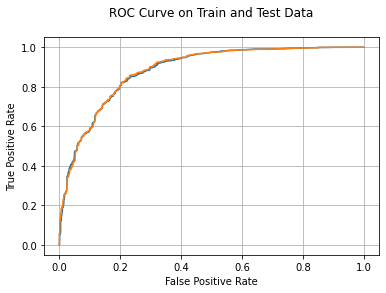

In [83]:
print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_nb, y_train_pred_smote_normalized_nb))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_nb, y_test_pred_smote_normalized_nb))

plt.plot(train_fpr_smote_normalized_nb, train_tpr_smote_normalized_nb, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_nb, test_tpr_smote_normalized_nb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


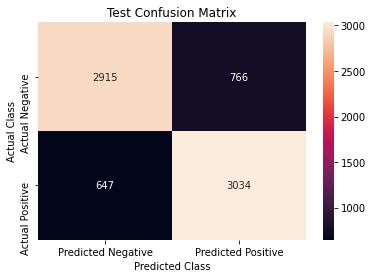

                 Predicted Negative  Predicted Positive
Actual Negative                2915                 766
Actual Positive                 647                3034


In [84]:
print("Test confusion matrix :")
cm_test_smote_normalized_nb = confusion_matrix(y_test_smote_normalized_nb, nb_smote_normalized.predict(x_test_smote_normalized_nb).round())
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_nb_df = pd.DataFrame(cm_test_smote_normalized_nb, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_nb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_nb_df)

In [85]:
_, _, false_negative_smote_normalized_nb, true_positive_smote_normalized_nb = cm_test_smote_normalized_nb.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_nb/(false_negative_smote_normalized_nb+true_positive_smote_normalized_nb)) * 100, "%")

False Negative Rate =  17.576745449606086 %


In [86]:
print(classification_report(y_test_smote_normalized_nb, nb_smote_normalized.predict(x_test_smote_normalized_nb)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3681
           1       0.80      0.82      0.81      3681

    accuracy                           0.81      7362
   macro avg       0.81      0.81      0.81      7362
weighted avg       0.81      0.81      0.81      7362



In [87]:
features_names_smote_normalized_nb = x_smote_normalized_nb.columns
features_names_smote_normalized_nb

Index(['Work_accident_False', 'Work_accident_True', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_product_mng',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium',
       'quantile_satisfaction_level_low',
       'quantile_satisfaction_level_low_mid',
       'quantile_satisfaction_level_high_mid',
       'quantile_satisfaction_level_high',
       'quantile_last_evaluation_rating_low',
       'quantile_last_evaluation_rating_low_mid',
       'quantile_last_evaluation_rating_high_mid',
       'quantile_last_evaluation_rating_high',
       'quantile_projects_worked_on_low',
       'quantile_projects_worked_on_low_mid',
       'quantile_projects_worked_on_high_mid',
       'quantile_projects_worked_on_high', 'quantile_average_montly_hours_low',
       'quantile_average_montly_hours_low_mid',
       'quantile_average_montly_hours_high_mid',
       'quantile_average_montly_hours_high'

In [88]:
nb_class_0_prob_smote_normalized = nb_smote_normalized.feature_log_prob_[0, :]
nb_class_1_prob_smote_normalized = nb_smote_normalized.feature_log_prob_[1, :]

In [89]:
feature_names_weights_dict_class_0_smote_normalized_nb = dict(zip(features_names_smote_normalized_nb, nb_class_0_prob_smote_normalized))
feature_names_weights_dict_class_1_smote_normalized_nb = dict(zip(features_names_smote_normalized_nb, nb_class_1_prob_smote_normalized))

In [91]:
feature_names_weights_dict_class_0_smote_normalized_nb

{'Work_accident_False': -0.18626821406698646,
 'Work_accident_True': -1.772256497330412,
 'Department_IT': -2.4320017515061085,
 'Department_RandD': -2.8403696192722343,
 'Department_accounting': -3.02501946582578,
 'Department_hr': -3.023272740490838,
 'Department_management': -3.232121051618222,
 'Department_product_mng': -2.7852319796720586,
 'Department_technical': -1.7000055359239026,
 'salary_high': -2.358446036718348,
 'salary_low': -0.7713381798219032,
 'salary_medium': -0.8139057763288928,
 'quantile_satisfaction_level_low': -2.1545164170748423,
 'quantile_satisfaction_level_low_mid': -1.7273270657750954,
 'quantile_satisfaction_level_high_mid': -0.9475466440205782,
 'quantile_satisfaction_level_high': -1.143314893007343,
 'quantile_last_evaluation_rating_low': -1.7354786333294658,
 'quantile_last_evaluation_rating_low_mid': -1.0150235704476156,
 'quantile_last_evaluation_rating_high_mid': -1.317731689682594,
 'quantile_last_evaluation_rating_high': -1.6413509267835567,
 'quan

In [92]:
feature_names_weights_dict_class_1_smote_normalized_nb

{'Work_accident_False': -0.04977970190675585,
 'Work_accident_True': -3.460570558320515,
 'Department_IT': -2.9771439087426383,
 'Department_RandD': -4.055953570114569,
 'Department_accounting': -3.3010290298583795,
 'Department_hr': -3.238508672877046,
 'Department_management': -4.483724435737031,
 'Department_product_mng': -3.3290682499227726,
 'Department_technical': -1.885780048799357,
 'salary_high': -4.111383375053899,
 'salary_low': -0.5352317505274939,
 'salary_medium': -1.0137681280796915,
 'quantile_satisfaction_level_low': -0.9555963454817054,
 'quantile_satisfaction_level_low_mid': -1.081525049983025,
 'quantile_satisfaction_level_high_mid': -2.193242364914229,
 'quantile_satisfaction_level_high': -1.8020851145813443,
 'quantile_last_evaluation_rating_low': -1.069826098880311,
 'quantile_last_evaluation_rating_low_mid': -2.056861155598946,
 'quantile_last_evaluation_rating_high_mid': -1.481995142710666,
 'quantile_last_evaluation_rating_high': -1.1971196957330044,
 'quantil

## 10.4 Naïve Bayes On NON-SMOTE Standardized Data

In [238]:
print(transform_nb_non_smote_standardized_dummy_df.shape)
transform_nb_non_smote_standardized_dummy_df.head(10)

(24367, 32)


Attrition  Work_accident_False  Work_accident_True  Department_IT  \
0          1                    1                   0              0   
1          1                    1                   0              0   
2          1                    1                   0              0   
3          1                    1                   0              0   
4          1                    1                   0              0   
5          1                    1                   0              0   
6          1                    1                   0              0   
7          1                    1                   0              0   
8          1                    1                   0              0   
9          1                    1                   0              0   

   Department_RandD  Department_accounting  Department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   
6                 0                      0              0   
7                 0                      0              0   
8                 0                      0              0   
9                 0                      0              0   

   Department_management  Department_product_mng  Department_technical  \
0                      0                       0                     0   
1                      0                       0                     0   
2                      0                       0                     0   
3                      0                       0                     0   
4                      0                       0                     0   
5                      0                       0                     0   
6                      0                       0                     0   
7                      0                       0                     0   
8                      0                       0                     0   
9                      0                       0                     0   

   salary_high  salary_low  salary_medium  quantile_satisfaction_level_low  \
0            0           1              0                                1   
1            0           0              1                                0   
2            0           0              1                                1   
3            0           1              0                                1   
4            0           1              0                                1   
5            0           1              0                                1   
6            0           1              0                                0   
7            0           1              0                                0   
8            0           1              0                                1   
9            0           1              0                                1   

   quantile_satisfaction_level_low_mid  quantile_satisfaction_level_high_mid  \
0                                    0                                     0   
1                                    0                                     1   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   
5                                    0                                     0   
6                                    0                                     0   
7                                    0                                     0   
8                                    0                                     0   
9                                    0                          

In [236]:
x_non_smote_standardized_nb = transform_nb_non_smote_standardized_dummy_df.loc[:, transform_nb_non_smote_standardized_dummy_df.columns != 'Attrition']
y_non_smote_standardized_nb = transform_nb_non_smote_standardized_dummy_df.loc[:, transform_nb_non_smote_standardized_dummy_df.columns == 'Attrition']

In [93]:
# splitting into train & test set..
x_train_non_smote_standardized_nb, x_test_non_smote_standardized_nb, y_train_non_smote_standardized_nb, y_test_non_smote_standardized_nb = train_test_split(x_non_smote_standardized_nb, y_non_smote_standardized_nb, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_nb)

# splitting train set into train and cv sets..
x_train_non_smote_standardized_nb, x_cv_non_smote_standardized_nb, y_train_non_smote_standardized_nb, y_cv_non_smote_standardized_nb = train_test_split(x_train_non_smote_standardized_nb, y_train_non_smote_standardized_nb, test_size = 0.20, random_state=21, stratify=y_train_non_smote_standardized_nb)

print("len(x_train_non_smote_standardized_nb) = ", len(x_train_non_smote_standardized_nb))
print("len(y_train_non_smote_standardized_nb) = ", len(y_train_non_smote_standardized_nb))

print("\nlen(x_cv_non_smote_standardized_nb) = ", len(x_cv_non_smote_standardized_nb))
print("len(y_cv_non_smote_standardized_nb) = ", len(y_cv_non_smote_standardized_nb))

print("\nlen(x_test_non_smote_standardized_nb) = ", len(x_test_non_smote_standardized_nb))
print("len(y_test_non_smote_standardized_nb) = ", len(y_test_non_smote_standardized_nb))

len(x_train_non_smote_standardized_nb) =  15594
len(y_train_non_smote_standardized_nb) =  15594

len(x_cv_non_smote_standardized_nb) =  3899
len(y_cv_non_smote_standardized_nb) =  3899

len(x_test_non_smote_standardized_nb) =  4874
len(y_test_non_smote_standardized_nb) =  4874


In [94]:
hyper_parameter_values_dict_nb = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [95]:
nb_non_smote_standardized = BernoulliNB()
gcv_nb_non_smote_standardized = GridSearchCV(nb_non_smote_standardized, hyper_parameter_values_dict_nb, cv=5, scoring="accuracy", n_jobs=12)
gcv_nb_non_smote_standardized.fit(x_train_non_smote_standardized_nb, y_train_non_smote_standardized_nb)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=12,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [96]:
gcv_nb_non_smote_standardized.best_estimator_

BernoulliNB(alpha=10)

In [97]:
gcv_nb_non_smote_standardized.best_params_

{'alpha': 10}

In [98]:
gcv_nb_non_smote_standardized.best_score_

0.838784058721803

In [99]:
nb_non_smote_standardized = BernoulliNB(alpha=gcv_nb_non_smote_standardized.best_params_['alpha'])
nb_non_smote_standardized.fit(x_train_non_smote_standardized_nb, y_train_non_smote_standardized_nb)

BernoulliNB(alpha=10)

In [100]:
y_train_pred_non_smote_standardized_nb = nb_non_smote_standardized.predict_proba(x_train_non_smote_standardized_nb)[:,1]
y_test_pred_non_smote_standardized_nb = nb_non_smote_standardized.predict_proba(x_test_non_smote_standardized_nb)[:,1]

In [101]:
train_fpr_non_smote_standardized_nb, train_tpr_non_smote_standardized_nb, _ = roc_curve(y_train_non_smote_standardized_nb, y_train_pred_non_smote_standardized_nb)
test_fpr_non_smote_standardized_nb, test_tpr_non_smote_standardized_nb, _ = roc_curve(y_test_non_smote_standardized_nb, y_test_pred_non_smote_standardized_nb)


AUC_train =  0.9001027499749794
AUC_test =  0.9024997079541006


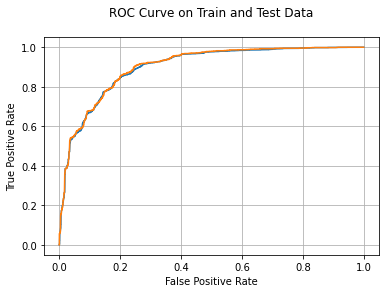

In [102]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_nb, y_train_pred_non_smote_standardized_nb))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_nb, y_test_pred_non_smote_standardized_nb))

plt.plot(train_fpr_non_smote_standardized_nb, train_tpr_non_smote_standardized_nb, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_nb, test_tpr_non_smote_standardized_nb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


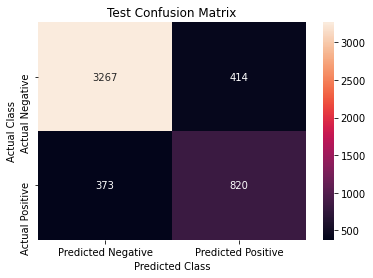

                 Predicted Negative  Predicted Positive
Actual Negative                3267                 414
Actual Positive                 373                 820


In [103]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_nb = confusion_matrix(y_test_non_smote_standardized_nb, nb_non_smote_standardized.predict(x_test_non_smote_standardized_nb).round())
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_nb_df = pd.DataFrame(cm_test_non_smote_standardized_nb, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_nb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_nb_df)

In [104]:
_, _, false_negative_non_smote_standardized_nb, true_positive_non_smote_standardized_nb = cm_test_non_smote_standardized_nb.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_nb/(false_negative_non_smote_standardized_nb+true_positive_non_smote_standardized_nb)) * 100, "%")

False Negative Rate =  31.265716680637052 %


In [105]:
print(classification_report(y_test_non_smote_standardized_nb, nb_non_smote_standardized.predict(x_test_non_smote_standardized_nb)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3681
           1       0.66      0.69      0.68      1193

    accuracy                           0.84      4874
   macro avg       0.78      0.79      0.78      4874
weighted avg       0.84      0.84      0.84      4874



In [106]:
features_names_non_smote_standardized_nb = x_non_smote_standardized_nb.columns
features_names_non_smote_standardized_nb

Index(['Work_accident_False', 'Work_accident_True', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_product_mng',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium',
       'quantile_satisfaction_level_low',
       'quantile_satisfaction_level_low_mid',
       'quantile_satisfaction_level_high_mid',
       'quantile_satisfaction_level_high',
       'quantile_last_evaluation_rating_low',
       'quantile_last_evaluation_rating_low_mid',
       'quantile_last_evaluation_rating_high_mid',
       'quantile_last_evaluation_rating_high',
       'quantile_projects_worked_on_low',
       'quantile_projects_worked_on_low_mid',
       'quantile_projects_worked_on_high_mid',
       'quantile_projects_worked_on_high', 'quantile_average_montly_hours_low',
       'quantile_average_montly_hours_low_mid',
       'quantile_average_montly_hours_high_mid',
       'quantile_average_montly_hours_high'

In [107]:
nb_class_0_prob_non_smote_standardized = nb_non_smote_standardized.feature_log_prob_[0, :]
nb_class_1_prob_non_smote_standardized = nb_non_smote_standardized.feature_log_prob_[1, :]

In [108]:
feature_names_weights_dict_class_0_non_smote_standardized_nb = dict(zip(features_names_non_smote_standardized_nb, nb_class_0_prob_non_smote_standardized))
feature_names_weights_dict_class_1_non_smote_standardized_nb = dict(zip(features_names_non_smote_standardized_nb, nb_class_1_prob_non_smote_standardized))

In [109]:
feature_names_weights_dict_class_0_non_smote_standardized_nb

{'Work_accident_False': -0.1854628761831787,
 'Work_accident_True': -1.7761992074260275,
 'Department_IT': -2.4286245487064244,
 'Department_RandD': -2.8245202057984384,
 'Department_accounting': -3.0056995580136157,
 'Department_hr': -3.0022807512648306,
 'Department_management': -3.261918361009611,
 'Department_product_mng': -2.7595353557090254,
 'Department_technical': -1.703308085213087,
 'salary_high': -2.3509515103882066,
 'salary_low': -0.7623701612286631,
 'salary_medium': -0.8232332744179516,
 'quantile_satisfaction_level_low': -1.9768142654218943,
 'quantile_satisfaction_level_low_mid': -1.236451861957777,
 'quantile_satisfaction_level_high_mid': -1.215082293364338,
 'quantile_satisfaction_level_high': -1.2870387355656092,
 'quantile_last_evaluation_rating_low': -1.5154154833696776,
 'quantile_last_evaluation_rating_low_mid': -1.1994901986045008,
 'quantile_last_evaluation_rating_high_mid': -1.3031331714870724,
 'quantile_last_evaluation_rating_high': -1.5656534543650524,
 'q

In [110]:
feature_names_weights_dict_class_1_non_smote_standardized_nb

{'Work_accident_False': -0.049963643670414726,
 'Work_accident_True': -3.0213374733923652,
 'Department_IT': -2.4872549874621077,
 'Department_RandD': -3.262013503468216,
 'Department_accounting': -2.759384646906404,
 'Department_hr': -2.7886142852213416,
 'Department_management': -3.7091513079769483,
 'Department_product_mng': -2.8679510274578632,
 'Department_technical': -1.6217627046045804,
 'salary_high': -3.6777351117435693,
 'salary_low': -0.4971072774004508,
 'salary_medium': -0.9968548159932871,
 'quantile_satisfaction_level_low': -0.44534280012097227,
 'quantile_satisfaction_level_low_mid': -2.403121310300093,
 'quantile_satisfaction_level_high_mid': -1.9280871278656413,
 'quantile_satisfaction_level_high': -2.0499105730590292,
 'quantile_last_evaluation_rating_low': -0.8980837598254752,
 'quantile_last_evaluation_rating_low_mid': -2.805708718580642,
 'quantile_last_evaluation_rating_high_mid': -1.5060339616735776,
 'quantile_last_evaluation_rating_high': -1.1532443466938602,


## 10.5 Naïve Bayes On NON-SMOTE Normalized Data

In [ ]:
print(transform_nb_non_smote_normalized_dummy_df.shape)
transform_nb_non_smote_normalized_dummy_df.head(10)

In [239]:
x_non_smote_normalized_nb = transform_nb_non_smote_normalized_dummy_df.loc[:, transform_nb_non_smote_normalized_dummy_df.columns != 'Attrition']
y_non_smote_normalized_nb = transform_nb_non_smote_normalized_dummy_df.loc[:, transform_nb_non_smote_normalized_dummy_df.columns == 'Attrition']

In [111]:
# splitting into train & test set..
x_train_non_smote_normalized_nb, x_test_non_smote_normalized_nb, y_train_non_smote_normalized_nb, y_test_non_smote_normalized_nb = train_test_split(x_non_smote_normalized_nb, y_non_smote_normalized_nb, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_nb)

# splitting train set into train and cv sets..
x_train_non_smote_normalized_nb, x_cv_non_smote_normalized_nb, y_train_non_smote_normalized_nb, y_cv_non_smote_normalized_nb = train_test_split(x_train_non_smote_normalized_nb, y_train_non_smote_normalized_nb, test_size = 0.20, random_state=21, stratify=y_train_non_smote_normalized_nb)

print("len(x_train_non_smote_normalized_nb) = ", len(x_train_non_smote_normalized_nb))
print("len(y_train_non_smote_normalized_nb) = ", len(y_train_non_smote_normalized_nb))

print("\nlen(x_cv_non_smote_normalized_nb) = ", len(x_cv_non_smote_normalized_nb))
print("len(y_cv_non_smote_normalized_nb) = ", len(y_cv_non_smote_normalized_nb))

print("\nlen(x_test_non_smote_normalized_nb) = ", len(x_test_non_smote_normalized_nb))
print("len(y_test_non_smote_normalized_nb) = ", len(y_test_non_smote_normalized_nb))

len(x_train_non_smote_normalized_nb) =  15594
len(y_train_non_smote_normalized_nb) =  15594

len(x_cv_non_smote_normalized_nb) =  3899
len(y_cv_non_smote_normalized_nb) =  3899

len(x_test_non_smote_normalized_nb) =  4874
len(y_test_non_smote_normalized_nb) =  4874


In [112]:
hyper_parameter_values_dict_nb = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [113]:
nb_non_smote_normalized = BernoulliNB()
gcv_nb_non_smote_normalized = GridSearchCV(nb_non_smote_normalized, hyper_parameter_values_dict_nb, cv=5, scoring="accuracy", n_jobs=12)
gcv_nb_non_smote_normalized.fit(x_train_non_smote_normalized_nb, y_train_non_smote_normalized_nb)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=12,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [114]:
gcv_nb_non_smote_normalized.best_estimator_

BernoulliNB(alpha=10)

In [115]:
gcv_nb_non_smote_normalized.best_params_

{'alpha': 10}

In [116]:
gcv_nb_non_smote_normalized.best_score_

0.838784058721803

In [117]:
nb_non_smote_normalized = BernoulliNB(alpha=gcv_nb_non_smote_normalized.best_params_['alpha'])
nb_non_smote_normalized.fit(x_train_non_smote_normalized_nb, y_train_non_smote_normalized_nb)

BernoulliNB(alpha=10)

In [118]:
y_train_pred_non_smote_normalized_nb = nb_non_smote_normalized.predict_proba(x_train_non_smote_normalized_nb)[:,1]
y_test_pred_non_smote_normalized_nb = nb_non_smote_normalized.predict_proba(x_test_non_smote_normalized_nb)[:,1]

In [119]:
train_fpr_non_smote_normalized_nb, train_tpr_non_smote_normalized_nb, _ = roc_curve(y_train_non_smote_normalized_nb, y_train_pred_non_smote_normalized_nb)
test_fpr_non_smote_normalized_nb, test_tpr_non_smote_normalized_nb, _ = roc_curve(y_test_non_smote_normalized_nb, y_test_pred_non_smote_normalized_nb)


AUC_train =  0.9001027499749794
AUC_test =  0.9024997079541006


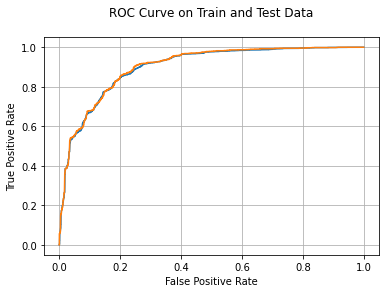

In [120]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_nb, y_train_pred_non_smote_normalized_nb))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_nb, y_test_pred_non_smote_normalized_nb))

plt.plot(train_fpr_non_smote_normalized_nb, train_tpr_non_smote_normalized_nb, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_nb, test_tpr_non_smote_normalized_nb, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


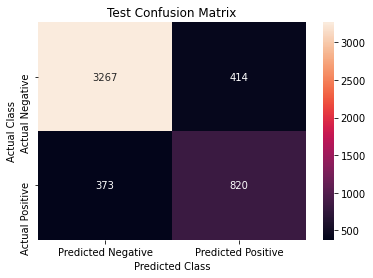

                 Predicted Negative  Predicted Positive
Actual Negative                3267                 414
Actual Positive                 373                 820


In [121]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_nb = confusion_matrix(y_test_non_smote_normalized_nb, nb_non_smote_normalized.predict(x_test_non_smote_normalized_nb).round())
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_nb_df = pd.DataFrame(cm_test_non_smote_normalized_nb, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_nb_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_nb_df)

In [122]:
_, _, false_negative_non_smote_normalized_nb, true_positive_non_smote_normalized_nb = cm_test_non_smote_normalized_nb.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_nb/(false_negative_non_smote_normalized_nb+true_positive_non_smote_normalized_nb)) * 100, "%")

False Negative Rate =  31.265716680637052 %


In [123]:
print(classification_report(y_test_non_smote_normalized_nb, nb_non_smote_normalized.predict(x_test_non_smote_normalized_nb)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3681
           1       0.66      0.69      0.68      1193

    accuracy                           0.84      4874
   macro avg       0.78      0.79      0.78      4874
weighted avg       0.84      0.84      0.84      4874



In [124]:
features_names_non_smote_normalized_nb = x_non_smote_normalized_nb.columns
features_names_non_smote_normalized_nb

Index(['Work_accident_False', 'Work_accident_True', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_product_mng',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium',
       'quantile_satisfaction_level_low',
       'quantile_satisfaction_level_low_mid',
       'quantile_satisfaction_level_high_mid',
       'quantile_satisfaction_level_high',
       'quantile_last_evaluation_rating_low',
       'quantile_last_evaluation_rating_low_mid',
       'quantile_last_evaluation_rating_high_mid',
       'quantile_last_evaluation_rating_high',
       'quantile_projects_worked_on_low',
       'quantile_projects_worked_on_low_mid',
       'quantile_projects_worked_on_high_mid',
       'quantile_projects_worked_on_high', 'quantile_average_montly_hours_low',
       'quantile_average_montly_hours_low_mid',
       'quantile_average_montly_hours_high_mid',
       'quantile_average_montly_hours_high'

In [125]:
nb_class_0_prob_non_smote_normalized = nb_non_smote_normalized.feature_log_prob_[0, :]
nb_class_1_prob_non_smote_normalized = nb_non_smote_normalized.feature_log_prob_[1, :]

In [126]:
feature_names_weights_dict_class_0_non_smote_normalized_nb = dict(zip(features_names_non_smote_normalized_nb, nb_class_0_prob_non_smote_normalized))
feature_names_weights_dict_class_1_non_smote_normalized_nb = dict(zip(features_names_non_smote_normalized_nb, nb_class_1_prob_non_smote_normalized))

In [127]:
feature_names_weights_dict_class_0_non_smote_normalized_nb

{'Work_accident_False': -0.1854628761831787,
 'Work_accident_True': -1.7761992074260275,
 'Department_IT': -2.4286245487064244,
 'Department_RandD': -2.8245202057984384,
 'Department_accounting': -3.0056995580136157,
 'Department_hr': -3.0022807512648306,
 'Department_management': -3.261918361009611,
 'Department_product_mng': -2.7595353557090254,
 'Department_technical': -1.703308085213087,
 'salary_high': -2.3509515103882066,
 'salary_low': -0.7623701612286631,
 'salary_medium': -0.8232332744179516,
 'quantile_satisfaction_level_low': -1.9768142654218943,
 'quantile_satisfaction_level_low_mid': -1.236451861957777,
 'quantile_satisfaction_level_high_mid': -1.215082293364338,
 'quantile_satisfaction_level_high': -1.2870387355656092,
 'quantile_last_evaluation_rating_low': -1.5154154833696776,
 'quantile_last_evaluation_rating_low_mid': -1.1994901986045008,
 'quantile_last_evaluation_rating_high_mid': -1.3031331714870724,
 'quantile_last_evaluation_rating_high': -1.5656534543650524,
 'q

In [128]:
feature_names_weights_dict_class_1_non_smote_normalized_nb

{'Work_accident_False': -0.049963643670414726,
 'Work_accident_True': -3.0213374733923652,
 'Department_IT': -2.4872549874621077,
 'Department_RandD': -3.262013503468216,
 'Department_accounting': -2.759384646906404,
 'Department_hr': -2.7886142852213416,
 'Department_management': -3.7091513079769483,
 'Department_product_mng': -2.8679510274578632,
 'Department_technical': -1.6217627046045804,
 'salary_high': -3.6777351117435693,
 'salary_low': -0.4971072774004508,
 'salary_medium': -0.9968548159932871,
 'quantile_satisfaction_level_low': -0.44534280012097227,
 'quantile_satisfaction_level_low_mid': -2.403121310300093,
 'quantile_satisfaction_level_high_mid': -1.9280871278656413,
 'quantile_satisfaction_level_high': -2.0499105730590292,
 'quantile_last_evaluation_rating_low': -0.8980837598254752,
 'quantile_last_evaluation_rating_low_mid': -2.805708718580642,
 'quantile_last_evaluation_rating_high_mid': -1.5060339616735776,
 'quantile_last_evaluation_rating_high': -1.1532443466938602,


# 11 ML Algorithms 3 - Logistic Regression

In [5]:
dill_load_session('9.4_all_knn_models_completed')

## 11.1 Logistic Regression On SMOTE Standardized Data

In [8]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [130]:
x_smote_standardized_logreg = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_logreg = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [131]:
# splitting into train & test set..
x_train_smote_standardized_logreg, x_test_smote_standardized_logreg, y_train_smote_standardized_logreg, y_test_smote_standardized_logreg = train_test_split(x_smote_standardized_logreg, y_smote_standardized_logreg, test_size = 0.20, random_state=21, stratify=y_smote_standardized_logreg)

# splitting train set into train and cv sets..
x_train_smote_standardized_logreg, x_cv_smote_standardized_logreg, y_train_smote_standardized_logreg, y_cv_smote_standardized_logreg = train_test_split(x_train_smote_standardized_logreg, y_train_smote_standardized_logreg, test_size = 0.20, random_state=21, stratify=y_train_smote_standardized_logreg)

print("len(x_train_smote_standardized_logreg) = ", len(x_train_smote_standardized_logreg))
print("len(y_train_smote_standardized_logreg) = ", len(y_train_smote_standardized_logreg))

print("\nlen(x_cv_smote_standardized_logreg) = ", len(x_cv_smote_standardized_logreg))
print("len(y_cv_smote_standardized_logreg) = ", len(y_cv_smote_standardized_logreg))

print("\nlen(x_test_smote_standardized_logreg) = ", len(x_test_smote_standardized_logreg))
print("len(y_test_smote_standardized_logreg) = ", len(y_test_smote_standardized_logreg))

len(x_train_smote_standardized_logreg) =  23555
len(y_train_smote_standardized_logreg) =  23555

len(x_cv_smote_standardized_logreg) =  5889
len(y_cv_smote_standardized_logreg) =  5889

len(x_test_smote_standardized_logreg) =  7362
len(y_test_smote_standardized_logreg) =  7362


In [132]:
hyper_parameter_values_dict = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2', 'elasticnet']
}

In [133]:
logreg_smote_standardized = LogisticRegression()
gcv_logreg_smote_standardized = GridSearchCV(logreg_smote_standardized, hyper_parameter_values_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_logreg_smote_standardized.fit(x_train_smote_standardized_logreg, y_train_smote_standardized_logreg)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [134]:
gcv_logreg_smote_standardized.best_estimator_

LogisticRegression(C=1)

In [135]:
gcv_logreg_smote_standardized.best_params_

{'C': 1, 'penalty': 'l2'}

In [136]:
gcv_logreg_smote_standardized.best_estimator_.coef_

array([[-1.30083051,  0.13727647, -0.83046128,  0.26625314,  0.9772787 ,
        -2.51283608, -4.43753652, -0.88270805, -1.54020917, -0.57693158,
        -0.49274873, -1.33996648, -0.76502467, -0.43981236, -5.24821184,
        -3.26473859, -3.66156558]])

In [137]:
gcv_logreg_smote_standardized.best_score_

0.8280195287624708

In [212]:
logreg_smote_standardized = LogisticRegression(C=1, penalty='l2', n_jobs=12)
logreg_smote_standardized.fit(x_train_smote_standardized_logreg, y_train_smote_standardized_logreg)

LogisticRegression(C=1, n_jobs=12)

In [213]:
y_train_pred_smote_standardized_logreg = logreg_smote_standardized.predict_proba(x_train_smote_standardized_logreg)[:,1]
y_test_pred_smote_standardized_logreg = logreg_smote_standardized.predict_proba(x_test_smote_standardized_logreg)[:,1]


AUC_train =  0.8723597790046198
AUC_test =  0.87006855692879


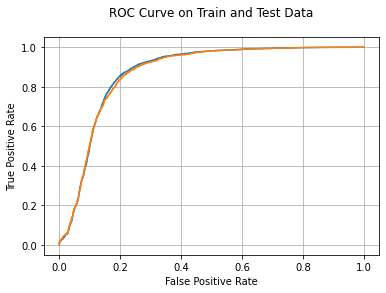

In [214]:
train_fpr_smote_standardized_logreg, train_tpr_smote_standardized_logreg, _ = roc_curve(y_train_smote_standardized_logreg, y_train_pred_smote_standardized_logreg)
test_fpr_smote_standardized_logreg, test_tpr_smote_standardized_logreg, _ = roc_curve(y_test_smote_standardized_logreg, y_test_pred_smote_standardized_logreg)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_logreg, y_train_pred_smote_standardized_logreg))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_logreg, y_test_pred_smote_standardized_logreg))

plt.plot(train_fpr_smote_standardized_logreg, train_tpr_smote_standardized_logreg, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_logreg, test_tpr_smote_standardized_logreg, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [215]:
y_test_smote_standardized_logreg[:10]

Attrition
17199          0
34607          1
18530          0
19199          0
2329           0
15904          0
10140          1
2620           0
4221           0
8966           0

In [216]:
logreg_smote_standardized.predict(x_test_smote_standardized_logreg).round()

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [217]:
y_test_pred_smote_standardized_logreg

array([0.00132001, 0.8121013 , 0.22590251, ..., 0.03533957, 0.2657934 ,
       0.30962133])



Test confusion matrix :


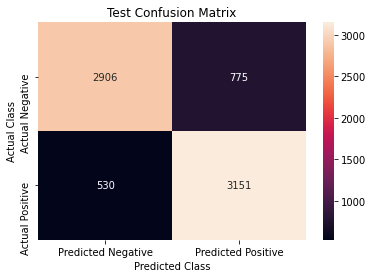

                 Predicted Negative  Predicted Positive
Actual Negative                2906                 775
Actual Positive                 530                3151


In [218]:
print("Test confusion matrix :")
cm_test_smote_standardized_logreg = confusion_matrix(y_test_smote_standardized_logreg, logreg_smote_standardized.predict(x_test_smote_standardized_logreg).round())
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_logreg_df = pd.DataFrame(cm_test_smote_standardized_logreg, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_logreg_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_logreg_df)

In [219]:
_, _, false_negative_smote_standardized_logreg, true_positive_smote_standardized_logreg = cm_test_smote_standardized_logreg.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_logreg/(false_negative_smote_standardized_logreg+true_positive_smote_standardized_logreg)) * 100, "%")

False Negative Rate =  14.398261342026622 %


In [220]:
features_names_smote_standardized_logreg = smote_standardized_df.columns

In [221]:
feature_names_weights_dict_class_1_smote_standardized_logreg = dict(zip(features_names_smote_standardized_logreg, logreg_smote_standardized.coef_[0]))
feature_names_weights_dict_class_0_smote_standardized_logreg = dict(zip(features_names_smote_standardized_logreg, -(logreg_smote_standardized.coef_[0])))

In [222]:
feature_names_weights_dict_class_1_smote_standardized_logreg

{'satisfaction_level': -1.3008305753436618,
 'last_evaluation_rating': 0.13727648386371938,
 'projects_worked_on': -0.8304612462900953,
 'average_montly_hours': 0.2662530117993112,
 'time_spend_company': 0.9772788323133083,
 'Work_accident_False': -2.5128410258581004,
 'Work_accident_True': -4.437541485780036,
 'Department_IT': -0.8827078611697103,
 'Department_RandD': -1.5402090089484402,
 'Department_accounting': -0.5769311158127537,
 'Department_hr': -0.49274858064862936,
 'Department_management': -1.3399655024800816,
 'Department_product_mng': -0.7650247008985618,
 'Department_technical': -0.43981213164227295,
 'salary_high': -5.248215007434288,
 'salary_low': -3.2647412972349037,
 'salary_medium': -3.6615680843654745}

In [223]:
feature_names_weights_dict_class_0_smote_standardized_logreg

{'satisfaction_level': 1.3008305753436618,
 'last_evaluation_rating': -0.13727648386371938,
 'projects_worked_on': 0.8304612462900953,
 'average_montly_hours': -0.2662530117993112,
 'time_spend_company': -0.9772788323133083,
 'Work_accident_False': 2.5128410258581004,
 'Work_accident_True': 4.437541485780036,
 'Department_IT': 0.8827078611697103,
 'Department_RandD': 1.5402090089484402,
 'Department_accounting': 0.5769311158127537,
 'Department_hr': 0.49274858064862936,
 'Department_management': 1.3399655024800816,
 'Department_product_mng': 0.7650247008985618,
 'Department_technical': 0.43981213164227295,
 'salary_high': 5.248215007434288,
 'salary_low': 3.2647412972349037,
 'salary_medium': 3.6615680843654745}

In [271]:
print(classification_report(y_test_smote_standardized_logreg, logreg_smote_standardized.predict(x_test_smote_standardized_logreg)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3681
           1       0.80      0.86      0.83      3681

    accuracy                           0.82      7362
   macro avg       0.82      0.82      0.82      7362
weighted avg       0.82      0.82      0.82      7362



## 11.2 Logistic Regression On SMOTE Normalized Data

In [224]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [225]:
x_smote_normalized_logreg = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_logreg = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [226]:
# splitting into train & test set..
x_train_smote_normalized_logreg, x_test_smote_normalized_logreg, y_train_smote_normalized_logreg, y_test_smote_normalized_logreg = train_test_split(x_smote_normalized_logreg, y_smote_normalized_logreg, test_size = 0.20, random_state=21, stratify=y_smote_normalized_logreg)

# splitting train set into train and cv sets..
x_train_smote_normalized_logreg, x_cv_smote_normalized_logreg, y_train_smote_normalized_logreg, y_cv_smote_normalized_logreg = train_test_split(x_train_smote_normalized_logreg, y_train_smote_normalized_logreg, test_size = 0.20, random_state=21, stratify=y_train_smote_normalized_logreg)

print("len(x_train_smote_normalized_logreg) = ", len(x_train_smote_normalized_logreg))
print("len(y_train_smote_normalized_logreg) = ", len(y_train_smote_normalized_logreg))

print("\nlen(x_cv_smote_normalized_logreg) = ", len(x_cv_smote_normalized_logreg))
print("len(y_cv_smote_normalized_logreg) = ", len(y_cv_smote_normalized_logreg))

print("\nlen(x_test_smote_normalized_logreg) = ", len(x_test_smote_normalized_logreg))
print("len(y_test_smote_normalized_logreg) = ", len(y_test_smote_normalized_logreg))

len(x_train_smote_normalized_logreg) =  23555
len(y_train_smote_normalized_logreg) =  23555

len(x_cv_smote_normalized_logreg) =  5889
len(y_cv_smote_normalized_logreg) =  5889

len(x_test_smote_normalized_logreg) =  7362
len(y_test_smote_normalized_logreg) =  7362


In [227]:
hyper_parameter_values_dict = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2', 'elasticnet']
}

In [154]:
logreg_smote_normalized = LogisticRegression()
gcv_logreg_smote_normalized = GridSearchCV(logreg_smote_normalized, hyper_parameter_values_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_logreg_smote_normalized.fit(x_train_smote_normalized_logreg, y_train_smote_normalized_logreg)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [155]:
gcv_logreg_smote_normalized.best_estimator_

LogisticRegression(C=10)

In [156]:
gcv_logreg_smote_normalized.best_params_

{'C': 10, 'penalty': 'l2'}

In [157]:
gcv_logreg_smote_normalized.best_estimator_.coef_

array([[-4.44583255,  0.48512286, -3.29157291,  1.10041489,  4.4545952 ,
        -4.45271216, -6.39708104, -0.88504394, -1.55323326, -0.57985508,
        -0.49311014, -1.35109296, -0.7656057 , -0.44010664, -7.26646097,
        -5.24505297, -5.64311034]])

In [158]:
gcv_logreg_smote_normalized.best_score_

0.8279346210995542

In [159]:
logreg_smote_normalized = LogisticRegression(C=10, penalty='l2', n_jobs=12)
logreg_smote_normalized.fit(x_train_smote_normalized_logreg, y_train_smote_normalized_logreg)

LogisticRegression(C=10, n_jobs=12)

In [160]:
y_train_pred_smote_normalized_logreg = logreg_smote_normalized.predict_proba(x_train_smote_normalized_logreg)[:,1]
y_test_pred_smote_normalized_logreg = logreg_smote_normalized.predict_proba(x_test_smote_normalized_logreg)[:,1]


AUC_train =  0.8729953807203379
AUC_test =  0.8706086402557212


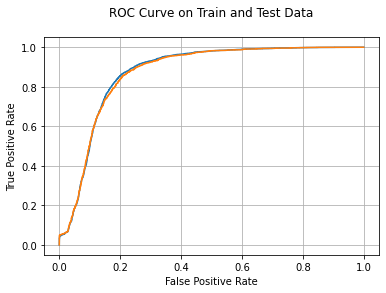

In [161]:
train_fpr_smote_normalized_logreg, train_tpr_smote_normalized_logreg, _ = roc_curve(y_train_smote_normalized_logreg, y_train_pred_smote_normalized_logreg)
test_fpr_smote_normalized_logreg, test_tpr_smote_normalized_logreg, _ = roc_curve(y_test_smote_normalized_logreg, y_test_pred_smote_normalized_logreg)

print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_logreg, y_train_pred_smote_normalized_logreg))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_logreg, y_test_pred_smote_normalized_logreg))

plt.plot(train_fpr_smote_normalized_logreg, train_tpr_smote_normalized_logreg, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_logreg, test_tpr_smote_normalized_logreg, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [162]:
y_test_smote_normalized_logreg[:10]

Attrition
17199          0
34607          1
18530          0
19199          0
2329           0
15904          0
10140          1
2620           0
4221           0
8966           0

In [163]:
logreg_smote_normalized.predict(x_test_smote_normalized_logreg).round()

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [164]:
y_test_pred_smote_normalized_logreg

array([0.00123248, 0.81274104, 0.22301377, ..., 0.03500085, 0.26447123,
       0.30874259])



Test confusion matrix :


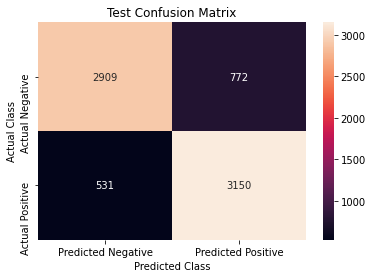

                 Predicted Negative  Predicted Positive
Actual Negative                2909                 772
Actual Positive                 531                3150


In [165]:
print("\n\nTest confusion matrix :")
cm_test_smote_normalized_logreg = confusion_matrix(y_test_smote_normalized_logreg, logreg_smote_normalized.predict(x_test_smote_normalized_logreg).round())
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_logreg_df = pd.DataFrame(cm_test_smote_normalized_logreg, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_logreg_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_logreg_df)

In [166]:
_, _, false_negative_smote_normalized_logreg, true_positive_smote_normalized_logreg = cm_test_smote_normalized_logreg.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_logreg/(false_negative_smote_normalized_logreg+true_positive_smote_normalized_logreg)) * 100, "%")

False Negative Rate =  14.425427872860636 %


In [167]:
features_names_smote_normalized_logreg = smote_normalized_df.columns
feature_names_weights_dict_class_1_smote_normalized_logreg = dict(zip(features_names_smote_normalized_logreg, logreg_smote_normalized.coef_[0]))
feature_names_weights_dict_class_0_smote_normalized_logreg = dict(zip(features_names_smote_normalized_logreg, -(logreg_smote_normalized.coef_[0])))

In [168]:
feature_names_weights_dict_class_1_smote_normalized_logreg

{'satisfaction_level': -4.445833782763942,
 'last_evaluation_rating': 0.4851208298192285,
 'projects_worked_on': -3.291575250889941,
 'average_montly_hours': 1.1004156080217429,
 'time_spend_company': 4.45459638442238,
 'Work_accident_False': -4.452738982258544,
 'Work_accident_True': -6.397105953487875,
 'Department_IT': -0.8850434570686121,
 'Department_RandD': -1.5532315656122264,
 'Department_accounting': -0.5798555712463661,
 'Department_hr': -0.49311056324196184,
 'Department_management': -1.3510963827010283,
 'Department_product_mng': -0.7656051518272599,
 'Department_technical': -0.44010726116677795,
 'salary_high': -7.266437664106362,
 'salary_low': -5.24502980172286,
 'salary_medium': -5.643088010100459}

In [169]:
feature_names_weights_dict_class_0_smote_normalized_logreg

{'satisfaction_level': 4.445833782763942,
 'last_evaluation_rating': -0.4851208298192285,
 'projects_worked_on': 3.291575250889941,
 'average_montly_hours': -1.1004156080217429,
 'time_spend_company': -4.45459638442238,
 'Work_accident_False': 4.452738982258544,
 'Work_accident_True': 6.397105953487875,
 'Department_IT': 0.8850434570686121,
 'Department_RandD': 1.5532315656122264,
 'Department_accounting': 0.5798555712463661,
 'Department_hr': 0.49311056324196184,
 'Department_management': 1.3510963827010283,
 'Department_product_mng': 0.7656051518272599,
 'Department_technical': 0.44010726116677795,
 'salary_high': 7.266437664106362,
 'salary_low': 5.24502980172286,
 'salary_medium': 5.643088010100459}

In [272]:
print(classification_report(y_test_smote_normalized_logreg, logreg_smote_normalized.predict(x_test_smote_normalized_logreg)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      3681
           1       0.80      0.86      0.83      3681

    accuracy                           0.82      7362
   macro avg       0.82      0.82      0.82      7362
weighted avg       0.82      0.82      0.82      7362



## 11.3 Logistic Regression On NON-SMOTE Standardized Data

In [170]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [171]:
x_non_smote_standardized_logreg = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_logreg = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [172]:
# splitting into train & test set..
x_train_non_smote_standardized_logreg, x_test_non_smote_standardized_logreg, y_train_non_smote_standardized_logreg, y_test_non_smote_standardized_logreg = train_test_split(x_non_smote_standardized_logreg, y_non_smote_standardized_logreg, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_logreg)

# splitting train set into train and cv sets..
x_train_non_smote_standardized_logreg, x_cv_non_smote_standardized_logreg, y_train_non_smote_standardized_logreg, y_cv_non_smote_standardized_logreg = train_test_split(x_train_non_smote_standardized_logreg, y_train_non_smote_standardized_logreg, test_size = 0.20, random_state=21, stratify=y_train_non_smote_standardized_logreg)

print("len(x_train_non_smote_standardized_logreg) = ", len(x_train_non_smote_standardized_logreg))
print("len(y_train_non_smote_standardized_logreg) = ", len(y_train_non_smote_standardized_logreg))

print("\nlen(x_cv_non_smote_standardized_logreg) = ", len(x_cv_non_smote_standardized_logreg))
print("len(y_cv_non_smote_standardized_logreg) = ", len(y_cv_non_smote_standardized_logreg))

print("\nlen(x_test_non_smote_standardized_logreg) = ", len(x_test_non_smote_standardized_logreg))
print("len(y_test_non_smote_standardized_logreg) = ", len(y_test_non_smote_standardized_logreg))

len(x_train_non_smote_standardized_logreg) =  15594
len(y_train_non_smote_standardized_logreg) =  15594

len(x_cv_non_smote_standardized_logreg) =  3899
len(y_cv_non_smote_standardized_logreg) =  3899

len(x_test_non_smote_standardized_logreg) =  4874
len(y_test_non_smote_standardized_logreg) =  4874


In [173]:
hyper_parameter_values_dict = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2', 'elasticnet']
}

In [174]:
logreg_non_smote_standardized = LogisticRegression()
gcv_logreg_non_smote_standardized = GridSearchCV(logreg_non_smote_standardized, hyper_parameter_values_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_logreg_non_smote_standardized.fit(x_train_non_smote_standardized_logreg, y_train_non_smote_standardized_logreg)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [175]:
gcv_logreg_non_smote_standardized.best_estimator_

LogisticRegression(C=10)

In [176]:
gcv_logreg_non_smote_standardized.best_params_

{'C': 10, 'penalty': 'l2'}

In [177]:
gcv_logreg_non_smote_standardized.best_estimator_.coef_

array([[-1.00439615,  0.11185351, -0.46870973,  0.20274839,  0.66109752,
         0.77343604, -0.7725147 , -0.1449395 , -0.55013715,  0.10282891,
         0.14877261, -0.43857217, -0.17651156,  0.08545827, -1.06462607,
         0.77668178,  0.28886562]])

In [178]:
gcv_logreg_non_smote_standardized.best_score_

0.7756831898515195

In [245]:
logreg_non_smote_standardized = LogisticRegression(C=10, penalty='l2', class_weight='balanced', n_jobs=12)
logreg_non_smote_standardized.fit(x_train_non_smote_standardized_logreg, y_train_non_smote_standardized_logreg)

LogisticRegression(C=10, class_weight='balanced', n_jobs=12)

In [246]:
y_train_pred_non_smote_standardized_logreg = logreg_non_smote_standardized.predict_proba(x_train_non_smote_standardized_logreg)[:,1]
y_test_pred_non_smote_standardized_logreg = logreg_non_smote_standardized.predict_proba(x_test_non_smote_standardized_logreg)[:,1]

In [247]:
train_fpr_non_smote_standardized_logreg, train_tpr_non_smote_standardized_logreg, _ = roc_curve(y_train_non_smote_standardized_logreg, y_train_pred_non_smote_standardized_logreg)
test_fpr_non_smote_standardized_logreg, test_tpr_non_smote_standardized_logreg, _ = roc_curve(y_test_non_smote_standardized_logreg, y_test_pred_non_smote_standardized_logreg)

In [248]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_logreg, y_train_pred_non_smote_standardized_logreg))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_logreg, y_test_pred_non_smote_standardized_logreg))


AUC_train =  0.8523585255817939
AUC_test =  0.8527259780577321


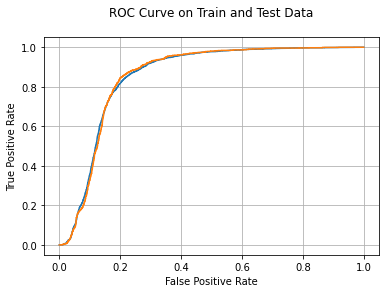

In [249]:
plt.plot(train_fpr_non_smote_standardized_logreg, train_tpr_non_smote_standardized_logreg, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_logreg, test_tpr_non_smote_standardized_logreg, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()



Test confusion matrix :


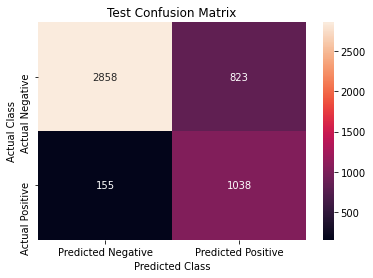

                 Predicted Negative  Predicted Positive
Actual Negative                2858                 823
Actual Positive                 155                1038


In [250]:
print("\n\nTest confusion matrix :")
cm_test_non_smote_standardized_logreg = confusion_matrix(y_test_non_smote_standardized_logreg, logreg_non_smote_standardized.predict(x_test_non_smote_standardized_logreg).round())
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_logreg_df = pd.DataFrame(cm_test_non_smote_standardized_logreg, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_logreg_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_logreg_df)

In [251]:
_, _, false_negative_non_smote_standardized_logreg, true_positive_non_smote_standardized_logreg = cm_test_non_smote_standardized_logreg.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_logreg/(false_negative_non_smote_standardized_logreg+true_positive_non_smote_standardized_logreg)) * 100, "%")

False Negative Rate =  12.992455993294216 %


In [252]:
features_names_non_smote_standardized_logreg = non_smote_standardized_df.columns

In [253]:
feature_names_weights_dict_class_1_non_smote_standardized_logreg = dict(zip(features_names_non_smote_standardized_logreg, logreg_non_smote_standardized.coef_[0]))
feature_names_weights_dict_class_0_non_smote_standardized_logreg = dict(zip(features_names_non_smote_standardized_logreg, -(logreg_non_smote_standardized.coef_[0])))

In [254]:
feature_names_weights_dict_class_1_non_smote_standardized_logreg

{'satisfaction_level': -1.1541946163519756,
 'last_evaluation_rating': 0.11799131274495485,
 'projects_worked_on': -0.6072132296446858,
 'average_montly_hours': 0.19581743131036833,
 'time_spend_company': 1.0322491617406104,
 'Attrition': 0.3375825640115215,
 'Work_accident_False': -1.1638480721999989,
 'Work_accident_True': -0.1348859365901341,
 'Department_IT': -0.48114281434620065,
 'Department_RandD': 0.11501773834517087,
 'Department_accounting': 0.17021855326897548,
 'Department_hr': -0.486090393089483,
 'Department_management': -0.14751373134427442,
 'Department_product_mng': 0.07831599171653598,
 'Department_technical': -1.279424782182622,
 'salary_high': 0.4470858623712429,
 'salary_low': 0.006073411622902304}

In [255]:
feature_names_weights_dict_class_0_non_smote_standardized_logreg

{'satisfaction_level': 1.1541946163519756,
 'last_evaluation_rating': -0.11799131274495485,
 'projects_worked_on': 0.6072132296446858,
 'average_montly_hours': -0.19581743131036833,
 'time_spend_company': -1.0322491617406104,
 'Attrition': -0.3375825640115215,
 'Work_accident_False': 1.1638480721999989,
 'Work_accident_True': 0.1348859365901341,
 'Department_IT': 0.48114281434620065,
 'Department_RandD': -0.11501773834517087,
 'Department_accounting': -0.17021855326897548,
 'Department_hr': 0.486090393089483,
 'Department_management': 0.14751373134427442,
 'Department_product_mng': -0.07831599171653598,
 'Department_technical': 1.279424782182622,
 'salary_high': -0.4470858623712429,
 'salary_low': -0.006073411622902304}

In [273]:
print(classification_report(y_test_non_smote_standardized_logreg, logreg_non_smote_standardized.predict(x_test_non_smote_standardized_logreg)))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      3681
           1       0.56      0.87      0.68      1193

    accuracy                           0.80      4874
   macro avg       0.75      0.82      0.77      4874
weighted avg       0.85      0.80      0.81      4874



## 11.4 Logistic Regression On NON-SMOTE Normalized Data

In [190]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [191]:
x_non_smote_normalized_logreg = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_logreg = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [192]:
y_non_smote_normalized_logreg.value_counts()

Attrition
0            18403
1             5964
dtype: int64

In [193]:
# splitting into train & test set..
x_train_non_smote_normalized_logreg, x_test_non_smote_normalized_logreg, y_train_non_smote_normalized_logreg, y_test_non_smote_normalized_logreg = train_test_split(x_non_smote_normalized_logreg, y_non_smote_normalized_logreg, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_logreg)

# splitting train set into train and cv sets..A
x_train_non_smote_normalized_logreg, x_cv_non_smote_normalized_logreg, y_train_non_smote_normalized_logreg, y_cv_non_smote_normalized_logreg = train_test_split(x_train_non_smote_normalized_logreg, y_train_non_smote_normalized_logreg, test_size = 0.20, random_state=21, stratify=y_train_non_smote_normalized_logreg)

print("len(x_train_non_smote_normalized_logreg) = ", len(x_train_non_smote_normalized_logreg))
print("len(y_train_non_smote_normalized_logreg) = ", len(y_train_non_smote_normalized_logreg))

print("\nlen(x_cv_non_smote_normalized_logreg) = ", len(x_cv_non_smote_normalized_logreg))
print("len(y_cv_non_smote_normalized_logreg) = ", len(y_cv_non_smote_normalized_logreg))

print("\nlen(x_test_non_smote_normalized_logreg) = ", len(x_test_non_smote_normalized_logreg))
print("len(y_test_non_smote_normalized_logreg) = ", len(y_test_non_smote_normalized_logreg))

len(x_train_non_smote_normalized_logreg) =  15594
len(y_train_non_smote_normalized_logreg) =  15594

len(x_cv_non_smote_normalized_logreg) =  3899
len(y_cv_non_smote_normalized_logreg) =  3899

len(x_test_non_smote_normalized_logreg) =  4874
len(y_test_non_smote_normalized_logreg) =  4874


In [194]:
y_test_non_smote_normalized_logreg.value_counts()

Attrition
0            3681
1            1193
dtype: int64

In [195]:
hyper_parameter_values_dict = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2', 'elasticnet']
}

In [196]:
logreg_non_smote_normalized = LogisticRegression()
gcv_logreg_non_smote_normalized = GridSearchCV(logreg_non_smote_normalized, hyper_parameter_values_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_logreg_non_smote_normalized.fit(x_train_non_smote_normalized_logreg, y_train_non_smote_normalized_logreg)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=12,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [197]:
gcv_logreg_non_smote_normalized.best_estimator_

LogisticRegression(C=100)

In [198]:
gcv_logreg_non_smote_normalized.best_params_

{'C': 100, 'penalty': 'l2'}

In [199]:
gcv_logreg_non_smote_normalized.best_estimator_.coef_

array([[-3.65719404,  0.41763671, -2.10903547,  0.9032283 ,  2.89413742,
         0.46793717, -1.07883928, -0.14546733, -0.55082287,  0.10260142,
         0.14886551, -0.43914703, -0.17667973,  0.08529544, -1.26894718,
         0.57296027,  0.0850848 ]])

In [200]:
gcv_logreg_non_smote_normalized.best_score_

0.775619066735136

In [256]:
logreg_non_smote_normalized = LogisticRegression(C=100, penalty='l2', class_weight='balanced', n_jobs=12)
logreg_non_smote_normalized.fit(x_train_non_smote_normalized_logreg, y_train_non_smote_normalized_logreg)

LogisticRegression(C=100, class_weight='balanced', n_jobs=12)

In [257]:
y_train_pred_non_smote_normalized_logreg = logreg_non_smote_normalized.predict_proba(x_train_non_smote_normalized_logreg)[:,1]
y_test_pred_non_smote_normalized_logreg = logreg_non_smote_normalized.predict_proba(x_test_non_smote_normalized_logreg)[:,1]

In [258]:
train_fpr_non_smote_normalized_logreg, train_tpr_non_smote_normalized_logreg, _ = roc_curve(y_train_non_smote_normalized_logreg, y_train_pred_non_smote_normalized_logreg)
test_fpr_non_smote_normalized_logreg, test_tpr_non_smote_normalized_logreg, _ = roc_curve(y_test_non_smote_normalized_logreg, y_test_pred_non_smote_normalized_logreg)

In [259]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_logreg, y_train_pred_non_smote_normalized_logreg))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_logreg, y_test_pred_non_smote_normalized_logreg))


AUC_train =  0.8523566792010706
AUC_test =  0.8527271166382364


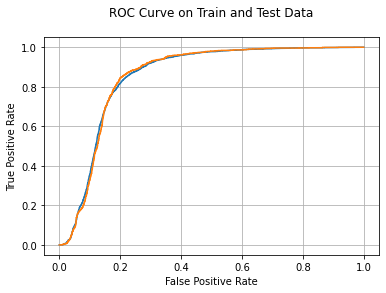

In [260]:
plt.plot(train_fpr_non_smote_normalized_logreg, train_tpr_non_smote_normalized_logreg, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_logreg, test_tpr_non_smote_normalized_logreg, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()



Test confusion matrix :


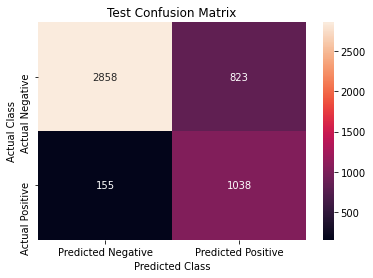

                 Predicted Negative  Predicted Positive
Actual Negative                2858                 823
Actual Positive                 155                1038


In [261]:
print("\n\nTest confusion matrix :")
cm_test_non_smote_normalized_logreg = confusion_matrix(y_test_non_smote_normalized_logreg, logreg_non_smote_normalized.predict(x_test_non_smote_normalized_logreg).round())
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_logreg_df = pd.DataFrame(cm_test_non_smote_normalized_logreg, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_logreg_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_logreg_df)

In [262]:
_, _, false_negative_non_smote_normalized_logreg, true_positive_non_smote_normalized_logreg = cm_test_non_smote_normalized_logreg.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_logreg/(false_negative_non_smote_normalized_logreg+true_positive_non_smote_normalized_logreg)) * 100, "%")

False Negative Rate =  12.992455993294216 %


In [263]:
features_names_non_smote_normalized_logreg = non_smote_normalized_df.columns

In [264]:
feature_names_weights_dict_class_1_non_smote_normalized_logreg = dict(zip(features_names_non_smote_normalized_logreg, logreg_non_smote_normalized.coef_[0]))
feature_names_weights_dict_class_0_non_smote_normalized_logreg = dict(zip(features_names_non_smote_normalized_logreg, -(logreg_non_smote_normalized.coef_[0])))

In [265]:
feature_names_weights_dict_class_1_non_smote_normalized_logreg

{'satisfaction_level': -4.202492342353256,
 'last_evaluation_rating': 0.4407446492068959,
 'projects_worked_on': -2.732620630074608,
 'average_montly_hours': 0.8723130693062834,
 'time_spend_company': 4.518866877193879,
 'Attrition': 0.7535454545755387,
 'Work_accident_False': -0.7482626274120161,
 'Work_accident_True': -0.13495791237098528,
 'Department_IT': -0.48205884496965956,
 'Department_RandD': 0.11509711213140586,
 'Department_accounting': 0.1700287813134635,
 'Department_hr': -0.4871934516631798,
 'Department_management': -0.1477914243344716,
 'Department_product_mng': 0.07823513716565197,
 'Department_technical': -1.0027630168013393,
 'salary_high': 0.7245615776384025,
 'salary_low': 0.2834842663264573}

In [266]:
feature_names_weights_dict_class_0_non_smote_normalized_logreg

{'satisfaction_level': 4.202492342353256,
 'last_evaluation_rating': -0.4407446492068959,
 'projects_worked_on': 2.732620630074608,
 'average_montly_hours': -0.8723130693062834,
 'time_spend_company': -4.518866877193879,
 'Attrition': -0.7535454545755387,
 'Work_accident_False': 0.7482626274120161,
 'Work_accident_True': 0.13495791237098528,
 'Department_IT': 0.48205884496965956,
 'Department_RandD': -0.11509711213140586,
 'Department_accounting': -0.1700287813134635,
 'Department_hr': 0.4871934516631798,
 'Department_management': 0.1477914243344716,
 'Department_product_mng': -0.07823513716565197,
 'Department_technical': 1.0027630168013393,
 'salary_high': -0.7245615776384025,
 'salary_low': -0.2834842663264573}

In [274]:
print(classification_report(y_test_non_smote_normalized_logreg, logreg_non_smote_normalized.predict(x_test_non_smote_normalized_logreg)))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      3681
           1       0.56      0.87      0.68      1193

    accuracy                           0.80      4874
   macro avg       0.75      0.82      0.77      4874
weighted avg       0.85      0.80      0.81      4874



In [275]:
dill_dump_session('11.4_all_logistic_regression_models_completed')

# 12 ML Algorithms 4 - Support Vector Machines (SVM)

In [4]:
dill_load_session('11.4_all_logistic_regression_models_completed')

## 12.1 SVM On SMOTE Standardized Data

In [5]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [6]:
x_smote_standardized_svm = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_svm = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [7]:
# splitting into train & test set..
x_train_smote_standardized_svm, x_test_smote_standardized_svm, y_train_smote_standardized_svm, y_test_smote_standardized_svm = train_test_split(x_smote_standardized_svm, y_smote_standardized_svm, test_size = 0.20, random_state=21, stratify=y_smote_standardized_svm)

# splitting train set into train and cv sets..
x_train_smote_standardized_svm, x_cv_smote_standardized_svm, y_train_smote_standardized_svm, y_cv_smote_standardized_svm = train_test_split(x_train_smote_standardized_svm, y_train_smote_standardized_svm, test_size = 0.20, random_state=21, stratify=y_train_smote_standardized_svm)

print("len(x_train_smote_standardized_svm) = ", len(x_train_smote_standardized_svm))
print("len(y_train_smote_standardized_svm) = ", len(y_train_smote_standardized_svm))

print("\nlen(x_cv_smote_standardized_svm) = ", len(x_cv_smote_standardized_svm))
print("len(y_cv_smote_standardized_svm) = ", len(y_cv_smote_standardized_svm))

print("\nlen(x_test_smote_standardized_svm) = ", len(x_test_smote_standardized_svm))
print("len(y_test_smote_standardized_svm) = ", len(y_test_smote_standardized_svm))

len(x_train_smote_standardized_svm) =  23555
len(y_train_smote_standardized_svm) =  23555

len(x_cv_smote_standardized_svm) =  5889
len(y_cv_smote_standardized_svm) =  5889

len(x_test_smote_standardized_svm) =  7362
len(y_test_smote_standardized_svm) =  7362


In [8]:
hyper_parameter_values_svm_dict = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [9]:
# class_weight='balanced'

In [10]:
svm_smote_standardized = SVC()
gcv_svm_smote_standardized = GridSearchCV(svm_smote_standardized, hyper_parameter_values_svm_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_svm_smote_standardized.fit(x_train_smote_standardized_svm, y_train_smote_standardized_svm)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [11]:
gcv_svm_smote_standardized.best_estimator_

SVC(C=100)

In [12]:
gcv_svm_smote_standardized.best_params_

{'C': 100, 'kernel': 'rbf'}

In [14]:
gcv_svm_smote_standardized.best_estimator_.dual_coef_

array([[ -11.32399065, -100.        ,  -33.37740231, ...,   19.68507334,
          18.19996035,  100.        ]])

In [13]:
gcv_svm_smote_standardized.best_score_

0.9718106559116959

In [16]:
svm_smote_standardized = SVC(C=100, kernel='rbf')
svm_smote_standardized.fit(x_train_smote_standardized_svm, y_train_smote_standardized_svm)

SVC(C=100)

In [17]:
y_train_pred_smote_standardized_svm = svm_smote_standardized.predict(x_train_smote_standardized_svm)#[:,1]
y_test_pred_smote_standardized_svm = svm_smote_standardized.predict(x_test_smote_standardized_svm)#[:,1]

In [89]:
len(svm_smote_standardized.dual_coef_[0])

2165

In [90]:
svm_smote_standardized.n_support_

array([1092, 1073])

In [91]:
svm_smote_standardized.classes_

array([0, 1], dtype=int64)


AUC_train =  0.9831880339909796
AUC_test =  0.9731051344743277


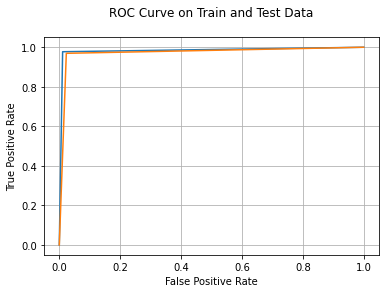

In [18]:
train_fpr_smote_standardized_svm, train_tpr_smote_standardized_svm, _ = roc_curve(y_train_smote_standardized_svm, y_train_pred_smote_standardized_svm)
test_fpr_smote_standardized_svm, test_tpr_smote_standardized_svm, _ = roc_curve(y_test_smote_standardized_svm, y_test_pred_smote_standardized_svm)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_svm, y_train_pred_smote_standardized_svm))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_svm, y_test_pred_smote_standardized_svm))

plt.plot(train_fpr_smote_standardized_svm, train_tpr_smote_standardized_svm, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_svm, test_tpr_smote_standardized_svm, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


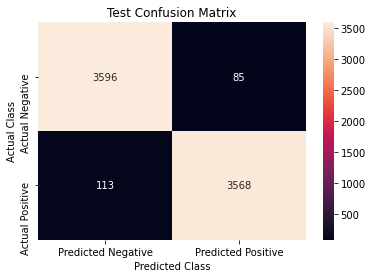

                 Predicted Negative  Predicted Positive
Actual Negative                3596                  85
Actual Positive                 113                3568


In [19]:
print("Test confusion matrix :")
cm_test_smote_standardized_svm = confusion_matrix(y_test_smote_standardized_svm, y_test_pred_smote_standardized_svm)
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_svm_df = pd.DataFrame(cm_test_smote_standardized_svm, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_svm_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_svm_df)

In [20]:
_, _, false_negative_smote_standardized_svm, true_positive_smote_standardized_svm = cm_test_smote_standardized_svm.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_svm/(false_negative_smote_standardized_svm+true_positive_smote_standardized_svm)) * 100, "%")

False Negative Rate =  3.069817984243412 %


In [31]:
# features_names_smote_standardized_svm = smote_standardized_df.columns

In [32]:
# feature_names_weights_dict_class_1_smote_standardized_svm = dict(zip(features_names_smote_standardized_svm, svm_smote_standardized.dual_coef_[0]))
# feature_names_weights_dict_class_0_smote_standardized_svm = dict(zip(features_names_smote_standardized_svm, -(svm_smote_standardized.dual_coef_[0])))

In [33]:
# feature_names_weights_dict_class_1_smote_standardized_svm

In [34]:
# feature_names_weights_dict_class_0_smote_standardized_svm

In [35]:
print(classification_report(y_test_smote_standardized_svm, y_test_pred_smote_standardized_svm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3681
           1       0.98      0.97      0.97      3681

    accuracy                           0.97      7362
   macro avg       0.97      0.97      0.97      7362
weighted avg       0.97      0.97      0.97      7362



## 12.2 SVM On SMOTE Normalized Data

In [36]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [37]:
x_smote_normalized_svm = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_svm = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [38]:
# splitting into train & test set..
x_train_smote_normalized_svm, x_test_smote_normalized_svm, y_train_smote_normalized_svm, y_test_smote_normalized_svm = train_test_split(x_smote_normalized_svm, y_smote_normalized_svm, test_size = 0.20, random_state=21, stratify=y_smote_normalized_svm)

# splitting train set into train and cv sets..
x_train_smote_normalized_svm, x_cv_smote_normalized_svm, y_train_smote_normalized_svm, y_cv_smote_normalized_svm = train_test_split(x_train_smote_normalized_svm, y_train_smote_normalized_svm, test_size = 0.20, random_state=21, stratify=y_train_smote_normalized_svm)

print("len(x_train_smote_normalized_svm) = ", len(x_train_smote_normalized_svm))
print("len(y_train_smote_normalized_svm) = ", len(y_train_smote_normalized_svm))

print("\nlen(x_cv_smote_normalized_svm) = ", len(x_cv_smote_normalized_svm))
print("len(y_cv_smote_normalized_svm) = ", len(y_cv_smote_normalized_svm))

print("\nlen(x_test_smote_normalized_svm) = ", len(x_test_smote_normalized_svm))
print("len(y_test_smote_normalized_svm) = ", len(y_test_smote_normalized_svm))

len(x_train_smote_normalized_svm) =  23555
len(y_train_smote_normalized_svm) =  23555

len(x_cv_smote_normalized_svm) =  5889
len(y_cv_smote_normalized_svm) =  5889

len(x_test_smote_normalized_svm) =  7362
len(y_test_smote_normalized_svm) =  7362


In [39]:
hyper_parameter_values_svm_dict = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [40]:
svm_smote_normalized = SVC()
gcv_svm_smote_normalized = GridSearchCV(svm_smote_normalized, hyper_parameter_values_svm_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_svm_smote_normalized.fit(x_train_smote_normalized_svm, y_train_smote_normalized_svm)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [41]:
gcv_svm_smote_normalized.best_estimator_

SVC(C=100)

In [42]:
gcv_svm_smote_normalized.best_params_

{'C': 100, 'kernel': 'rbf'}

In [43]:
gcv_svm_smote_normalized.best_estimator_.dual_coef_

array([[-100.        , -100.        , -100.        , ...,  100.        ,
           1.37559188,  100.        ]])

In [44]:
gcv_svm_smote_normalized.best_score_

0.9557206537890044

In [45]:
svm_smote_normalized = SVC(C=100, kernel='rbf')
svm_smote_normalized.fit(x_train_smote_normalized_svm, y_train_smote_normalized_svm)

SVC(C=100)

In [46]:
y_train_pred_smote_normalized_svm = svm_smote_normalized.predict(x_train_smote_normalized_svm)
y_test_pred_smote_normalized_svm = svm_smote_normalized.predict(x_test_smote_normalized_svm)


AUC_train =  0.9626829324876984
AUC_test =  0.9549035588155392


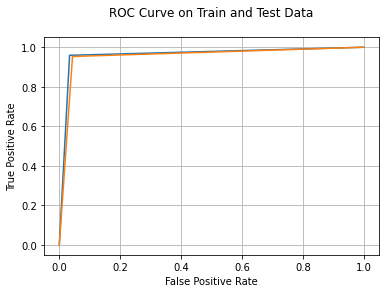

In [47]:
train_fpr_smote_normalized_svm, train_tpr_smote_normalized_svm, _ = roc_curve(y_train_smote_normalized_svm, y_train_pred_smote_normalized_svm)
test_fpr_smote_normalized_svm, test_tpr_smote_normalized_svm, _ = roc_curve(y_test_smote_normalized_svm, y_test_pred_smote_normalized_svm)

print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_svm, y_train_pred_smote_normalized_svm))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_svm, y_test_pred_smote_normalized_svm))

plt.plot(train_fpr_smote_normalized_svm, train_tpr_smote_normalized_svm, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_svm, test_tpr_smote_normalized_svm, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


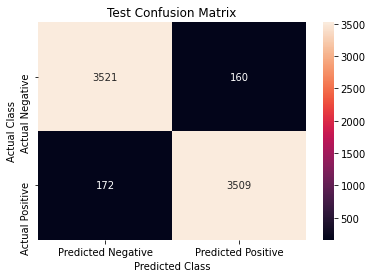

                 Predicted Negative  Predicted Positive
Actual Negative                3521                 160
Actual Positive                 172                3509


In [48]:
print("Test confusion matrix :")
cm_test_smote_normalized_svm = confusion_matrix(y_test_smote_normalized_svm, y_test_pred_smote_normalized_svm)
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_svm_df = pd.DataFrame(cm_test_smote_normalized_svm, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_svm_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_svm_df)

In [49]:
_, _, false_negative_smote_normalized_svm, true_positive_smote_normalized_svm = cm_test_smote_normalized_svm.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_svm/(false_negative_smote_normalized_svm+true_positive_smote_normalized_svm)) * 100, "%")

False Negative Rate =  4.672643303450149 %


In [51]:
print(classification_report(y_test_smote_normalized_svm, y_test_pred_smote_normalized_svm))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3681
           1       0.96      0.95      0.95      3681

    accuracy                           0.95      7362
   macro avg       0.95      0.95      0.95      7362
weighted avg       0.95      0.95      0.95      7362



## 12.3 SVM On NON-SMOTE Standardized Data

In [52]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [53]:
x_non_smote_standardized_svm = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_svm = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [54]:
# splitting into train & test set..
x_train_non_smote_standardized_svm, x_test_non_smote_standardized_svm, y_train_non_smote_standardized_svm, y_test_non_smote_standardized_svm = train_test_split(x_non_smote_standardized_svm, y_non_smote_standardized_svm, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_svm)

# splitting train set into train and cv sets..
x_train_non_smote_standardized_svm, x_cv_non_smote_standardized_svm, y_train_non_smote_standardized_svm, y_cv_non_smote_standardized_svm = train_test_split(x_train_non_smote_standardized_svm, y_train_non_smote_standardized_svm, test_size = 0.20, random_state=21, stratify=y_train_non_smote_standardized_svm)

print("len(x_train_non_smote_standardized_svm) = ", len(x_train_non_smote_standardized_svm))
print("len(y_train_non_smote_standardized_svm) = ", len(y_train_non_smote_standardized_svm))

print("\nlen(x_cv_non_smote_standardized_svm) = ", len(x_cv_non_smote_standardized_svm))
print("len(y_cv_non_smote_standardized_svm) = ", len(y_cv_non_smote_standardized_svm))

print("\nlen(x_test_non_smote_standardized_svm) = ", len(x_test_non_smote_standardized_svm))
print("len(y_test_non_smote_standardized_svm) = ", len(y_test_non_smote_standardized_svm))

len(x_train_non_smote_standardized_svm) =  15594
len(y_train_non_smote_standardized_svm) =  15594

len(x_cv_non_smote_standardized_svm) =  3899
len(y_cv_non_smote_standardized_svm) =  3899

len(x_test_non_smote_standardized_svm) =  4874
len(y_test_non_smote_standardized_svm) =  4874


In [55]:
hyper_parameter_values_svm_dict = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [56]:
svm_non_smote_standardized = SVC()
gcv_svm_non_smote_standardized = GridSearchCV(svm_non_smote_standardized, hyper_parameter_values_svm_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_svm_non_smote_standardized.fit(x_train_non_smote_standardized_svm, y_train_non_smote_standardized_svm)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [57]:
gcv_svm_non_smote_standardized.best_estimator_

SVC(C=100)

In [58]:
gcv_svm_non_smote_standardized.best_params_

{'C': 100, 'kernel': 'rbf'}

In [59]:
gcv_svm_non_smote_standardized.best_estimator_.dual_coef_

array([[ -3.88999894, -43.1278966 ,  -4.85275332, ..., 100.        ,
         70.17494063,  80.45533872]])

In [60]:
gcv_svm_non_smote_standardized.best_score_

0.9720404703650638

In [61]:
svm_non_smote_standardized = SVC(C=100, class_weight='balanced', kernel='rbf')
svm_non_smote_standardized.fit(x_train_non_smote_standardized_svm, y_train_non_smote_standardized_svm)

SVC(C=100, class_weight='balanced')

In [62]:
y_train_pred_non_smote_standardized_svm = svm_non_smote_standardized.predict(x_train_non_smote_standardized_svm)
y_test_pred_non_smote_standardized_svm = svm_non_smote_standardized.predict(x_test_non_smote_standardized_svm)


AUC_train =  0.9861795622160119
AUC_test =  0.9685423869611582


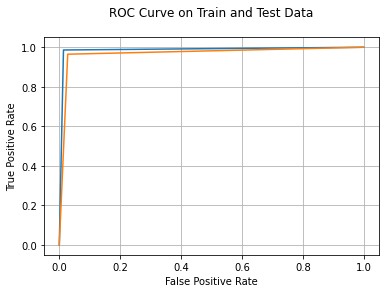

In [63]:
train_fpr_non_smote_standardized_svm, train_tpr_non_smote_standardized_svm, _ = roc_curve(y_train_non_smote_standardized_svm, y_train_pred_non_smote_standardized_svm)
test_fpr_non_smote_standardized_svm, test_tpr_non_smote_standardized_svm, _ = roc_curve(y_test_non_smote_standardized_svm, y_test_pred_non_smote_standardized_svm)

print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_svm, y_train_pred_non_smote_standardized_svm))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_svm, y_test_pred_non_smote_standardized_svm))

plt.plot(train_fpr_non_smote_standardized_svm, train_tpr_non_smote_standardized_svm, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_svm, test_tpr_non_smote_standardized_svm, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


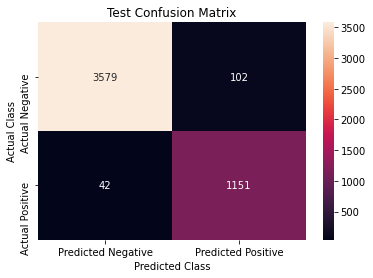

                 Predicted Negative  Predicted Positive
Actual Negative                3579                 102
Actual Positive                  42                1151


In [64]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_svm = confusion_matrix(y_test_non_smote_standardized_svm, y_test_pred_non_smote_standardized_svm)
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_svm_df = pd.DataFrame(cm_test_non_smote_standardized_svm, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_svm_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_svm_df)

In [65]:
_, _, false_negative_non_smote_standardized_svm, true_positive_non_smote_standardized_svm = cm_test_non_smote_standardized_svm.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_svm/(false_negative_non_smote_standardized_svm+true_positive_non_smote_standardized_svm)) * 100, "%")

False Negative Rate =  3.520536462699078 %


In [66]:
print(classification_report(y_test_non_smote_standardized_svm, y_test_pred_non_smote_standardized_svm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3681
           1       0.92      0.96      0.94      1193

    accuracy                           0.97      4874
   macro avg       0.95      0.97      0.96      4874
weighted avg       0.97      0.97      0.97      4874



## 12.4 SVM On NON-SMOTE Normalized Data

In [67]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [68]:
x_non_smote_normalized_svm = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_svm = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [69]:
# splitting into train & test set..
x_train_non_smote_normalized_svm, x_test_non_smote_normalized_svm, y_train_non_smote_normalized_svm, y_test_non_smote_normalized_svm = train_test_split(x_non_smote_normalized_svm, y_non_smote_normalized_svm, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_svm)

# splitting train set into train and cv sets..
x_train_non_smote_normalized_svm, x_cv_non_smote_normalized_svm, y_train_non_smote_normalized_svm, y_cv_non_smote_normalized_svm = train_test_split(x_train_non_smote_normalized_svm, y_train_non_smote_normalized_svm, test_size = 0.20, random_state=21, stratify=y_train_non_smote_normalized_svm)

print("len(x_train_non_smote_normalized_svm) = ", len(x_train_non_smote_normalized_svm))
print("len(y_train_non_smote_normalized_svm) = ", len(y_train_non_smote_normalized_svm))

print("\nlen(x_cv_non_smote_normalized_svm) = ", len(x_cv_non_smote_normalized_svm))
print("len(y_cv_non_smote_normalized_svm) = ", len(y_cv_non_smote_normalized_svm))

print("\nlen(x_test_non_smote_normalized_svm) = ", len(x_test_non_smote_normalized_svm))
print("len(y_test_non_smote_normalized_svm) = ", len(y_test_non_smote_normalized_svm))

len(x_train_non_smote_normalized_svm) =  15594
len(y_train_non_smote_normalized_svm) =  15594

len(x_cv_non_smote_normalized_svm) =  3899
len(y_cv_non_smote_normalized_svm) =  3899

len(x_test_non_smote_normalized_svm) =  4874
len(y_test_non_smote_normalized_svm) =  4874


In [70]:
hyper_parameter_values_svm_dict = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [71]:
svm_non_smote_normalized = SVC()
gcv_svm_non_smote_normalized = GridSearchCV(svm_non_smote_normalized, hyper_parameter_values_svm_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_svm_non_smote_normalized.fit(x_train_non_smote_normalized_svm, y_train_non_smote_normalized_svm)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [72]:
gcv_svm_non_smote_normalized.best_estimator_

SVC(C=100)

In [73]:
gcv_svm_non_smote_normalized.best_params_

{'C': 100, 'kernel': 'rbf'}

In [74]:
gcv_svm_non_smote_normalized.best_estimator_.dual_coef_

array([[-100.        ,  -95.52512231, -100.        , ...,  100.        ,
         100.        ,  100.        ]])

In [75]:
gcv_svm_non_smote_normalized.best_score_

0.9549826314374787

In [76]:
svm_non_smote_normalized = SVC(C=100, class_weight='balanced', kernel='rbf')
svm_non_smote_normalized.fit(x_train_non_smote_normalized_svm, y_train_non_smote_normalized_svm)

SVC(C=100, class_weight='balanced')

In [77]:
y_train_pred_non_smote_normalized_svm = svm_non_smote_normalized.predict(x_train_non_smote_normalized_svm)
y_test_pred_non_smote_normalized_svm = svm_non_smote_normalized.predict(x_test_non_smote_normalized_svm)


AUC_train =  0.9583869942365559
AUC_test =  0.9502362896120697


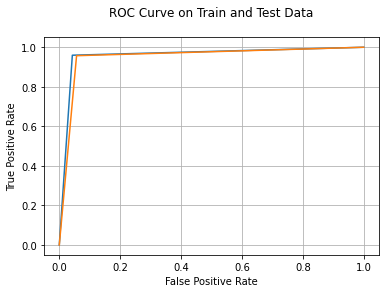

In [78]:
train_fpr_non_smote_normalized_svm, train_tpr_non_smote_normalized_svm, _ = roc_curve(y_train_non_smote_normalized_svm, y_train_pred_non_smote_normalized_svm)
test_fpr_non_smote_normalized_svm, test_tpr_non_smote_normalized_svm, _ = roc_curve(y_test_non_smote_normalized_svm, y_test_pred_non_smote_normalized_svm)

print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_svm, y_train_pred_non_smote_normalized_svm))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_svm, y_test_pred_non_smote_normalized_svm))

plt.plot(train_fpr_non_smote_normalized_svm, train_tpr_non_smote_normalized_svm, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_svm, test_tpr_non_smote_normalized_svm, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


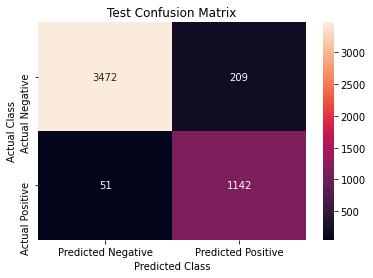

                 Predicted Negative  Predicted Positive
Actual Negative                3472                 209
Actual Positive                  51                1142


In [79]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_svm = confusion_matrix(y_test_non_smote_normalized_svm, y_test_pred_non_smote_normalized_svm)
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_svm_df = pd.DataFrame(cm_test_non_smote_normalized_svm, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_svm_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_svm_df)

In [80]:
_, _, false_negative_non_smote_normalized_svm, true_positive_non_smote_normalized_svm = cm_test_non_smote_normalized_svm.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_svm/(false_negative_non_smote_normalized_svm+true_positive_non_smote_normalized_svm)) * 100, "%")

False Negative Rate =  4.274937133277452 %


In [81]:
print(classification_report(y_test_non_smote_normalized_svm, y_test_pred_non_smote_normalized_svm))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3681
           1       0.85      0.96      0.90      1193

    accuracy                           0.95      4874
   macro avg       0.92      0.95      0.93      4874
weighted avg       0.95      0.95      0.95      4874



In [82]:
dill_dump_session('12.4_all_support_vector_machines_models_completed')

# 13 ML Algorithms 5 - Decision Trees (DT)

In [6]:
dill_load_session('12.4_all_support_vector_machines_models_completed')

## 13.1 DT On SMOTE Standardized Data

In [7]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [8]:
x_smote_standardized_dt = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_dt = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [9]:
# splitting into train & test set..
x_train_smote_standardized_dt, x_test_smote_standardized_dt, y_train_smote_standardized_dt, y_test_smote_standardized_dt = train_test_split(x_smote_standardized_dt, y_smote_standardized_dt, test_size = 0.20, random_state=21, stratify=y_smote_standardized_dt)

# splitting train set into train and cv sets..
x_train_smote_standardized_dt, x_cv_smote_standardized_dt, y_train_smote_standardized_dt, y_cv_smote_standardized_dt = train_test_split(x_train_smote_standardized_dt, y_train_smote_standardized_dt, test_size = 0.20, random_state=21, stratify=y_train_smote_standardized_dt)

print("len(x_train_smote_standardized_dt) = ", len(x_train_smote_standardized_dt))
print("len(y_train_smote_standardized_dt) = ", len(y_train_smote_standardized_dt))

print("\nlen(x_cv_smote_standardized_dt) = ", len(x_cv_smote_standardized_dt))
print("len(y_cv_smote_standardized_dt) = ", len(y_cv_smote_standardized_dt))

print("\nlen(x_test_smote_standardized_dt) = ", len(x_test_smote_standardized_dt))
print("len(y_test_smote_standardized_dt) = ", len(y_test_smote_standardized_dt))

len(x_train_smote_standardized_dt) =  23555
len(y_train_smote_standardized_dt) =  23555

len(x_cv_smote_standardized_dt) =  5889
len(y_cv_smote_standardized_dt) =  5889

len(x_test_smote_standardized_dt) =  7362
len(y_test_smote_standardized_dt) =  7362


In [10]:
hyper_parameter_values_dt_dict = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [7, 9, 11, 13, 15],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [11]:
# class_weight='balanced'

In [12]:
dt_smote_standardized = DecisionTreeClassifier()
gcv_dt_smote_standardized = GridSearchCV(dt_smote_standardized, hyper_parameter_values_dt_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_dt_smote_standardized.fit(x_train_smote_standardized_dt, y_train_smote_standardized_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15, 18],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100, 125]},
             scoring='accuracy')

In [14]:
gcv_dt_smote_standardized.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       min_samples_leaf=10)

In [19]:
gcv_dt_smote_standardized.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 10}

In [18]:
gcv_dt_smote_standardized.best_score_

0.953895139036298

In [20]:
dt_smote_standardized = DecisionTreeClassifier(criterion=gcv_dt_smote_standardized.best_params_['criterion'], 
                                                max_depth=gcv_dt_smote_standardized.best_params_['max_depth'],
                                                max_features=gcv_dt_smote_standardized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_dt_smote_standardized.best_params_['min_samples_leaf']
                                               )
dt_smote_standardized.fit(x_train_smote_standardized_dt, y_train_smote_standardized_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       min_samples_leaf=10)

In [21]:
y_train_pred_smote_standardized_dt = dt_smote_standardized.predict(x_train_smote_standardized_dt)
y_test_pred_smote_standardized_dt = dt_smote_standardized.predict(x_test_smote_standardized_dt)


AUC_train =  0.9556353441270277
AUC_test =  0.9485194240695463


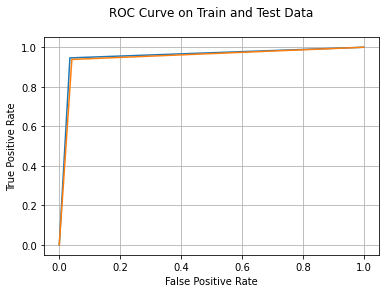

In [22]:
train_fpr_smote_standardized_dt, train_tpr_smote_standardized_dt, _ = roc_curve(y_train_smote_standardized_dt, y_train_pred_smote_standardized_dt)
test_fpr_smote_standardized_dt, test_tpr_smote_standardized_dt, _ = roc_curve(y_test_smote_standardized_dt, y_test_pred_smote_standardized_dt)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_dt, y_train_pred_smote_standardized_dt))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_dt, y_test_pred_smote_standardized_dt))

plt.plot(train_fpr_smote_standardized_dt, train_tpr_smote_standardized_dt, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_dt, test_tpr_smote_standardized_dt, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


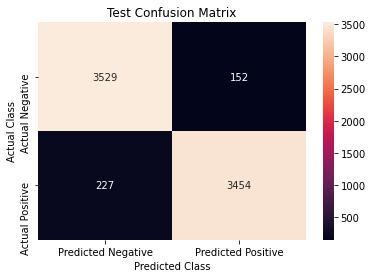

                 Predicted Negative  Predicted Positive
Actual Negative                3529                 152
Actual Positive                 227                3454


In [23]:
print("Test confusion matrix :")
cm_test_smote_standardized_dt = confusion_matrix(y_test_smote_standardized_dt, y_test_pred_smote_standardized_dt)
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_dt_df = pd.DataFrame(cm_test_smote_standardized_dt, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_dt_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_dt_df)

In [24]:
_, _, false_negative_smote_standardized_dt, true_positive_smote_standardized_dt = cm_test_smote_standardized_dt.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_dt/(false_negative_smote_standardized_dt+true_positive_smote_standardized_dt)) * 100, "%")

False Negative Rate =  6.166802499320837 %


In [25]:
print(classification_report(y_test_smote_standardized_dt, y_test_pred_smote_standardized_dt))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3681
           1       0.96      0.94      0.95      3681

    accuracy                           0.95      7362
   macro avg       0.95      0.95      0.95      7362
weighted avg       0.95      0.95      0.95      7362



In [32]:
x_smote_standardized_dt.columns

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident_False',
       'Work_accident_True', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_product_mng', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [14]:
dot_data_smote_standardized = tree.export_graphviz(dt_smote_standardized, 
                                out_file=None, 
                                feature_names=x_smote_standardized_dt.columns,
                                class_names=['0', '1'],
                                filled=True)
graph_smote_standardized = graphviz.Source(dot_data_smote_standardized, format="png") 
# graph_smote_standardized

In [15]:
graph_smote_standardized.render('D:/BITS/Semester 4/dev/save/png/decision_tree_smote_standardized')

'D:/BITS/Semester 4/dev/save/png\\decision_tree_smote_standardized.png'

In [83]:
feature_importance_smote_standardized_dt = pd.DataFrame({'Feature Importance': dt_smote_standardized.feature_importances_}, index=x_smote_standardized_dt.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_standardized_dt.head(20)

Feature Importance
satisfaction_level                0.267612
time_spend_company                0.224633
projects_worked_on                0.189787
average_montly_hours              0.138391
last_evaluation_rating            0.094926
Work_accident_True                0.025763
salary_low                        0.018377
salary_high                       0.016569
salary_medium                     0.007943
Work_accident_False               0.005724
Department_technical              0.003495
Department_product_mng            0.002463
Department_IT                     0.002016
Department_RandD                  0.001285
Department_hr                     0.000407
Department_accounting             0.000380
Department_management             0.000229

In [38]:
# dill_dump_session('13.1_working_on_dt')

In [11]:
# dill_load_session('13.1_working_on_dt')

## 13.2 DT On SMOTE Normalized Data

In [12]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [13]:
x_smote_normalized_dt = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_dt = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [16]:
# splitting into train & test set..
x_train_smote_normalized_dt, x_test_smote_normalized_dt, y_train_smote_normalized_dt, y_test_smote_normalized_dt = train_test_split(x_smote_normalized_dt, y_smote_normalized_dt, test_size = 0.20, random_state=21, stratify=y_smote_normalized_dt)

# splitting train set into train and cv sets..
x_train_smote_normalized_dt, x_cv_smote_normalized_dt, y_train_smote_normalized_dt, y_cv_smote_normalized_dt = train_test_split(x_train_smote_normalized_dt, y_train_smote_normalized_dt, test_size = 0.20, random_state=21, stratify=y_train_smote_normalized_dt)

print("len(x_train_smote_normalized_dt) = ", len(x_train_smote_normalized_dt))
print("len(y_train_smote_normalized_dt) = ", len(y_train_smote_normalized_dt))

print("\nlen(x_cv_smote_normalized_dt) = ", len(x_cv_smote_normalized_dt))
print("len(y_cv_smote_normalized_dt) = ", len(y_cv_smote_normalized_dt))

print("\nlen(x_test_smote_normalized_dt) = ", len(x_test_smote_normalized_dt))
print("len(y_test_smote_normalized_dt) = ", len(y_test_smote_normalized_dt))

len(x_train_smote_normalized_dt) =  23555
len(y_train_smote_normalized_dt) =  23555

len(x_cv_smote_normalized_dt) =  5889
len(y_cv_smote_normalized_dt) =  5889

len(x_test_smote_normalized_dt) =  7362
len(y_test_smote_normalized_dt) =  7362


In [17]:
hyper_parameter_values_dt_dict = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [7, 9, 11, 13, 15],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [18]:
dt_smote_normalized = DecisionTreeClassifier()
gcv_dt_smote_normalized = GridSearchCV(dt_smote_normalized, hyper_parameter_values_dt_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_dt_smote_normalized.fit(x_train_smote_normalized_dt, y_train_smote_normalized_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100]},
             scoring='accuracy')

In [19]:
gcv_dt_smote_normalized.best_estimator_

DecisionTreeClassifier(max_depth=13, max_features='auto', min_samples_leaf=10)

In [20]:
gcv_dt_smote_normalized.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'min_samples_leaf': 10}

In [21]:
gcv_dt_smote_normalized.best_score_

0.952876247081299

In [22]:
dt_smote_normalized = DecisionTreeClassifier(criterion=gcv_dt_smote_normalized.best_params_['criterion'], 
                                                max_depth=gcv_dt_smote_normalized.best_params_['max_depth'],
                                                max_features=gcv_dt_smote_normalized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_dt_smote_normalized.best_params_['min_samples_leaf']
                                               )
dt_smote_normalized.fit(x_train_smote_normalized_dt, y_train_smote_normalized_dt)

DecisionTreeClassifier(max_depth=13, max_features='auto', min_samples_leaf=10)

In [23]:
y_train_pred_smote_normalized_dt = dt_smote_normalized.predict(x_train_smote_normalized_dt)
y_test_pred_smote_normalized_dt = dt_smote_normalized.predict(x_test_smote_normalized_dt)

In [24]:
train_fpr_smote_normalized_dt, train_tpr_smote_normalized_dt, _ = roc_curve(y_train_smote_normalized_dt, y_train_pred_smote_normalized_dt)
test_fpr_smote_normalized_dt, test_tpr_smote_normalized_dt, _ = roc_curve(y_test_smote_normalized_dt, y_test_pred_smote_normalized_dt)


AUC_train =  0.9570360556254883
AUC_test =  0.9511002444987776


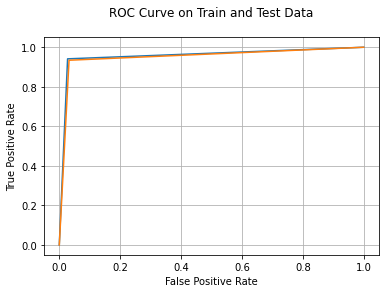

In [25]:
print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_dt, y_train_pred_smote_normalized_dt))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_dt, y_test_pred_smote_normalized_dt))

plt.plot(train_fpr_smote_normalized_dt, train_tpr_smote_normalized_dt, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_dt, test_tpr_smote_normalized_dt, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


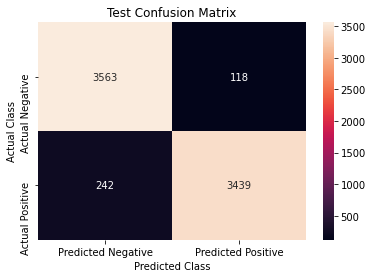

                 Predicted Negative  Predicted Positive
Actual Negative                3563                 118
Actual Positive                 242                3439


In [26]:
print("Test confusion matrix :")
cm_test_smote_normalized_dt = confusion_matrix(y_test_smote_normalized_dt, y_test_pred_smote_normalized_dt)
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_dt_df = pd.DataFrame(cm_test_smote_normalized_dt, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_dt_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_dt_df)

In [27]:
_, _, false_negative_smote_normalized_dt, true_positive_smote_normalized_dt = cm_test_smote_normalized_dt.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_dt/(false_negative_smote_normalized_dt+true_positive_smote_normalized_dt)) * 100, "%")

False Negative Rate =  6.574300461831024 %


In [28]:
x_smote_normalized_dt.columns
dot_data_smote_normalized = tree.export_graphviz(dt_smote_normalized, 
                                out_file=None, 
                                feature_names=x_smote_normalized_dt.columns,
                                class_names=['0', '1'],
                                filled=True)
graph_smote_normalized = graphviz.Source(dot_data_smote_normalized, format="png") 
# graph_smote_normalized
graph_smote_normalized.render('D:/BITS/Semester 4/dev/save/png/decision_tree_smote_normalized')

'D:/BITS/Semester 4/dev/save/png\\decision_tree_smote_normalized.png'

In [84]:
feature_importance_smote_normalized_dt = pd.DataFrame({'Feature Importance': dt_smote_normalized.feature_importances_}, index=x_smote_normalized_dt.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_normalized_dt.head(20)

Feature Importance
satisfaction_level                0.313004
projects_worked_on                0.195880
average_montly_hours              0.172043
time_spend_company                0.124645
last_evaluation_rating            0.117548
salary_high                       0.026762
salary_low                        0.017686
Work_accident_True                0.012927
Work_accident_False               0.008628
salary_medium                     0.003369
Department_hr                     0.002031
Department_management             0.001994
Department_technical              0.001741
Department_accounting             0.001284
Department_product_mng            0.000386
Department_RandD                  0.000061
Department_IT                     0.000011

## 13.3 DT On NON-SMOTE Standardized Data

In [29]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [30]:
x_non_smote_standardized_dt = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_dt = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [31]:
# splitting into train & test set..
x_train_non_smote_standardized_dt, x_test_non_smote_standardized_dt, y_train_non_smote_standardized_dt, y_test_non_smote_standardized_dt = train_test_split(x_non_smote_standardized_dt, y_non_smote_standardized_dt, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_dt)

# splitting train set into train and cv sets..
x_train_non_smote_standardized_dt, x_cv_non_smote_standardized_dt, y_train_non_smote_standardized_dt, y_cv_non_smote_standardized_dt = train_test_split(x_train_non_smote_standardized_dt, y_train_non_smote_standardized_dt, test_size = 0.20, random_state=21, stratify=y_train_non_smote_standardized_dt)

print("len(x_train_non_smote_standardized_dt) = ", len(x_train_non_smote_standardized_dt))
print("len(y_train_non_smote_standardized_dt) = ", len(y_train_non_smote_standardized_dt))

print("\nlen(x_cv_non_smote_standardized_dt) = ", len(x_cv_non_smote_standardized_dt))
print("len(y_cv_non_smote_standardized_dt) = ", len(y_cv_non_smote_standardized_dt))

print("\nlen(x_test_non_smote_standardized_dt) = ", len(x_test_non_smote_standardized_dt))
print("len(y_test_non_smote_standardized_dt) = ", len(y_test_non_smote_standardized_dt))

len(x_train_non_smote_standardized_dt) =  15594
len(y_train_non_smote_standardized_dt) =  15594

len(x_cv_non_smote_standardized_dt) =  3899
len(y_cv_non_smote_standardized_dt) =  3899

len(x_test_non_smote_standardized_dt) =  4874
len(y_test_non_smote_standardized_dt) =  4874


In [32]:
hyper_parameter_values_dt_dict = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [7, 9, 11, 13, 15],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [33]:
dt_non_smote_standardized = DecisionTreeClassifier()
gcv_dt_non_smote_standardized = GridSearchCV(dt_non_smote_standardized, hyper_parameter_values_dt_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_dt_non_smote_standardized.fit(x_train_non_smote_standardized_dt, y_train_non_smote_standardized_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100]},
             scoring='accuracy')

In [34]:
gcv_dt_non_smote_standardized.best_estimator_

DecisionTreeClassifier(max_depth=13, max_features='log2', min_samples_leaf=10)

In [35]:
gcv_dt_non_smote_standardized.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 10}

In [36]:
gcv_dt_non_smote_standardized.best_score_

0.9639600322548736

In [43]:
dt_non_smote_standardized = DecisionTreeClassifier(criterion=gcv_dt_non_smote_standardized.best_params_['criterion'], 
                                                max_depth=gcv_dt_non_smote_standardized.best_params_['max_depth'],
                                                max_features=gcv_dt_non_smote_standardized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_dt_non_smote_standardized.best_params_['min_samples_leaf'],
                                                class_weight='balanced'
                                               )
dt_non_smote_standardized.fit(x_train_non_smote_standardized_dt, y_train_non_smote_standardized_dt)

DecisionTreeClassifier(class_weight='balanced', max_depth=13,
                       max_features='log2', min_samples_leaf=10)

In [44]:
y_train_pred_non_smote_standardized_dt = dt_non_smote_standardized.predict(x_train_non_smote_standardized_dt)
y_test_pred_non_smote_standardized_dt = dt_non_smote_standardized.predict(x_test_non_smote_standardized_dt)

In [45]:
train_fpr_non_smote_standardized_dt, train_tpr_non_smote_standardized_dt, _ = roc_curve(y_train_non_smote_standardized_dt, y_train_pred_non_smote_standardized_dt)
test_fpr_non_smote_standardized_dt, test_tpr_non_smote_standardized_dt, _ = roc_curve(y_test_non_smote_standardized_dt, y_test_pred_non_smote_standardized_dt)

In [46]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_dt, y_train_pred_non_smote_standardized_dt))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_dt, y_test_pred_non_smote_standardized_dt))


AUC_train =  0.9516933635893589
AUC_test =  0.9477842426378815


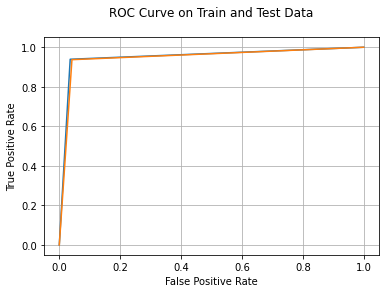

In [47]:
plt.plot(train_fpr_non_smote_standardized_dt, train_tpr_non_smote_standardized_dt, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_dt, test_tpr_non_smote_standardized_dt, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


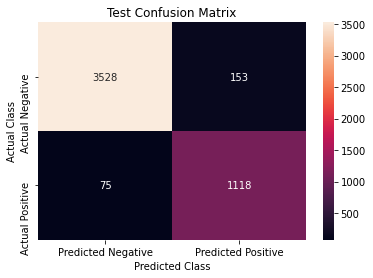

                 Predicted Negative  Predicted Positive
Actual Negative                3528                 153
Actual Positive                  75                1118


In [48]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_dt = confusion_matrix(y_test_non_smote_standardized_dt, y_test_pred_non_smote_standardized_dt)
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_dt_df = pd.DataFrame(cm_test_non_smote_standardized_dt, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_dt_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_dt_df)

In [49]:
_, _, false_negative_non_smote_standardized_dt, true_positive_non_smote_standardized_dt = cm_test_non_smote_standardized_dt.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_dt/(false_negative_non_smote_standardized_dt+true_positive_non_smote_standardized_dt)) * 100, "%")

False Negative Rate =  6.286672254819782 %


In [50]:
print(x_non_smote_standardized_dt.columns)

dot_data_non_smote_standardized = tree.export_graphviz(dt_non_smote_standardized, 
                                out_file=None, 
                                feature_names=x_non_smote_standardized_dt.columns,
                                class_names=['0', '1'],
                                filled=True)
graph_non_smote_standardized = graphviz.Source(dot_data_non_smote_standardized, format="png") 
# graph_non_smote_standardized

graph_non_smote_standardized.render('D:/BITS/Semester 4/dev/save/png/decision_tree_non_smote_standardized')

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident_False',
       'Work_accident_True', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_product_mng', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')


'D:/BITS/Semester 4/dev/save/png\\decision_tree_non_smote_standardized.png'

In [85]:
feature_importance_non_smote_standardized_dt = pd.DataFrame({'Feature Importance': dt_non_smote_standardized.feature_importances_}, index=x_non_smote_standardized_dt.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_standardized_dt.head(20)

Feature Importance
satisfaction_level                0.257053
last_evaluation_rating            0.232528
time_spend_company                0.192383
projects_worked_on                0.163886
average_montly_hours              0.096887
Work_accident_True                0.024548
salary_low                        0.011625
Work_accident_False               0.010852
salary_medium                     0.002846
Department_technical              0.001413
Department_IT                     0.001161
Department_hr                     0.001145
Department_product_mng            0.001016
Department_accounting             0.000975
salary_high                       0.000972
Department_management             0.000380
Department_RandD                  0.000330

## 13.4 DT On NON-SMOTE Normalized Data

In [51]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [52]:
x_non_smote_normalized_dt = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_dt = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [53]:
# splitting into train & test set..
x_train_non_smote_normalized_dt, x_test_non_smote_normalized_dt, y_train_non_smote_normalized_dt, y_test_non_smote_normalized_dt = train_test_split(x_non_smote_normalized_dt, y_non_smote_normalized_dt, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_dt)

# splitting train set into train and cv sets..
x_train_non_smote_normalized_dt, x_cv_non_smote_normalized_dt, y_train_non_smote_normalized_dt, y_cv_non_smote_normalized_dt = train_test_split(x_train_non_smote_normalized_dt, y_train_non_smote_normalized_dt, test_size = 0.20, random_state=21, stratify=y_train_non_smote_normalized_dt)

print("len(x_train_non_smote_normalized_dt) = ", len(x_train_non_smote_normalized_dt))
print("len(y_train_non_smote_normalized_dt) = ", len(y_train_non_smote_normalized_dt))

print("\nlen(x_cv_non_smote_normalized_dt) = ", len(x_cv_non_smote_normalized_dt))
print("len(y_cv_non_smote_normalized_dt) = ", len(y_cv_non_smote_normalized_dt))

print("\nlen(x_test_non_smote_normalized_dt) = ", len(x_test_non_smote_normalized_dt))
print("len(y_test_non_smote_normalized_dt) = ", len(y_test_non_smote_normalized_dt))

len(x_train_non_smote_normalized_dt) =  15594
len(y_train_non_smote_normalized_dt) =  15594

len(x_cv_non_smote_normalized_dt) =  3899
len(y_cv_non_smote_normalized_dt) =  3899

len(x_test_non_smote_normalized_dt) =  4874
len(y_test_non_smote_normalized_dt) =  4874


In [54]:
hyper_parameter_values_dt_dict = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [7, 9, 11, 13, 15],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [55]:
dt_non_smote_normalized = DecisionTreeClassifier()
gcv_dt_non_smote_normalized = GridSearchCV(dt_non_smote_normalized, hyper_parameter_values_dt_dict, cv=5, scoring="accuracy", n_jobs=12)
gcv_dt_non_smote_normalized.fit(x_train_non_smote_normalized_dt, y_train_non_smote_normalized_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 9, 11, 13, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100]},
             scoring='accuracy')

In [56]:
gcv_dt_non_smote_normalized.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=10)

In [57]:
gcv_dt_non_smote_normalized.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 10}

In [58]:
gcv_dt_non_smote_normalized.best_score_

0.9647936327678585

In [59]:
dt_non_smote_normalized = DecisionTreeClassifier(criterion=gcv_dt_non_smote_normalized.best_params_['criterion'], 
                                                max_depth=gcv_dt_non_smote_normalized.best_params_['max_depth'],
                                                max_features=gcv_dt_non_smote_normalized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_dt_non_smote_normalized.best_params_['min_samples_leaf'],
                                                class_weight='balanced'
                                               )
dt_non_smote_normalized.fit(x_train_non_smote_normalized_dt, y_train_non_smote_normalized_dt)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='auto', min_samples_leaf=10)

In [60]:
y_train_pred_non_smote_normalized_dt = dt_non_smote_normalized.predict(x_train_non_smote_normalized_dt)
y_test_pred_non_smote_normalized_dt = dt_non_smote_normalized.predict(x_test_non_smote_normalized_dt)

In [61]:
train_fpr_non_smote_normalized_dt, train_tpr_non_smote_normalized_dt, _ = roc_curve(y_train_non_smote_normalized_dt, y_train_pred_non_smote_normalized_dt)
test_fpr_non_smote_normalized_dt, test_tpr_non_smote_normalized_dt, _ = roc_curve(y_test_non_smote_normalized_dt, y_test_pred_non_smote_normalized_dt)


AUC_train =  0.9507464928387457
AUC_test =  0.9488779630703691


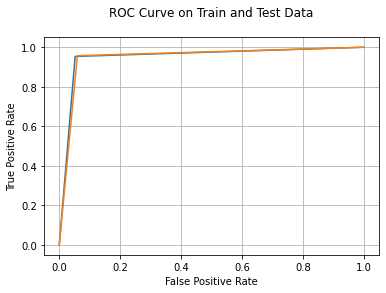

In [62]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_dt, y_train_pred_non_smote_normalized_dt))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_dt, y_test_pred_non_smote_normalized_dt))

plt.plot(train_fpr_non_smote_normalized_dt, train_tpr_non_smote_normalized_dt, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_dt, test_tpr_non_smote_normalized_dt, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


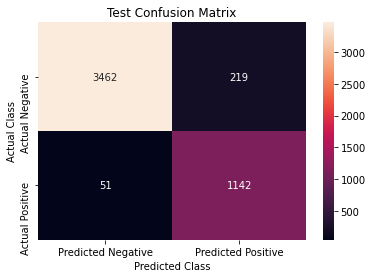

                 Predicted Negative  Predicted Positive
Actual Negative                3462                 219
Actual Positive                  51                1142


In [63]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_dt = confusion_matrix(y_test_non_smote_normalized_dt, y_test_pred_non_smote_normalized_dt)
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_dt_df = pd.DataFrame(cm_test_non_smote_normalized_dt, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_dt_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_dt_df)

In [64]:
_, _, false_negative_non_smote_normalized_dt, true_positive_non_smote_normalized_dt = cm_test_non_smote_normalized_dt.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_dt/(false_negative_non_smote_normalized_dt+true_positive_non_smote_normalized_dt)) * 100, "%")

False Negative Rate =  4.274937133277452 %


In [65]:
print(x_non_smote_normalized_dt.columns)

dot_data_non_smote_normalized = tree.export_graphviz(dt_non_smote_normalized, 
                                out_file=None, 
                                feature_names=x_non_smote_normalized_dt.columns,
                                class_names=['0', '1'],
                                filled=True)
graph_non_smote_normalized = graphviz.Source(dot_data_non_smote_normalized, format="png") 
# graph_non_smote_normalized

graph_non_smote_normalized.render('D:/BITS/Semester 4/dev/save/png/decision_tree_non_smote_normalized')

Index(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident_False',
       'Work_accident_True', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_product_mng', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')


'D:/BITS/Semester 4/dev/save/png\\decision_tree_non_smote_normalized.png'

In [82]:
feature_importance_non_smote_normalized_dt = pd.DataFrame({'Feature Importance': dt_non_smote_normalized.feature_importances_}, index=x_non_smote_normalized_dt.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_normalized_dt.head(20)

Feature Importance
satisfaction_level                0.448294
time_spend_company                0.238392
last_evaluation_rating            0.106707
projects_worked_on                0.082467
average_montly_hours              0.061047
Work_accident_True                0.035423
salary_high                       0.008396
salary_low                        0.004518
Department_IT                     0.002752
Department_technical              0.002495
Department_hr                     0.002373
salary_medium                     0.002359
Department_product_mng            0.002162
Department_accounting             0.001493
Department_RandD                  0.000641
Department_management             0.000480
Work_accident_False               0.000000

In [66]:
dill_dump_session('13.4_all_decision_trees_models_completed')

# 14 ML Algorithms 6 - Random Forests (RF)

In [4]:
dill_load_session('13.4_all_decision_trees_models_completed')

## 14.1 RF On SMOTE Standardized Data

In [5]:
print(smote_standardized_df.shape)
smote_standardized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.650398               -1.043105           -0.794017   
1            0.922208                0.790263            1.179817   
2           -1.661359                0.901376            2.495706   
3           -0.687841               -1.098661           -0.794017   
4           -0.538069               -1.209775           -0.794017   
5           -1.698802                0.290254            1.837761   
6            1.371524                0.734707            1.179817   
7            1.259195                1.568056            1.179817   
8           -0.500626               -1.043105           -0.794017   
9           -1.661359                0.512480            1.837761   

   average_montly_hours  time_spend_company  Work_accident_False  \
0             -0.746049           -0.463423                    1   
1              1.183887            2.265659                    1   
2              1.367691            0.446271                    1   
3             -0.709288           -0.463423                    1   
4             -0.819570           -0.463423                    1   
5              0.908182            0.446271                    1   
6              1.128746            1.355965                    1   
7              0.485434            1.355965                    1   
8             -1.021754           -0.463423                    1   
9              1.974242            0.446271                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [6]:
x_smote_standardized_rf = smote_standardized_df.loc[:, smote_standardized_df.columns != 'Attrition']
y_smote_standardized_rf = smote_standardized_df.loc[:, smote_standardized_df.columns == 'Attrition']

In [7]:
# splitting into train & test set..
x_train_smote_standardized_rf, x_test_smote_standardized_rf, y_train_smote_standardized_rf, y_test_smote_standardized_rf = train_test_split(x_smote_standardized_rf, y_smote_standardized_rf, test_size = 0.20, random_state=21, stratify=y_smote_standardized_rf)

# splitting train set into train and cv sets..
x_train_smote_standardized_rf, x_cv_smote_standardized_rf, y_train_smote_standardized_rf, y_cv_smote_standardized_rf = train_test_split(x_train_smote_standardized_rf, y_train_smote_standardized_rf, test_size = 0.20, random_state=21, stratify=y_train_smote_standardized_rf)

print("len(x_train_smote_standardized_rf) = ", len(x_train_smote_standardized_rf))
print("len(y_train_smote_standardized_rf) = ", len(y_train_smote_standardized_rf))

print("\nlen(x_cv_smote_standardized_rf) = ", len(x_cv_smote_standardized_rf))
print("len(y_cv_smote_standardized_rf) = ", len(y_cv_smote_standardized_rf))

print("\nlen(x_test_smote_standardized_rf) = ", len(x_test_smote_standardized_rf))
print("len(y_test_smote_standardized_rf) = ", len(y_test_smote_standardized_rf))

len(x_train_smote_standardized_rf) =  23555
len(y_train_smote_standardized_rf) =  23555

len(x_cv_smote_standardized_rf) =  5889
len(y_cv_smote_standardized_rf) =  5889

len(x_test_smote_standardized_rf) =  7362
len(y_test_smote_standardized_rf) =  7362


In [10]:
hyper_parameter_values_rf_dict = {
    'n_estimators' : [x for x in range(75, 80)],
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2'],
#     'n_jobs' : 12,
#     'random_state' : 21
}
# class_weight='balanced'

In [11]:
rf_smote_standardized = RandomForestClassifier()
gcv_rf_smote_standardized = GridSearchCV(rf_smote_standardized, hyper_parameter_values_rf_dict, cv=3, scoring="accuracy", n_jobs=12, verbose=5)
gcv_rf_smote_standardized.fit(x_train_smote_standardized_rf, y_train_smote_standardized_rf)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100],
                         'n_estimators': [75, 76, 77, 78, 79]},
             scoring='accuracy', verbose=5)

In [16]:
gcv_rf_smote_standardized.best_estimator_

RandomForestClassifier(max_depth=11, max_features='log2', min_samples_leaf=10,
                       n_estimators=79)

In [17]:
gcv_rf_smote_standardized.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'n_estimators': 79}

In [18]:
gcv_rf_smote_standardized.best_score_

0.9587773385174231

In [20]:
# gcv_rf_smote_standardized.cv_results_['mean_train_score']

In [21]:
# gcv_rf_smote_standardized.cv_results_['mean_test_score']

In [22]:
rf_smote_standardized = RandomForestClassifier(n_estimators=gcv_rf_smote_standardized.best_params_['n_estimators'],
                                                criterion=gcv_rf_smote_standardized.best_params_['criterion'], 
                                                max_depth=gcv_rf_smote_standardized.best_params_['max_depth'],
                                                max_features=gcv_rf_smote_standardized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_rf_smote_standardized.best_params_['min_samples_leaf'],
                                                n_jobs=12
                                               )
rf_smote_standardized.fit(x_train_smote_standardized_rf, y_train_smote_standardized_rf)

RandomForestClassifier(max_depth=11, max_features='log2', min_samples_leaf=10,
                       n_estimators=79, n_jobs=12)

In [23]:
y_train_pred_smote_standardized_rf = rf_smote_standardized.predict(x_train_smote_standardized_rf)
y_test_pred_smote_standardized_rf = rf_smote_standardized.predict(x_test_smote_standardized_rf)


AUC_train =  0.9644648975968524
AUC_test =  0.9599293670198316


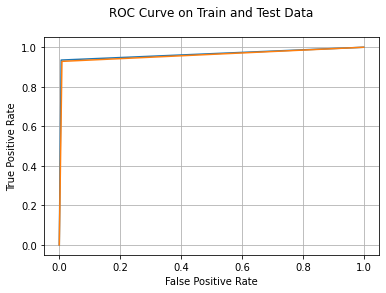

In [24]:
train_fpr_smote_standardized_rf, train_tpr_smote_standardized_rf, _ = roc_curve(y_train_smote_standardized_rf, y_train_pred_smote_standardized_rf)
test_fpr_smote_standardized_rf, test_tpr_smote_standardized_rf, _ = roc_curve(y_test_smote_standardized_rf, y_test_pred_smote_standardized_rf)

print("\nAUC_train = ", roc_auc_score(y_train_smote_standardized_rf, y_train_pred_smote_standardized_rf))
print("AUC_test = ", roc_auc_score(y_test_smote_standardized_rf, y_test_pred_smote_standardized_rf))

plt.plot(train_fpr_smote_standardized_rf, train_tpr_smote_standardized_rf, label = 'Train Data')
plt.plot(test_fpr_smote_standardized_rf, test_tpr_smote_standardized_rf, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


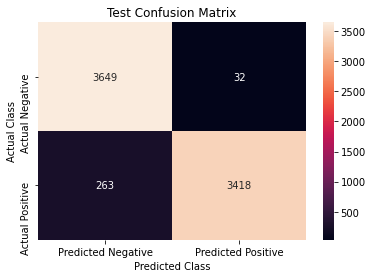

                 Predicted Negative  Predicted Positive
Actual Negative                3649                  32
Actual Positive                 263                3418


In [25]:
print("Test confusion matrix :")
cm_test_smote_standardized_rf = confusion_matrix(y_test_smote_standardized_rf, y_test_pred_smote_standardized_rf)
index_label_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_standardized_rf_df = pd.DataFrame(cm_test_smote_standardized_rf, index=index_label_smote_standardized, columns=column_label_smote_standardized)
sns.heatmap(cm_test_smote_standardized_rf_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_standardized_rf_df)

In [26]:
_, _, false_negative_smote_standardized_rf, true_positive_smote_standardized_rf = cm_test_smote_standardized_rf.ravel()
print("False Negative Rate = ", (false_negative_smote_standardized_rf/(false_negative_smote_standardized_rf+true_positive_smote_standardized_rf)) * 100, "%")

False Negative Rate =  7.144797609345287 %


In [27]:
print(classification_report(y_test_smote_standardized_rf, y_test_pred_smote_standardized_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3681
           1       0.99      0.93      0.96      3681

    accuracy                           0.96      7362
   macro avg       0.96      0.96      0.96      7362
weighted avg       0.96      0.96      0.96      7362



In [29]:
feature_importance_smote_standardized_rf = pd.DataFrame({'Feature Importance': rf_smote_standardized.feature_importances_}, index=x_smote_standardized_rf.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_standardized_rf.head(20)

Feature Importance
satisfaction_level                0.330276
time_spend_company                0.262020
average_montly_hours              0.138727
last_evaluation_rating            0.131266
projects_worked_on                0.090538
Work_accident_True                0.020524
salary_high                       0.007765
Work_accident_False               0.006548
salary_low                        0.004023
salary_medium                     0.003654
Department_RandD                  0.001195
Department_technical              0.001107
Department_IT                     0.000820
Department_product_mng            0.000511
Department_management             0.000462
Department_accounting             0.000312
Department_hr                     0.000252

## 14.2 RF On SMOTE Normalized Data

In [30]:
print(smote_normalized_df.shape)
smote_normalized_df.head(10)

(36806, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Work_accident_False  \
0              0.316964                 0.2                    1   
1              0.785714                 0.8                    1   
2              0.830357                 0.4                    1   
3              0.325893                 0.2                    1   
4              0.299107                 0.2                    1   
5              0.718750                 0.4                    1   
6              0.772321                 0.6                    1   
7              0.616071                 0.6                    1   
8              0.250000                 0.2                    1   
9              0.977679                 0.4                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  Attrition  
0                     0            0           1              0          1  
1                     0            0           0              1          1  
2                     0            0           0              1          1  
3                     0            0           1              0          1  
4                     0            0           1              0          1  
5                     0            0           1              0          1  
6                     0            0           1              0          1  
7                     0            0           1              0          1  
8                     0            0           1              0          1  
9                     0            0           1              0          1

In [31]:
x_smote_normalized_rf = smote_normalized_df.loc[:, smote_normalized_df.columns != 'Attrition']
y_smote_normalized_rf = smote_normalized_df.loc[:, smote_normalized_df.columns == 'Attrition']

In [32]:
# splitting into train & test set..
x_train_smote_normalized_rf, x_test_smote_normalized_rf, y_train_smote_normalized_rf, y_test_smote_normalized_rf = train_test_split(x_smote_normalized_rf, y_smote_normalized_rf, test_size = 0.20, random_state=21, stratify=y_smote_normalized_rf)

# splitting train set into train and cv sets..
x_train_smote_normalized_rf, x_cv_smote_normalized_rf, y_train_smote_normalized_rf, y_cv_smote_normalized_rf = train_test_split(x_train_smote_normalized_rf, y_train_smote_normalized_rf, test_size = 0.20, random_state=21, stratify=y_train_smote_normalized_rf)

print("len(x_train_smote_normalized_rf) = ", len(x_train_smote_normalized_rf))
print("len(y_train_smote_normalized_rf) = ", len(y_train_smote_normalized_rf))

print("\nlen(x_cv_smote_normalized_rf) = ", len(x_cv_smote_normalized_rf))
print("len(y_cv_smote_normalized_rf) = ", len(y_cv_smote_normalized_rf))

print("\nlen(x_test_smote_normalized_rf) = ", len(x_test_smote_normalized_rf))
print("len(y_test_smote_normalized_rf) = ", len(y_test_smote_normalized_rf))

len(x_train_smote_normalized_rf) =  23555
len(y_train_smote_normalized_rf) =  23555

len(x_cv_smote_normalized_rf) =  5889
len(y_cv_smote_normalized_rf) =  5889

len(x_test_smote_normalized_rf) =  7362
len(y_test_smote_normalized_rf) =  7362


In [33]:
hyper_parameter_values_rf_dict = {
    'n_estimators' : [x for x in range(75, 86)],
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [10, 25, 50, 75, 100, 125],
    'max_features' : ['auto', 'sqrt', 'log2'],
}

In [34]:
# class_weight='balanced'

In [35]:
rf_smote_normalized = RandomForestClassifier()
gcv_rf_smote_normalized = GridSearchCV(rf_smote_normalized, hyper_parameter_values_rf_dict, cv=3, scoring="accuracy", n_jobs=12, verbose=4)
gcv_rf_smote_normalized.fit(x_train_smote_normalized_rf, y_train_smote_normalized_rf)

Fitting 3 folds for each of 1980 candidates, totalling 5940 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100, 125],
                         'n_estimators': [75, 76, 77, 78, 79, 80, 81, 82, 83,
                                          84, 85]},
             scoring='accuracy', verbose=4)

In [36]:
gcv_rf_smote_normalized.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=10, n_estimators=81)

In [37]:
gcv_rf_smote_normalized.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 81}

In [38]:
gcv_rf_smote_normalized.best_score_

0.958607541215021

In [39]:
rf_smote_normalized = RandomForestClassifier(n_estimators=gcv_rf_smote_normalized.best_params_['n_estimators'],
                                                criterion=gcv_rf_smote_normalized.best_params_['criterion'], 
                                                max_depth=gcv_rf_smote_normalized.best_params_['max_depth'],
                                                max_features=gcv_rf_smote_normalized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_rf_smote_normalized.best_params_['min_samples_leaf'],
                                                n_jobs=12
                                               )
rf_smote_normalized.fit(x_train_smote_normalized_rf, y_train_smote_normalized_rf)

RandomForestClassifier(max_depth=11, min_samples_leaf=10, n_estimators=81,
                       n_jobs=12)

In [40]:
y_train_pred_smote_normalized_rf = rf_smote_normalized.predict(x_train_smote_normalized_rf)
y_test_pred_smote_normalized_rf = rf_smote_normalized.predict(x_test_smote_normalized_rf)

In [41]:
train_fpr_smote_normalized_rf, train_tpr_smote_normalized_rf, _ = roc_curve(y_train_smote_normalized_rf, y_train_pred_smote_normalized_rf)
test_fpr_smote_normalized_rf, test_tpr_smote_normalized_rf, _ = roc_curve(y_test_smote_normalized_rf, y_test_pred_smote_normalized_rf)


AUC_train =  0.9646347237369586
AUC_test =  0.9616951915240425


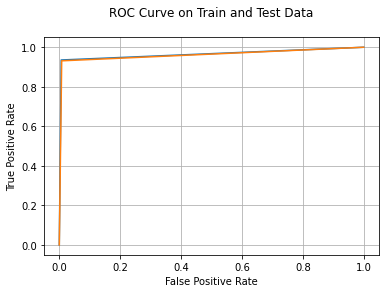

In [42]:
print("\nAUC_train = ", roc_auc_score(y_train_smote_normalized_rf, y_train_pred_smote_normalized_rf))
print("AUC_test = ", roc_auc_score(y_test_smote_normalized_rf, y_test_pred_smote_normalized_rf))

plt.plot(train_fpr_smote_normalized_rf, train_tpr_smote_normalized_rf, label = 'Train Data')
plt.plot(test_fpr_smote_normalized_rf, test_tpr_smote_normalized_rf, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


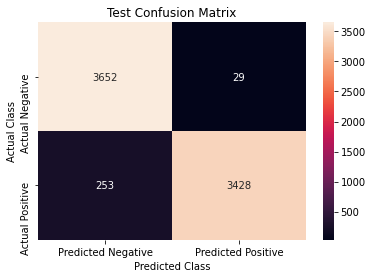

                 Predicted Negative  Predicted Positive
Actual Negative                3652                  29
Actual Positive                 253                3428


In [43]:
print("Test confusion matrix :")
cm_test_smote_normalized_rf = confusion_matrix(y_test_smote_normalized_rf, y_test_pred_smote_normalized_rf)
index_label_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_smote_normalized_rf_df = pd.DataFrame(cm_test_smote_normalized_rf, index=index_label_smote_normalized, columns=column_label_smote_normalized)
sns.heatmap(cm_test_smote_normalized_rf_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_smote_normalized_rf_df)

In [44]:
_, _, false_negative_smote_normalized_rf, true_positive_smote_normalized_rf = cm_test_smote_normalized_rf.ravel()
print("False Negative Rate = ", (false_negative_smote_normalized_rf/(false_negative_smote_normalized_rf+true_positive_smote_normalized_rf)) * 100, "%")

False Negative Rate =  6.873132301005162 %


In [45]:
print(classification_report(y_test_smote_normalized_rf, y_test_pred_smote_normalized_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3681
           1       0.99      0.93      0.96      3681

    accuracy                           0.96      7362
   macro avg       0.96      0.96      0.96      7362
weighted avg       0.96      0.96      0.96      7362



In [47]:
feature_importance_smote_normalized_rf = pd.DataFrame({'Feature Importance': rf_smote_normalized.feature_importances_}, index=x_smote_normalized_rf.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_smote_normalized_rf.head(20)

Feature Importance
satisfaction_level                0.348553
time_spend_company                0.275848
last_evaluation_rating            0.135501
average_montly_hours              0.113865
projects_worked_on                0.078014
Work_accident_True                0.017181
salary_high                       0.009139
Work_accident_False               0.008499
salary_low                        0.005226
salary_medium                     0.003296
Department_RandD                  0.001530
Department_technical              0.001291
Department_management             0.000703
Department_IT                     0.000526
Department_product_mng            0.000437
Department_hr                     0.000222
Department_accounting             0.000168

## 14.3 RF On NON-SMOTE Standardized Data

In [48]:
print(non_smote_standardized_df.shape)
non_smote_standardized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0           -0.925780               -1.090248           -0.914378   
1            0.754786                0.835726            1.336042   
2           -2.006143                0.952452            2.836322   
3           -0.965793               -1.148610           -0.914378   
4           -0.805739               -1.265336           -0.914378   
5           -2.046156                0.310461            2.086182   
6            1.234947                0.777363            1.336042   
7            1.114907                1.652806            1.336042   
8           -0.765726               -1.090248           -0.914378   
9           -2.006143                0.543912            2.086182   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0             -0.764155           -0.303931          1                    1   
1              1.324454            2.322891          1                    1   
2              1.523369            0.571676          1                    1   
3             -0.724372           -0.303931          1                    1   
4             -0.843721           -0.303931          1                    1   
5              1.026081            0.571676          1                    1   
6              1.264780            1.447284          1                    1   
7              0.568576            1.447284          1                    1   
8             -1.062528           -0.303931          1                    1   
9              2.179789            0.571676          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [49]:
x_non_smote_standardized_rf = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns != 'Attrition']
y_non_smote_standardized_rf = non_smote_standardized_df.loc[:, non_smote_standardized_df.columns == 'Attrition']

In [50]:
# splitting into train & test set..
x_train_non_smote_standardized_rf, x_test_non_smote_standardized_rf, y_train_non_smote_standardized_rf, y_test_non_smote_standardized_rf = train_test_split(x_non_smote_standardized_rf, y_non_smote_standardized_rf, test_size = 0.20, random_state=21, stratify=y_non_smote_standardized_rf)

# splitting train set into train and cv sets..
x_train_non_smote_standardized_rf, x_cv_non_smote_standardized_rf, y_train_non_smote_standardized_rf, y_cv_non_smote_standardized_rf = train_test_split(x_train_non_smote_standardized_rf, y_train_non_smote_standardized_rf, test_size = 0.20, random_state=21, stratify=y_train_non_smote_standardized_rf)

print("len(x_train_non_smote_standardized_rf) = ", len(x_train_non_smote_standardized_rf))
print("len(y_train_non_smote_standardized_rf) = ", len(y_train_non_smote_standardized_rf))

print("\nlen(x_cv_non_smote_standardized_rf) = ", len(x_cv_non_smote_standardized_rf))
print("len(y_cv_non_smote_standardized_rf) = ", len(y_cv_non_smote_standardized_rf))

print("\nlen(x_test_non_smote_standardized_rf) = ", len(x_test_non_smote_standardized_rf))
print("len(y_test_non_smote_standardized_rf) = ", len(y_test_non_smote_standardized_rf))

len(x_train_non_smote_standardized_rf) =  15594
len(y_train_non_smote_standardized_rf) =  15594

len(x_cv_non_smote_standardized_rf) =  3899
len(y_cv_non_smote_standardized_rf) =  3899

len(x_test_non_smote_standardized_rf) =  4874
len(y_test_non_smote_standardized_rf) =  4874


In [51]:
hyper_parameter_values_rf_dict = {
    'n_estimators' : [x for x in range(75, 80)],
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [10, 25, 50, 75, 100],
    'max_features' : ['auto', 'sqrt', 'log2'],
#     'n_jobs' : 12,
#     'random_state' : 21
}

In [52]:
# class_weight='balanced'

In [53]:
rf_non_smote_standardized = RandomForestClassifier()
gcv_rf_non_smote_standardized = GridSearchCV(rf_non_smote_standardized, hyper_parameter_values_rf_dict, cv=3, scoring="accuracy", n_jobs=12, verbose=4)
gcv_rf_non_smote_standardized.fit(x_train_non_smote_standardized_rf, y_train_non_smote_standardized_rf)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100],
                         'n_estimators': [75, 76, 77, 78, 79]},
             scoring='accuracy', verbose=4)

In [54]:
gcv_rf_non_smote_standardized.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=10, n_estimators=77)

In [55]:
gcv_rf_non_smote_standardized.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'n_estimators': 77}

In [56]:
gcv_rf_non_smote_standardized.best_score_

0.9715275105809927

In [57]:
rf_non_smote_standardized = RandomForestClassifier(n_estimators=gcv_rf_non_smote_standardized.best_params_['n_estimators'],
                                                criterion=gcv_rf_non_smote_standardized.best_params_['criterion'], 
                                                max_depth=gcv_rf_non_smote_standardized.best_params_['max_depth'],
                                                max_features=gcv_rf_non_smote_standardized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_rf_non_smote_standardized.best_params_['min_samples_leaf'],
                                                n_jobs=12, class_weight='balanced'
                                               )
rf_non_smote_standardized.fit(x_train_non_smote_standardized_rf, y_train_non_smote_standardized_rf)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, max_features='sqrt', min_samples_leaf=10,
                       n_estimators=77, n_jobs=12)

In [58]:
y_train_pred_non_smote_standardized_rf = rf_non_smote_standardized.predict(x_train_non_smote_standardized_rf)
y_test_pred_non_smote_standardized_rf = rf_non_smote_standardized.predict(x_test_non_smote_standardized_rf)

In [59]:
train_fpr_non_smote_standardized_rf, train_tpr_non_smote_standardized_rf, _ = roc_curve(y_train_non_smote_standardized_rf, y_train_pred_non_smote_standardized_rf)
test_fpr_non_smote_standardized_rf, test_tpr_non_smote_standardized_rf, _ = roc_curve(y_test_non_smote_standardized_rf, y_test_pred_non_smote_standardized_rf)


AUC_train =  0.9608036507796432
AUC_test =  0.9620118307623047


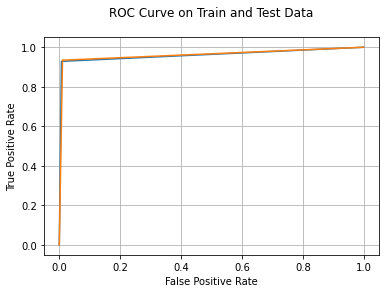

In [60]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_standardized_rf, y_train_pred_non_smote_standardized_rf))
print("AUC_test = ", roc_auc_score(y_test_non_smote_standardized_rf, y_test_pred_non_smote_standardized_rf))

plt.plot(train_fpr_non_smote_standardized_rf, train_tpr_non_smote_standardized_rf, label = 'Train Data')
plt.plot(test_fpr_non_smote_standardized_rf, test_tpr_non_smote_standardized_rf, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


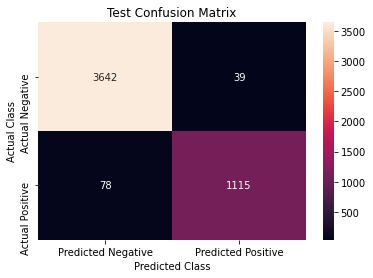

                 Predicted Negative  Predicted Positive
Actual Negative                3642                  39
Actual Positive                  78                1115


In [61]:
print("Test confusion matrix :")
cm_test_non_smote_standardized_rf = confusion_matrix(y_test_non_smote_standardized_rf, y_test_pred_non_smote_standardized_rf)
index_label_non_smote_standardized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_standardized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_standardized_rf_df = pd.DataFrame(cm_test_non_smote_standardized_rf, index=index_label_non_smote_standardized, columns=column_label_non_smote_standardized)
sns.heatmap(cm_test_non_smote_standardized_rf_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_standardized_rf_df)

In [62]:
_, _, false_negative_non_smote_standardized_rf, true_positive_non_smote_standardized_rf = cm_test_non_smote_standardized_rf.ravel()
print("False Negative Rate = ", (false_negative_non_smote_standardized_rf/(false_negative_non_smote_standardized_rf+true_positive_non_smote_standardized_rf)) * 100, "%")

False Negative Rate =  6.538139145012574 %


In [63]:
print(classification_report(y_test_non_smote_standardized_rf, y_test_pred_non_smote_standardized_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3681
           1       0.97      0.93      0.95      1193

    accuracy                           0.98      4874
   macro avg       0.97      0.96      0.97      4874
weighted avg       0.98      0.98      0.98      4874



In [64]:
feature_importance_non_smote_standardized_rf = pd.DataFrame({'Feature Importance': rf_non_smote_standardized.feature_importances_}, index=x_non_smote_standardized_rf.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_standardized_rf.head(20)

Feature Importance
satisfaction_level                0.321527
time_spend_company                0.254665
average_montly_hours              0.136081
last_evaluation_rating            0.127735
projects_worked_on                0.116142
Work_accident_True                0.009562
Work_accident_False               0.009445
salary_high                       0.006374
salary_low                        0.005880
Department_technical              0.003372
salary_medium                     0.003208
Department_hr                     0.002054
Department_IT                     0.001066
Department_accounting             0.000798
Department_RandD                  0.000773
Department_product_mng            0.000702
Department_management             0.000619

## 14.4 RF On NON-SMOTE Normalized Data

In [65]:
print(non_smote_normalized_df.shape)
non_smote_normalized_df.head(10)

(24367, 18)


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0            0.318681                0.265625            0.166667   
1            0.780220                0.781250            0.666667   
2            0.021978                0.812500            1.000000   
3            0.307692                0.250000            0.166667   
4            0.351648                0.218750            0.166667   
5            0.010989                0.640625            0.833333   
6            0.912088                0.765625            0.666667   
7            0.879121                1.000000            0.666667   
8            0.362637                0.265625            0.166667   
9            0.021978                0.703125            0.833333   

   average_montly_hours  time_spend_company  Attrition  Work_accident_False  \
0              0.316964                 0.2          1                    1   
1              0.785714                 0.8          1                    1   
2              0.830357                 0.4          1                    1   
3              0.325893                 0.2          1                    1   
4              0.299107                 0.2          1                    1   
5              0.718750                 0.4          1                    1   
6              0.772321                 0.6          1                    1   
7              0.616071                 0.6          1                    1   
8              0.250000                 0.2          1                    1   
9              0.977679                 0.4          1                    1   

   Work_accident_True  Department_IT  Department_RandD  Department_accounting  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   
5                   0              0                 0                      0   
6                   0              0                 0                      0   
7                   0              0                 0                      0   
8                   0              0                 0                      0   
9                   0              0                 0                      0   

   Department_hr  Department_management  Department_product_mng  \
0              0                      0                       0   
1              0                      0                       0   
2              0                      0                       0   
3              0                      0                       0   
4              0                      0                       0   
5              0                      0                       0   
6              0                      0                       0   
7              0                      0                       0   
8              0                      0                       0   
9              0                      0                       0   

   Department_technical  salary_high  salary_low  salary_medium  
0                     0            0           1              0  
1                     0            0           0              1  
2                     0            0           0              1  
3                     0            0           1              0  
4                     0            0           1              0  
5                     0            0           1              0  
6                     0            0           1              0  
7                     0            0           1              0  
8                     0            0           1              0  
9                     0            0           1              0

In [66]:
x_non_smote_normalized_rf = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns != 'Attrition']
y_non_smote_normalized_rf = non_smote_normalized_df.loc[:, non_smote_normalized_df.columns == 'Attrition']

In [67]:
# splitting into train & test set..
x_train_non_smote_normalized_rf, x_test_non_smote_normalized_rf, y_train_non_smote_normalized_rf, y_test_non_smote_normalized_rf = train_test_split(x_non_smote_normalized_rf, y_non_smote_normalized_rf, test_size = 0.20, random_state=21, stratify=y_non_smote_normalized_rf)

# splitting train set into train and cv sets..
x_train_non_smote_normalized_rf, x_cv_non_smote_normalized_rf, y_train_non_smote_normalized_rf, y_cv_non_smote_normalized_rf = train_test_split(x_train_non_smote_normalized_rf, y_train_non_smote_normalized_rf, test_size = 0.20, random_state=21, stratify=y_train_non_smote_normalized_rf)

print("len(x_train_non_smote_normalized_rf) = ", len(x_train_non_smote_normalized_rf))
print("len(y_train_non_smote_normalized_rf) = ", len(y_train_non_smote_normalized_rf))

print("\nlen(x_cv_non_smote_normalized_rf) = ", len(x_cv_non_smote_normalized_rf))
print("len(y_cv_non_smote_normalized_rf) = ", len(y_cv_non_smote_normalized_rf))

print("\nlen(x_test_non_smote_normalized_rf) = ", len(x_test_non_smote_normalized_rf))
print("len(y_test_non_smote_normalized_rf) = ", len(y_test_non_smote_normalized_rf))

len(x_train_non_smote_normalized_rf) =  15594
len(y_train_non_smote_normalized_rf) =  15594

len(x_cv_non_smote_normalized_rf) =  3899
len(y_cv_non_smote_normalized_rf) =  3899

len(x_test_non_smote_normalized_rf) =  4874
len(y_test_non_smote_normalized_rf) =  4874


In [68]:
hyper_parameter_values_rf_dict = {
    'n_estimators' : [x for x in range(75, 86)],
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 5, 7, 9, 11],
    'min_samples_leaf' : [10, 25, 50, 75, 100, 125],
    'max_features' : ['auto', 'sqrt', 'log2'],
#     'n_jobs' : 12,
#     'random_state' : 21
}

In [69]:
rf_non_smote_normalized = RandomForestClassifier()
gcv_rf_non_smote_normalized = GridSearchCV(rf_non_smote_normalized, hyper_parameter_values_rf_dict, cv=3, scoring="accuracy", n_jobs=12, verbose=4)
gcv_rf_non_smote_normalized.fit(x_train_non_smote_normalized_rf, y_train_non_smote_normalized_rf)

Fitting 3 folds for each of 1980 candidates, totalling 5940 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 25, 50, 75, 100, 125],
                         'n_estimators': [75, 76, 77, 78, 79, 80, 81, 82, 83,
                                          84, 85]},
             scoring='accuracy', verbose=4)

In [70]:
gcv_rf_non_smote_normalized.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_leaf=10, n_estimators=75)

In [71]:
gcv_rf_non_smote_normalized.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'n_estimators': 75}

In [72]:
gcv_rf_non_smote_normalized.best_score_

0.9717840194946774

In [73]:
rf_non_smote_normalized = RandomForestClassifier(n_estimators=gcv_rf_non_smote_normalized.best_params_['n_estimators'],
                                                criterion=gcv_rf_non_smote_normalized.best_params_['criterion'], 
                                                max_depth=gcv_rf_non_smote_normalized.best_params_['max_depth'],
                                                max_features=gcv_rf_non_smote_normalized.best_params_['max_features'], 
                                                min_samples_leaf=gcv_rf_non_smote_normalized.best_params_['min_samples_leaf'],
                                                n_jobs=12, class_weight='balanced'
                                               )
rf_non_smote_normalized.fit(x_train_non_smote_normalized_rf, y_train_non_smote_normalized_rf)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, max_features='log2', min_samples_leaf=10,
                       n_estimators=75, n_jobs=12)

In [74]:
y_train_pred_non_smote_normalized_rf = rf_non_smote_normalized.predict(x_train_non_smote_normalized_rf)
y_test_pred_non_smote_normalized_rf = rf_non_smote_normalized.predict(x_test_non_smote_normalized_rf)

In [75]:
train_fpr_non_smote_normalized_rf, train_tpr_non_smote_normalized_rf, _ = roc_curve(y_train_non_smote_normalized_rf, y_train_pred_non_smote_normalized_rf)
test_fpr_non_smote_normalized_rf, test_tpr_non_smote_normalized_rf, _ = roc_curve(y_test_non_smote_normalized_rf, y_test_pred_non_smote_normalized_rf)


AUC_train =  0.9625490144564715
AUC_test =  0.9633933843462943


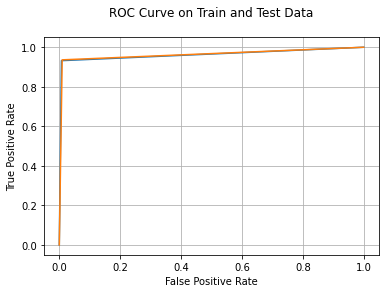

In [76]:
print("\nAUC_train = ", roc_auc_score(y_train_non_smote_normalized_rf, y_train_pred_non_smote_normalized_rf))
print("AUC_test = ", roc_auc_score(y_test_non_smote_normalized_rf, y_test_pred_non_smote_normalized_rf))

plt.plot(train_fpr_non_smote_normalized_rf, train_tpr_non_smote_normalized_rf, label = 'Train Data')
plt.plot(test_fpr_non_smote_normalized_rf, test_tpr_non_smote_normalized_rf, label = 'Test Data')
plt.grid(True)
plt.title("ROC Curve on Train and Test Data\n")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test confusion matrix :


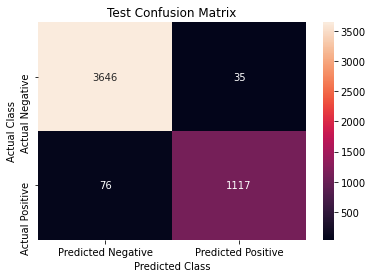

                 Predicted Negative  Predicted Positive
Actual Negative                3646                  35
Actual Positive                  76                1117


In [77]:
print("Test confusion matrix :")
cm_test_non_smote_normalized_rf = confusion_matrix(y_test_non_smote_normalized_rf, y_test_pred_non_smote_normalized_rf)
index_label_non_smote_normalized = ["Actual Negative", "Actual Positive"]
column_label_non_smote_normalized = ["Predicted Negative", "Predicted Positive"]
cm_test_non_smote_normalized_rf_df = pd.DataFrame(cm_test_non_smote_normalized_rf, index=index_label_non_smote_normalized, columns=column_label_non_smote_normalized)
sns.heatmap(cm_test_non_smote_normalized_rf_df, annot = True, fmt = "d")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()
print(cm_test_non_smote_normalized_rf_df)

In [78]:
_, _, false_negative_non_smote_normalized_rf, true_positive_non_smote_normalized_rf = cm_test_non_smote_normalized_rf.ravel()
print("False Negative Rate = ", (false_negative_non_smote_normalized_rf/(false_negative_non_smote_normalized_rf+true_positive_non_smote_normalized_rf)) * 100, "%")

False Negative Rate =  6.3704945515507125 %


In [79]:
print(classification_report(y_test_non_smote_normalized_rf, y_test_pred_non_smote_normalized_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3681
           1       0.97      0.94      0.95      1193

    accuracy                           0.98      4874
   macro avg       0.97      0.96      0.97      4874
weighted avg       0.98      0.98      0.98      4874



In [80]:
feature_importance_non_smote_normalized_rf = pd.DataFrame({'Feature Importance': rf_non_smote_normalized.feature_importances_}, index=x_non_smote_normalized_rf.columns).sort_values(by='Feature Importance', ascending=False)
feature_importance_non_smote_normalized_rf.head(20)

Feature Importance
satisfaction_level                0.300723
time_spend_company                0.255799
average_montly_hours              0.149017
last_evaluation_rating            0.140020
projects_worked_on                0.114473
Work_accident_False               0.009077
Work_accident_True                0.007034
salary_high                       0.006237
salary_low                        0.005666
Department_technical              0.003198
salary_medium                     0.002892
Department_hr                     0.001580
Department_IT                     0.001101
Department_accounting             0.000987
Department_RandD                  0.000890
Department_product_mng            0.000814
Department_management             0.000492

#                                   --------------------------END OF MID-SEM--------------------------

In [129]:
dill_dump_session('15_all_machine_learning_models_completed')

In [4]:
dill_load_session('15_all_machine_learning_models_completed')